# **Overview Final Project**

**Judul** : "Efektivitas Penggunaan Energi Terbarukan dalam Penurunan Emisi Karbon di Empat Negara ASEAN"

**Data** : [Data FINPRO](https://drive.google.com/drive/folders/153GkUGJuyFKIKyhegOOlyuiUd6kOF7kq?usp=drive_link) by OECD Data-Explorer

**Variabel yang digunakan:**
1.  GDP_R: Total Produk Domestik Bruto (PDB) riil suatu negara.
2. CO2_PBEM: Emisi CO2 berbasis produksi, yaitu jumlah total CO2 yang
 dihasilkan oleh aktivitas produksi suatu negara.
3. Energy Consumption by economic activity :
  * Agriculture, forestry and fishing
  * Industry (except construction)
  * Services
  * Transportation and storage
4. RE_TPES : Variabel ini menunjukkan sejauh mana energi terbarukan digunakan dalam total pasokan energi. Semakin tinggi proporsi energi terbarukan, diharapkan akan berkontribusi pada penurunan emisi karbon

**<p>Kompi: 3</p>**

<p>Nama Anggota:</p>
<ul>
  <li>DS70320 - Putri Rianti Wulandari ( Ketua )</li>
  <li>DS70313 - M. Bagus Prayogi</li>
  <li>DS70312 - Labib Faruq Afifi</li>
  <li>DS70306 - Dayana Rofiqoh</li>
  <li>DS70303 - Aqila widina ammara</li>
</ul>

# **Data Gattering dan import library**

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# URL file
url = 'https://drive.google.com/uc?export=download&id=127M8SrLE5TsAG3R-Yrpi9O7L2lf-NAOE'

# Membaca file langsung dari URL
df = pd.read_csv(url)

df.head()

Unnamed: 0 Country  Year  CO2_PBEM       GDP_R  RE_TPES  \
0           0     IDN  1990    131.11  1680110.12    37.75   
1           1     IDN  1991    141.66  1540211.25    36.34   
2           2     IDN  1992    149.28  1433530.00    35.44   
3           3     IDN  1993    162.28  1199877.62    32.23   
4           4     IDN  1994    174.93  1290347.62    33.81   

   Agriculture, forestry and fishing  Industry (except construction)  \
0                               1.74                           30.58   
1                               1.63                           29.74   
2                               1.98                           29.88   
3                               2.18                           30.29   
4                               2.15                           32.09   

   Services  Transportation and storage  
0      1.40                       18.78  
1      1.59                       20.08  
2      1.82                       20.39  
3      2.08                       20.66  
4      2.18                       21.80

In [ ]:
del df["Unnamed: 0"]

# **Data Preparation**

##  Detect & Handling Missing Value



In [ ]:
#memeriksa missing value
df.isnull().sum()

Country                              0
Year                                 0
CO2_PBEM                             0
GDP_R                                0
RE_TPES                              0
Agriculture, forestry and fishing    0
Industry (except construction)       0
Services                             0
Transportation and storage           0
dtype: int64

Perintah df.isnull().sum() menghitung jumlah nilai yang hilang (missing values) di setiap kolom dalam DataFrame df. dari kode ini di dapatkan bahwa tidak ada missing value pada data ini

## Detect & Handling Duplicate Value

In [ ]:
#memeriksa duplikasi data
print('jumlah data duplikat :',df.duplicated().sum())

jumlah data duplikat : 0


kode ini menghitung dan menampilkan jumlah baris duplikat dalam DataFrame df. Jika ada baris yang identik di seluruh kolom, mereka akan dihitung sebagai duplikat. Hasilnya menunjukkan bahwa tidak terdapat duplikasi data

## Spliting data diawal (untuk mencegah data leakage)



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Misalkan 'Country' adalah kolom kategori untuk negara
X = df.drop(columns=['CO2_PBEM'])
y = df['CO2_PBEM']

# Tambahkan 'Country' ke X untuk stratifikasi
X['Country'] = df['Country']

# Inisialisasi Stratified Shuffle Split
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Lakukan split
for train_index, test_index in strat_split.split(X, X['Country']):
    X_train = X.iloc[train_index]  # Keep 'Country' in X_train
    X_test = X.iloc[test_index]   # Keep 'Country' in X_test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Cek distribusi negara di data training
print("Distribusi negara di training set:")
print(X_train['Country'].value_counts(normalize=True))

# Cek distribusi negara di data testing
print("\nDistribusi negara di testing set:")
print(X_test['Country'].value_counts(normalize=True))

Distribusi negara di training set:
Country
VNM    0.254902
MYS    0.254902
THA    0.245098
IDN    0.245098
Name: proportion, dtype: float64

Distribusi negara di testing set:
Country
THA    0.269231
IDN    0.269231
MYS    0.230769
VNM    0.230769
Name: proportion, dtype: float64


Kode ini membagi dataset menjadi data pelatihan (80%) dan data pengujian (20%) untuk model machine learning dengan distribusi masing - masing negara sebagaimana yang tertera pada output di atas.

* X: Fitur (semua kolom kecuali CO2_PBEM).
* y: Target (CO2_PBEM).
* random_state=42: Menjamin pembagian data yang konsisten.

Tujuannya adalah untuk memisahkan data yang digunakan untuk melatih model dari yang digunakan untuk menguji kinerjanya.

In [ ]:
# Asumsikan X_train, X_test, y_train, dan y_test telah didapat melalui operasi train_test_split

# Mengubah X_train dan X_test kembali menjadi DataFrame jika diperlukan (mereka seharusnya sudah DataFrame)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Mengubah y_train dan y_test kembali menjadi Series jika diperlukan (mereka seharusnya sudah Series)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Kode ini memastikan bahwa X_train, X_test, y_train, dan y_test memiliki tipe data yang sesuai:

* X_train dan X_test:Dikonversi menjadi DataFrame untuk memudahkan manipulasi data.
* y_train dan y_test: Dikonversi menjadi Series untuk memastikan format yang tepat.

Tujuannya adalah untuk mempersiapkan data agar siap digunakan dalam analisis dan pemodelan.

## Detect & Handling Outlier

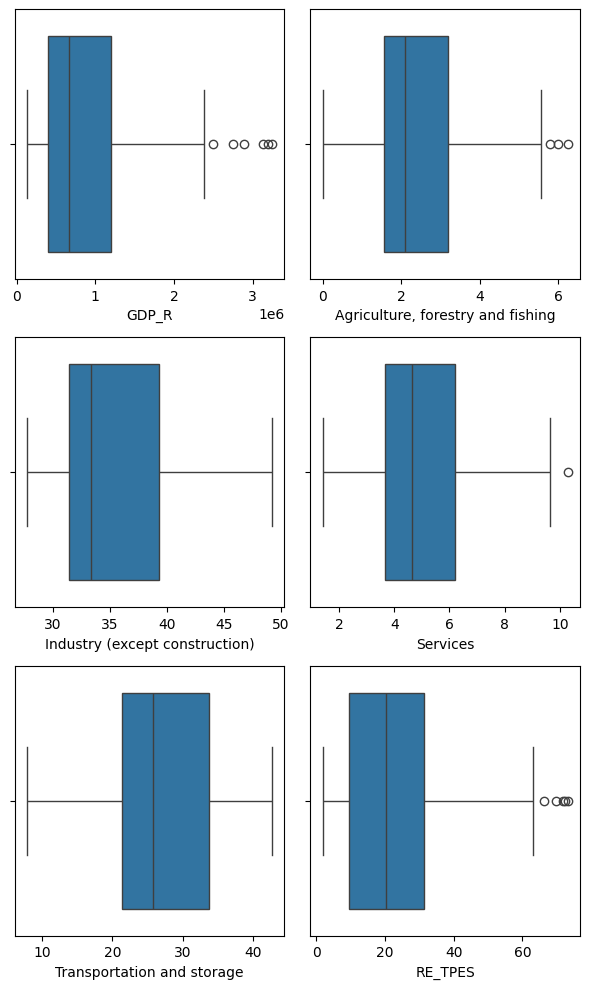

In [ ]:
# Visualisasi menggunakan box plot untuk mendeteksi outlier pada data
fig, axes = plt.subplots(3, 2, figsize=(6, 10))

sns.boxplot(data=X_train, x='GDP_R', ax=axes[0, 0])
sns.boxplot(data=X_train, x='Agriculture, forestry and fishing', ax=axes[0, 1])
sns.boxplot(data=X_train, x='Industry (except construction)', ax=axes[1, 0])
sns.boxplot(data=X_train, x='Services', ax=axes[1, 1])
sns.boxplot(data=X_train, x='Transportation and storage', ax=axes[2, 0])
sns.boxplot(data=X_train, x='RE_TPES', ax=axes[2, 1])

plt.tight_layout()
plt.show()

Kode ini membuat visualisasi box plot untuk mendeteksi outlier (nilai yang menyimpang) pada data di df. terdapat 2 box plot yang menujukkan terdapat outlier yaitu **Industry (except construction), GDP_R, dan RE_TPES** sebagai titik yang berada di luar "whiskers" dari plot.

In [ ]:
# Handling outlier
# Daftar fitur yang akan digunakan untuk memeriksa jumlah outlier

features = [
    'GDP_R',
    'Agriculture, forestry and fishing',
    'Industry (except construction)',
    'Services',
    'Transportation and storage',
    'RE_TPES'
]

# Loop over each feature to calculate the IQR and cap outliers
for feature in features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, X_train[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, X_train[feature])

Kode ini mendefinisikan fungsi untuk menghitung jumlah outlier dalam setiap fitur (kolom) yang ditentukan dalam daftar fitur menggunakan metode Interquartile Range (IQR).

IQR (Interquartile Range): Menghitung rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data.
Batas Atas dan Bawah: Menentukan nilai yang dianggap outlier jika berada di atas Q3 + 1.5 * IQR atau di bawah Q1 - 1.5 * IQR.
Menghitung Outlier: Fungsi menghitung dan mencetak jumlah outlier untuk setiap fitur.
Ketika fungsi dipanggil dengan nama fitur, ia akan mencetak jumlah outlier dalam fitur tersebut.

Setelah outlier teridentifikasi, nilai outlier tersebut diganti dengan nilai batas atas atau bawah yang telah ditentukan.

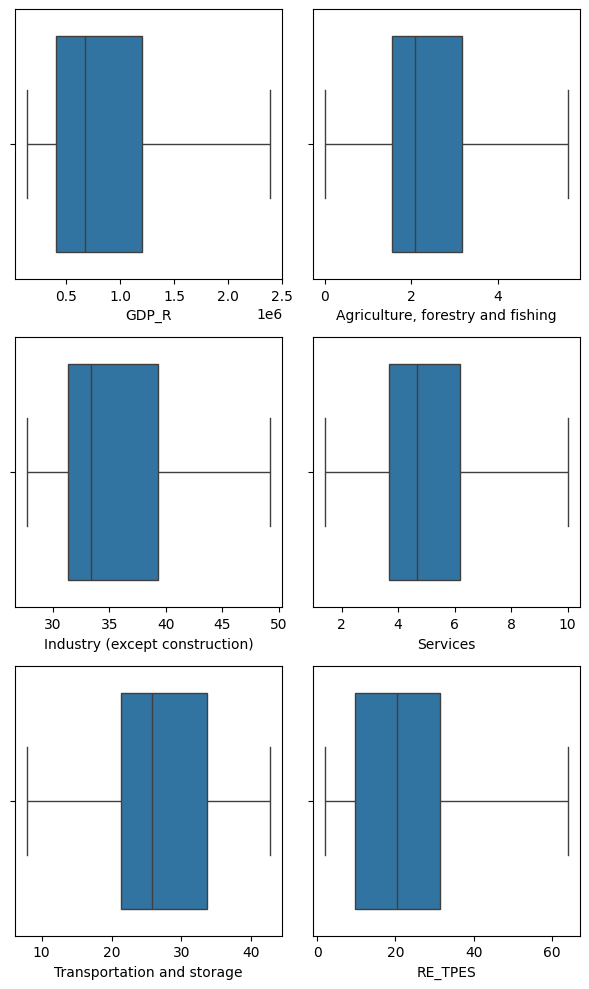

In [ ]:
# Visualisasi menggunakan box plot untuk mendeteksi outlier pada data
fig, axes = plt.subplots(3, 2, figsize=(6, 10))

sns.boxplot(data=X_train, x='GDP_R', ax=axes[0, 0])
sns.boxplot(data=X_train, x='Agriculture, forestry and fishing', ax=axes[0, 1])
sns.boxplot(data=X_train, x='Industry (except construction)', ax=axes[1, 0])
sns.boxplot(data=X_train, x='Services', ax=axes[1, 1])
sns.boxplot(data=X_train, x='Transportation and storage', ax=axes[2, 0])
sns.boxplot(data=X_train, x='RE_TPES', ax=axes[2, 1])

plt.tight_layout()
plt.show()

Kode diatas menunjukkan visualisasi boxplot setelah dilakukannya handling outliers. Terlihat dari visualisasi diatas bahwa data sudah bersih dari outliers.

## Feature Encoding

In [ ]:
# Mengecualikan kolom 'Year' sebelum melakukan One-Hot Encoding
X_train_no_year = X_train.drop(columns=['Year'])
X_test_no_year = X_test.drop(columns=['Year'])

# One-Hot Encoding pada data yang sudah dihilangkan kolom 'Year'
X_train_encoded = pd.get_dummies(X_train_no_year)
X_test_encoded = pd.get_dummies(X_test_no_year)

# Menyelaraskan kolom X_test_encoded dengan X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Menambahkan kolom 'Year' kembali ke data yang sudah di-encode
X_train_encoded['Year'] = X_train['Year'].values
X_test_encoded['Year'] = X_test['Year'].values

# Menampilkan hasil encoding dari X_train
X_train_encoded.head()

GDP_R  RE_TPES  Agriculture, forestry and fishing  \
102   217500.41    60.41                               1.97   
115   495908.94    32.53                               1.45   
109   335964.88    46.49                               2.03   
95   1218996.00    16.90                               2.39   
13   1364108.88    23.02                               2.98   

     Industry (except construction)  Services  Transportation and storage  \
102                           30.30      4.23                       12.73   
115                           36.69      3.58                       21.46   
109                           31.41      3.94                       16.96   
95                            30.67      4.63                       25.88   
13                            34.71      3.26                       24.07   

     Country_IDN  Country_MYS  Country_THA  Country_VNM  Year  
102        False        False        False         True  1996  
115        False        False        False         True  2009  
109        False        False        False         True  2003  
95         False        False         True        False  2021  
13          True        False        False        False  2003

Kode ini melakukan One-Hot Encoding pada X_train dan X_test untuk mengubah variabel kategorikal menjadi format numerik. Selanjutnya, kolom X_test_encoded diselaraskan dengan kolom X_train_encoded, mengisi kolom yang hilang dengan 0. Terakhir, kode menampilkan lima baris pertama dari dataset yang telah diencoding.

# **Explanatory Data Analysis**

## Mengelaborasi Features dan Tipe Data (Nominal, Ordinal, Numerical)

In [ ]:
print(X_train_encoded.dtypes)
features_info = {
    'GDP_R': 'Numerical',
    'Agriculture, forestry and fishing': 'Numerical',
    'Industry (except construction)': 'Numerical',
    'Services': 'Numerical',
    'Transportation and storage': 'Numerical',
    'RE_TPES': 'Numerical',
    'Country_IDN': 'Nominal',
    'Country_MYS': 'Nominal',
    'Country_THA': 'Nominal',
    'Country_VNM': 'Nominal'
}

print("Features dan tipe data:")
for feature, tipe in features_info.items():
    print(f"{feature}: {tipe}")


GDP_R                                float64
RE_TPES                              float64
Agriculture, forestry and fishing    float64
Industry (except construction)       float64
Services                             float64
Transportation and storage           float64
Country_IDN                             bool
Country_MYS                             bool
Country_THA                             bool
Country_VNM                             bool
Year                                   int64
dtype: object
Features dan tipe data:
GDP_R: Numerical
Agriculture, forestry and fishing: Numerical
Industry (except construction): Numerical
Services: Numerical
Transportation and storage: Numerical
RE_TPES: Numerical
Country_IDN: Nominal
Country_MYS: Nominal
Country_THA: Nominal
Country_VNM: Nominal


- Kolom `GDP_R`, `NRG_INT`, `Agriculture, forestry and fishing`, `Industry (except construction)`, `Services`, `Transportation and storage`, `RE_TPES` dan `CO2_IPC` memiliki tipe data numerik (float64). Ini menunjukkan bahwa kolom-kolom ini mengandung data kuantitatif yang dapat digunakan untuk perhitungan statistik, analisis regresi, dan visualisasi dalam Exploratory Data Analysis (EDA).

- Kolom `Country_IDN`, `Country_MYS`, `Country_THA`, dan `Country_VNM` memiliki tipe data nominal (data kategorikal) untuk mengklasifikasikan variabel berdasarkan kategori tanpa urutan atau ranking tertentu.

## Menemukan dan Mendeskripsikan Statistical Five Summaries

In [ ]:
# Menghitung Five Summaries untuk setiap kolom numerik dalam X_train
five_summaries_train = X_train_encoded[[ "GDP_R", "Agriculture, forestry and fishing","Industry (except construction)" ,"Services","Transportation and storage","RE_TPES"]].describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Statistical Five Summaries untuk X_train_encoded:")
print(five_summaries_train)

Statistical Five Summaries untuk X_train_encoded:
            GDP_R  Agriculture, forestry and fishing  \
min  1.341054e+05                             0.0000   
25%  4.037965e+05                             1.5600   
50%  6.702922e+05                             2.0950   
75%  1.200102e+06                             3.1850   
max  2.394560e+06                             5.6225   

     Industry (except construction)  Services  Transportation and storage  \
min                         27.7400   1.40000                      7.9200   
25%                         31.3875   3.66500                     21.3700   
50%                         33.3650   4.65500                     25.7150   
75%                         39.3000   6.20250                     33.6975   
max                         49.2200  10.00875                     42.6800   

      RE_TPES  
min   1.89000  
25%   9.60750  
50%  20.41000  
75%  31.40000  
max  64.08875  


1. **GDP_R**  
  - **Min: 1.341054e+05:** PDB terendah yang tercatat adalah 134.105. Ini menunjukkan bahwa ada negara dalam sampel dengan total nilai produksi barang dan jasa yang sangat rendah.
  - **25% (Q1): 4.037965e+05:** 25% dari negara memiliki PDB di bawah 403.796, menandakan bahwa seperempat negara dalam dataset memiliki ekonomi yang  relatif lebih kecil dibandingkan dengan negara lainnya.
  - **50% (Median/Q2):  6.702922e+05:** Median PDB adalah 670.292.  Artinya, setengah dari negara-negara dalam sampel memiliki PDB di bawah angka ini dan setengahnya di atas.
  - **75% (Q3): 1.200102e+06:** 75% dari negara memiliki PDB di bawah 1.200.102.menunjukkan bahwa seperempat negara memiliki PDB yang lebih tinggi.
  - **Max: 2.394560e+06:** PDB tertinggi yang tercatat adalah 2.394.560, menunjukkan nilai maksimum yang sangat tinggi dalam dataset ini.

2. **Agriculture, Forestry, and Fishing**
  - **Min: 0.0000:** Nilai minimum kontribusi sektor pertanian, kehutanan, dan perikanan adalah 0. Ini berarti ada negara dalam sampel yang sama sekali tidak memiliki kontribusi dari sektor ini terhadap PDB.
  - **25% (Q1): 1.5600:** 25% dari negara memiliki kontribusi sektor ini di bawah 1.5600, menunjukkan bahwa seperempat negara memiliki ketergantungan yang rendah pada sektor ini.
  - **50% (Median/Q2): 2.0950:** Median kontribusi adalah 2.0950. Artinya, setengah dari negara-negara memiliki kontribusi sektor ini di bawah angka ini dan setengahnya di atas.
  - **75% (Q3): 3.1850:** 75% dari negara memiliki kontribusi di bawah 3.1850, menandakan bahwa sebagian besar negara memiliki kontribusi yang lebih tinggi dari sektor ini.
  - **Max:  5.6225:** Nilai maksimum kontribusi dari sektor ini adalah  5.6225. Ini menunjukkan bahwa ada negara memiliki kontribusi yang sangat besar di sektor ini.

3. **Industry (Except Construction)**
  - **Min: 27.7400:** Nilai minimum untuk sektor industri (kecuali konstruksi) adalah 27.7400, menunjukkan bahwa ada negara dengan kontribusi yang sangat rendah dari sektor industri (ada negara yang sangat bergantung pada sektor lain, seperti pertanian atau jasa).
  - **25% (Q1): 31.3875:** 25% dari negara memiliki kontribusi di bawah 31.3875, menunjukkan bahwa seperempat negara memiliki kontribusi yang rendah dari sektor ini.
  - **50% (Median/Q2): 33.3650:** Median kontribusi adalah 33.3650, menunjukkan bahwa separuh negara memiliki kontribusi dari sektor ini yang lebih rendah dari angka ini.
  - **75% (Q3): 39.3000:** 75% dari negara memiliki kontribusi di bawah 39.3000, menunjukkan bahwa sebagian besar negara memiliki kontribusi yang lebih tinggi dari sektor ini.
  - **Max: 49.2200:** Nilai maksimum kontribusi dari sektor ini adalah 49.2200. Ini menunjukkan bahwa ada negara memiliki kontribusi yang sangat besar di sektor ini.

4. **Services**
  - **Min: 1.40000:** Nilai minimum untuk sektor jasa adalah 1.40000, menunjukkan bahwa ada negara dengan kontribusi yang sangat rendah dari sektor ini.
  - **25% (Q1): 3.66500:** 25% dari negara memiliki kontribusi sektor ini di bawah 3.66500, menunjukkan bahwa seperempat negara memiliki ketergantungan yang rendah pada sektor jasa.
  - **50% (Median/Q2): 4.65500:** Median kontribusi adalah 4.65500, menunjukkan bahwa separuh negara memiliki kontribusi dari sektor ini yang lebih rendah dari angka ini, mencerminkan bahwa sektor jasa memiliki kontribusi yang cukup signifikan terhadap ekonomi banyak negara.
  - **75% (Q3): 6.20250:** 75% dari negara memiliki kontribusi di bawah 6.20250, menunjukkan bahwa sebagian besar negara memiliki kontribusi yang lebih tinggi dari sektor jasa.
  - **Max: 10.00875:** Nilai maksimum kontribusi dari sektor ini adalah 10.00875, mencerminkan batas atas untuk kontribusi yang terukur.

5. **Transportation and Storage**
  - **Min: 7.9200:** Nilai minimum untuk sektor transportasi dan penyimpanan adalah 14.030, menunjukkan bahwa ada negara dengan kontribusi yang sangat rendah dari sektor ini.
  - **25% (Q1): 21.3700:** 25% dari negara memiliki kontribusi sektor ini di bawah 21.3700, menunjukkan bahwa seperempat negara memiliki ketergantungan yang rendah pada sektor ini.
  - **50% (Median/Q2): 25.7150:** Median kontribusi adalah 25.7150, menunjukkan bahwa separuh negara memiliki kontribusi dari sektor ini yang lebih rendah dari angka ini, mencerminkan pentingnya sektor ini dalam perekonomian.
  - **75% (Q3): 33.6975:** 75% dari negara memiliki kontribusi di bawah 33.6975, menunjukkan bahwa sebagian besar negara memiliki kontribusi yang lebih tinggi dari sektor ini.
  - **Max: 42.6800:** Nilai maksimum kontribusi dari sektor ini adalah 42.6800, mencerminkan batas atas untuk kontribusi yang terukur.

6. **RE_TPES**
  - **Min: 1.8900:** Nilai minimum untuk pasokan energi primer terbarukan adalah 1.8900, menunjukkan bahwa ada negara dengan kontribusi yang sangat rendah dari sumber energi terbarukan.
  - **25% (Q1): 9.60750:** 25% dari negara memiliki pasokan energi terbarukan di bawah 9.60750, menunjukkan bahwa seperempat negara memiliki ketergantungan yang rendah pada energi terbarukan.
  - **50% (Median/Q2): 20.4100:** Median pasokan energi terbarukan adalah 20.4100. Ini menunjukkan bahwa setengah dari negara-negara dalam sampel memiliki kontribusi energi terbarukan yang kurang dari nilai ini, dan setengahnya lebih tinggi.
  - **75% (Q3): 31.40000:** 75% dari negara memiliki pasokan energi terbarukan di bawah 31.40000, menunjukkan bahwa sebagian besar negara telah mulai berinvestasi lebih banyak dalam energi terbarukan.
  - **Max: 64.08875:** Nilai maksimum pasokan energi terbarukan adalah 64.08875. Ini menunjukkan bahwa ada negara yang sangat mengandalkan energi terbarukan sebagai sumber energi utama.

## Mendeskripsikan Distribusi Data

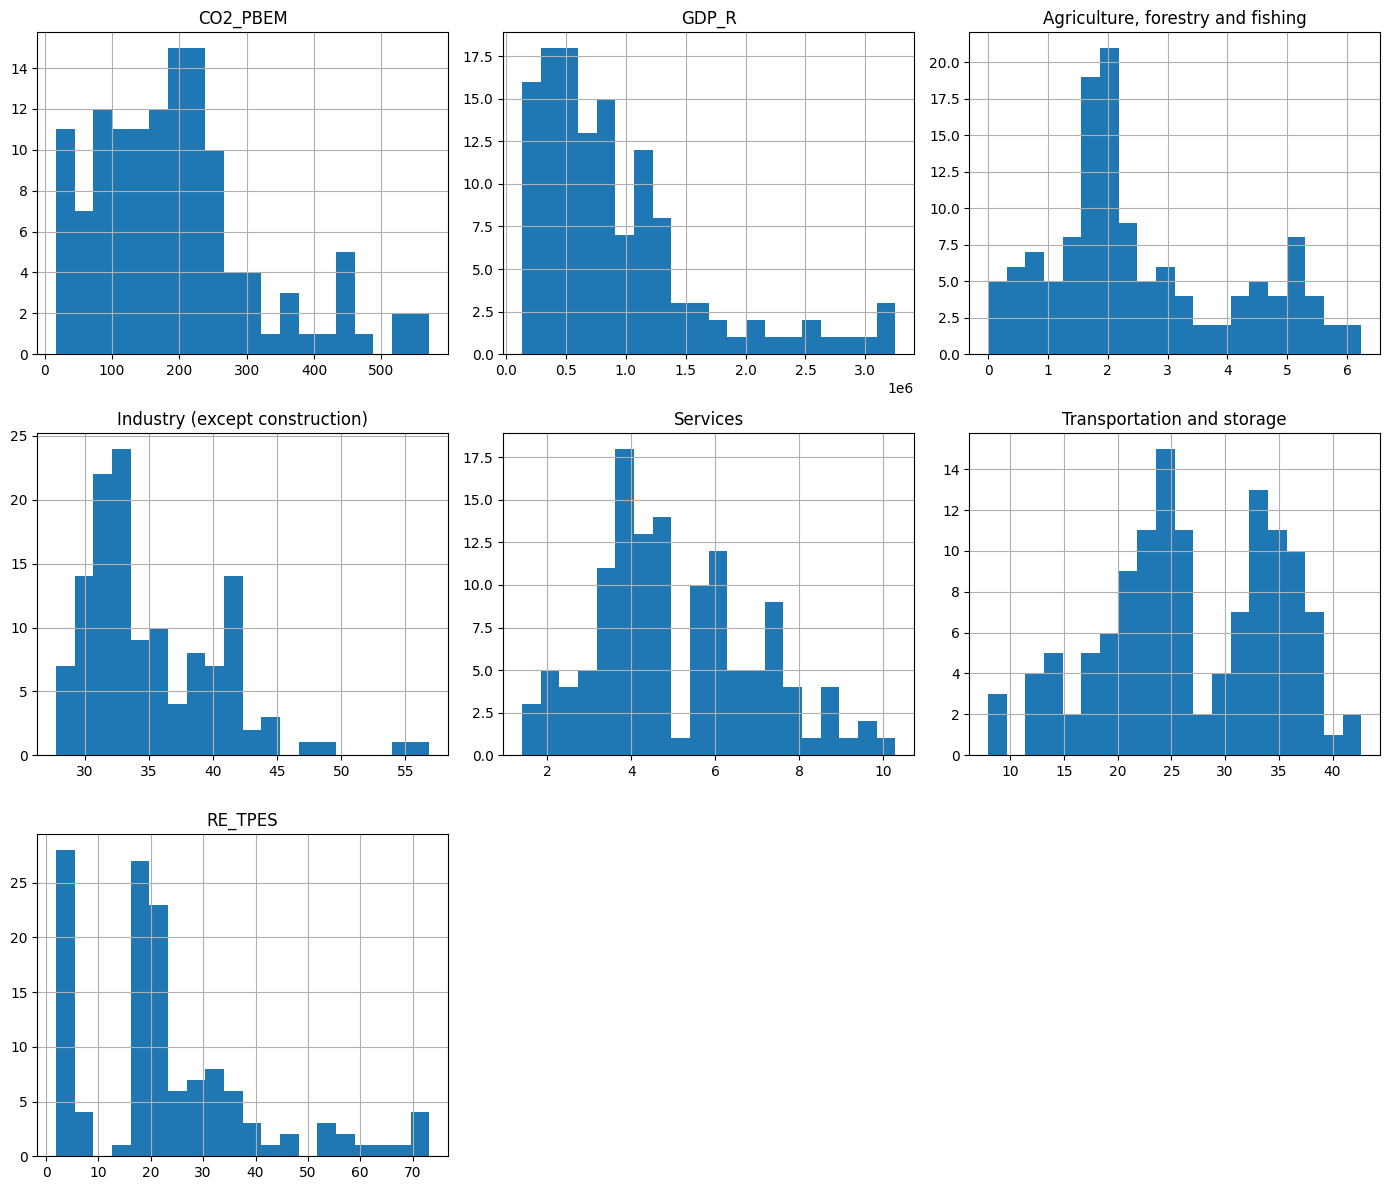

In [ ]:
# Visualisasi distribusi fitur-fitur utama dengan histogram sebelum data di split
df[["CO2_PBEM", "GDP_R", "Agriculture, forestry and fishing",  "Industry (except construction)", "Services"  ,"Transportation and storage","RE_TPES"]].hist(bins=20, figsize=(14, 12))
plt.tight_layout()
plt.show()

Visualisasi distribusi fitur-fitur utama dengan histogram sebelum data displit:

- **CO2_PBEM:**   
Histogram emisi CO2 menunjukkan skewness positif, dengan sebagian besar negara memiliki emisi yang relatif rendah, sementara beberapa negara memiliki emisi yang sangat tinggi, menciptakan ketimpangan signifikan antar negara. Selain itu, histogram multimodal pada data emisi CO2 mengindikasikan perbedaan tingkat emisi di berbagai kelompok data. Faktor-faktor yang berkontribusi terhadap multimodalitas ini meliputi struktur ekonomi seperti tingkat industrialisasi dan ketergantungan pada energi fosil, kondisi geografis seperti iklim dan ketersediaan sumber daya alam, serta kebijakan pemerintah terkait energi dan lingkungan. Perbedaan dalam urbanisasi, pertumbuhan ekonomi, perubahan penggunaan lahan, perkembangan teknologi, peristiwa ekstrem, dan variasi regulasi lingkungan juga berperan dalam membentuk distribusi emisi CO2 yang beragam.

- **GDP_R:**   
Histogram PDB juga menunjukkan skewness positif. Histogram GDP_R yang condong ke kanan menunjukkan kesenjangan ekonomi signifikan di antara negara, di mana sebagian besar negara memiliki PDB yang relatif rendah, sementara hanya sedikit negara yang memiliki PDB sangat tinggi. Variasi ini disebabkan oleh faktor-faktor kompleks, termasuk perbedaan tingkat industrialisasi, ketersediaan sumber daya alam, kualitas sumber daya manusia, stabilitas politik dan ekonomi, serta keterbukaan terhadap perdagangan internasional. Dengan demikian, perbedaan dalam tingkat pembangunan, sumber daya, dan kebijakan telah menciptakan distribusi PDB yang tidak merata di kawasan ASEAN.

- **Agriculture, forestry, and fishing:**   
Histogram sektor pertanian, kehutanan, dan perikanan menunjukkan adanya variasi yang sangat besar dalam kontribusi sektor ini terhadap perekonomian di berbagai negara. Bentuk histogram yang multimodal mengindikasikan adanya beberapa kelompok negara dengan tingkat ketergantungan pada sektor ini yang berbeda-beda. Faktor-faktor seperti kondisi geografis, kebijakan pemerintah, tingkat industrialisasi, dan preferensi konsumen secara bersama-sama membentuk keragaman ini. Seperti perbedaan dalam luas lahan pertanian, kualitas tanah, dan kebijakan subsidi pertanian telah menciptakan variasi yang signifikan dalam kontribusi sektor ini terhadap PDB.

- **Industry (except construction):**   
Histogram sektor industri (kecuali konstruksi) menunjukkan variasi signifikan dalam kontribusi sektor ini terhadap perekonomian negara. Bentuk multimodalnya mengindikasikan adanya beberapa kelompok negara dengan tingkat industrialisasi yang berbeda. Faktor-faktor seperti sejarah industrialisasi, ketersediaan sumber daya alam, kualitas sumber daya manusia, kebijakan pemerintah, dan tingkat keterbukaan terhadap perdagangan internasional mempengaruhi perkembangan industri di masing-masing negara. Negara-negara dengan tingkat industrialisasi tinggi cenderung memiliki kontribusi sektor industri yang lebih besar terhadap PDB, sementara negara-negara dengan tingkat industrialisasi rendah lebih bergantung pada sektor pertanian atau jasa.

- **Services:**   
Histogram sektor jasa menunjukkan variasi yang cukup besar dalam kontribusi sektor ini terhadap perekonomian di berbagai negara. Bentuk histogram yang multimodal mengindikasikan adanya beberapa kelompok negara dengan tingkat perkembangan sektor jasa yang berbeda-beda. Faktor-faktor seperti tingkat pembangunan ekonomi, struktur ekonomi, kebijakan pemerintah, dan faktor demografis secara bersama-sama membentuk keragaman ini. Negara-negara dengan pendapatan per kapita yang lebih tinggi dan tingkat urbanisasi yang tinggi cenderung memiliki sektor jasa yang lebih dominan. Sektor jasa seperti pariwisata, keuangan, dan teknologi informasi menjadi semakin penting dalam perekonomian modern, terutama di negara-negara berkembang.

- **Transportation and storage:**   
Histogram sektor transportasi dan penyimpanan menunjukkan adanya variasi yang signifikan dalam kontribusi sektor ini terhadap perekonomian negara-negara yang dianalisis. Bentuk multimodal dari histogram mengindikasikan bahwa terdapat beberapa kelompok negara dengan tingkat perkembangan infrastruktur transportasi yang berbeda-beda. Faktor-faktor seperti ukuran wilayah, kepadatan penduduk, tingkat urbanisasi, kebijakan pemerintah, dan ketersediaan sumber daya alam mempengaruhi tingkat investasi dan pengembangan infrastruktur transportasi. Negara-negara dengan wilayah yang luas, populasi yang besar, dan ekonomi yang berkembang pesat cenderung memiliki investasi yang lebih besar dalam infrastruktur transportasi. Selain itu, kebijakan pemerintah yang mendukung pembangunan infrastruktur, seperti pembangunan jalan tol, kereta api, dan pelabuhan, juga dapat mendorong pertumbuhan sektor transportasi.

- **RE_TPES:**   
Histogram RE_TPES menunjukkan adanya variasi yang signifikan dalam kontribusi energi terbarukan terhadap total konsumsi energi di berbagai negara. Bentuk multimodal dari histogram mengindikasikan bahwa terdapat beberapa kelompok negara dengan tingkat pemanfaatan energi terbarukan yang berbeda-beda. Faktor-faktor seperti kebijakan energi, ketersediaan sumber daya alam, tingkat pembangunan ekonomi, dan struktur industri sangat mempengaruhi distribusi RE_TPES. Negara-negara dengan kebijakan yang mendukung energi terbarukan, sumber daya alam yang melimpah, dan tingkat industrialisasi yang tinggi cenderung memiliki porsi energi terbarukan yang lebih besar.


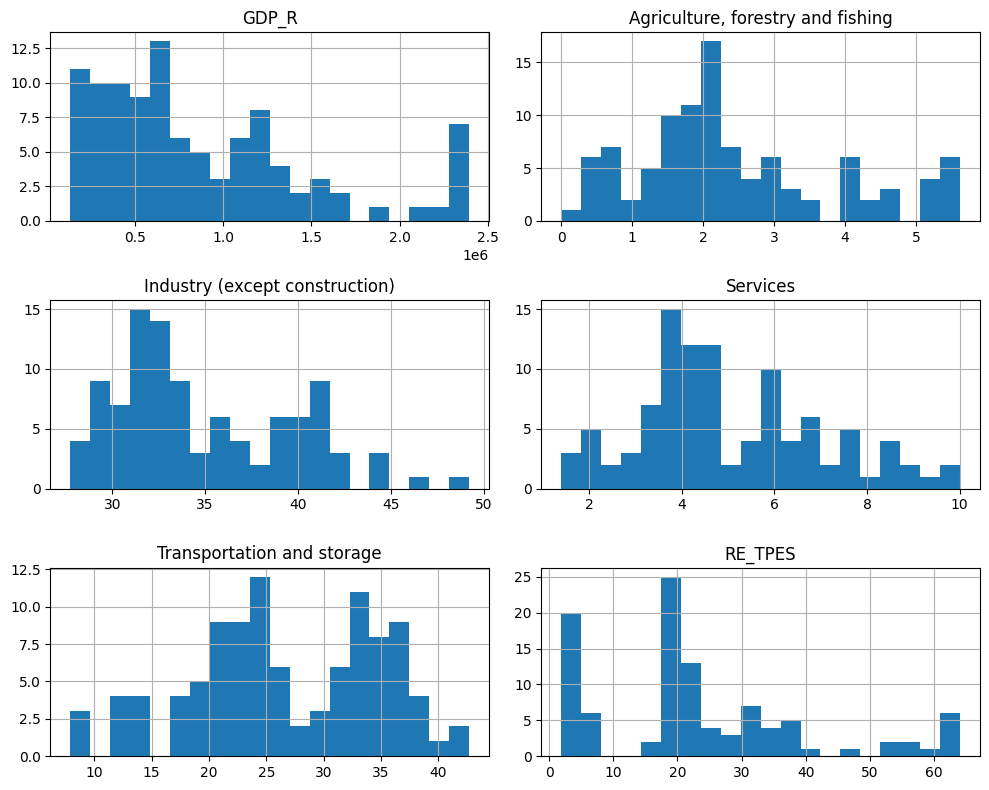

In [ ]:
# Visualisasi distribusi fitur-fitur utama dengan histogram setelah data di split
X_train_encoded[[ "GDP_R", "Agriculture, forestry and fishing", "Industry (except construction)",  "Services", "Transportation and storage", "RE_TPES"]].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Visualisasi distribusi fitur-fitur utama dengan histogram setelah data displit:

- **GDP_R:**   
 Histogram GDP_R menunjukkan variasi yang cukup besar dalam tingkat Produk Domestik Bruto riil di antara negara-negara yang dianalisis. Bentuk multimodal dari histogram mengindikasikan adanya beberapa kelompok negara dengan tingkat perekonomian yang berbeda-beda. Faktor-faktor seperti tingkat pembangunan, struktur ekonomi, sumber daya alam, stabilitas politik, dan ukuran populasi secara bersama-sama membentuk keragaman ini. Negara-negara dengan tingkat pembangunan yang lebih tinggi, sumber daya alam yang melimpah, dan stabilitas politik yang baik cenderung memiliki GDP_R yang lebih tinggi.

- **Agriculture, forestry, and fishing:**   
Histogram sektor pertanian, kehutanan, dan perikanan menunjukkan variasi signifikan dalam kontribusi sektor ini terhadap perekonomian berbagai negara. Bentuk multimodal dari histogram mengindikasikan adanya beberapa kelompok negara dengan tingkat ketergantungan yang berbeda pada sektor ini. Faktor-faktor seperti kondisi geografis, iklim, kebijakan pemerintah, permintaan pasar, akses terhadap teknologi, infrastruktur, dan tradisi pertanian sangat mempengaruhi tingkat kontribusi sektor ini. Negara-negara dengan luas lahan pertanian yang besar, kondisi iklim yang mendukung, dan kebijakan pemerintah yang pro-pertanian cenderung memiliki kontribusi sektor pertanian yang lebih tinggi. Selain itu, akses terhadap teknologi modern dan infrastruktur yang baik juga berperan penting dalam meningkatkan produktivitas dan efisiensi sektor ini.

- **Industry (except construction):**   
Histogram sektor industri (kecuali konstruksi) menunjukkan variasi yang signifikan dalam kontribusi sektor ini terhadap perekonomian berbagai negara. Bentuk multimodal dari histogram mengindikasikan adanya beberapa kelompok negara dengan tingkat industrialisasi yang berbeda-beda. Faktor-faktor seperti tingkat industrialisasi, struktur industri, kebijakan pemerintah, sumber daya alam, dan permintaan global sangat mempengaruhi tingkat kontribusi sektor ini. Negara-negara dengan tingkat industrialisasi yang tinggi, kebijakan yang mendukung industri, dan sumber daya alam yang melimpah cenderung memiliki kontribusi sektor industri yang lebih besar.

- **Services:**   
 Histogram sektor jasa menunjukkan variasi yang cukup besar dalam kontribusi sektor ini terhadap perekonomian di berbagai negara. Bentuk multimodal dari histogram ini mengindikasikan adanya beberapa kelompok negara dengan tingkat ketergantungan pada sektor jasa yang berbeda-beda. Faktor-faktor seperti tingkat pembangunan, struktur ekonomi, urbanisasi, kebijakan pemerintah, dan permintaan global secara bersama-sama membentuk keragaman ini. Negara-negara dengan tingkat pembangunan yang lebih tinggi, tingkat urbanisasi yang tinggi, dan kebijakan yang mendukung sektor jasa cenderung memiliki kontribusi sektor jasa yang lebih besar.

- **Transportasi dan Storage:**   
 Histogram sektor transportasi dan penyimpanan menunjukkan variasi yang signifikan dalam kontribusi sektor ini terhadap perekonomian berbagai negara. Bentuk multimodal dari histogram mengindikasikan adanya beberapa kelompok negara dengan tingkat ketergantungan pada sektor transportasi dan penyimpanan yang berbeda-beda. Faktor-faktor seperti tingkat pembangunan infrastruktur, luas wilayah, kepadatan penduduk, orientasi ekonomi, kebijakan pemerintah, dan permintaan global sangat mempengaruhi tingkat kontribusi sektor ini. Negara-negara dengan infrastruktur transportasi yang baik, wilayah yang luas, dan kebijakan yang mendukung transportasi cenderung memiliki kontribusi sektor transportasi yang lebih besar.

- **RE_TPES:**   
 Histogram variabel RE_TPES yang merepresentasikan persentase energi terbarukan menunjukkan variasi yang signifikan di berbagai negara. Bentuk multimodal dari histogram mengindikasikan adanya perbedaan yang cukup besar dalam tingkat adopsi energi terbarukan. Faktor-faktor seperti kebijakan energi, potensi sumber daya alam, tingkat pembangunan, harga energi fosil, dan perubahan iklim dapat menjelaskan variasi ini. Seperti perbedaan dalam kebijakan energi dan potensi sumber daya alam dapat menyebabkan beberapa negara memiliki tingkat penggunaan energi terbarukan yang lebih tinggi dibandingkan negara lainnya.


## Line Chart Semua Variabel per Tahun

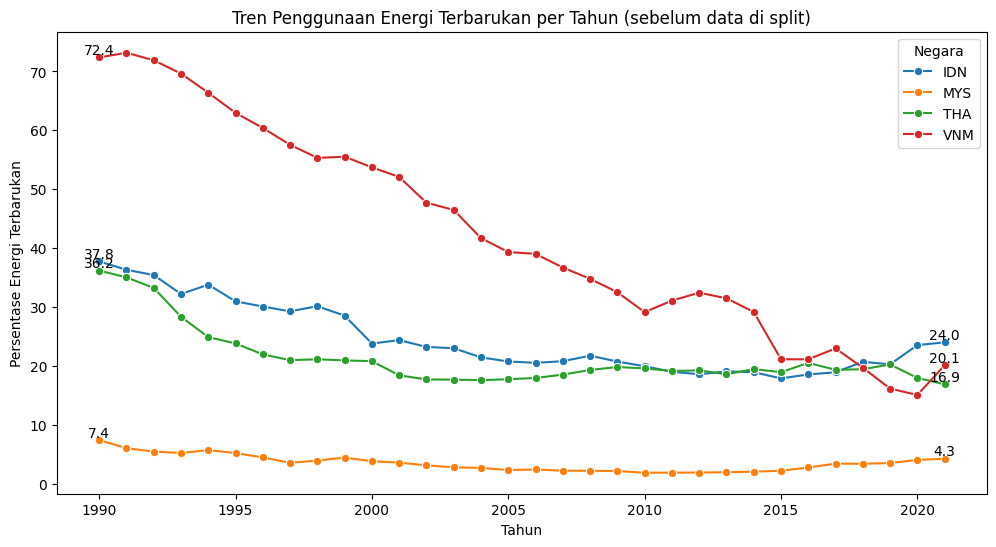

In [ ]:
# Visualisasi tren energi terbarukan per tahun sebelum data di split
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='RE_TPES', hue='Country', marker='o')
plt.title('Tren Penggunaan Energi Terbarukan per Tahun (sebelum data di split)')
plt.xlabel('Tahun')
plt.ylabel('Persentase Energi Terbarukan')
plt.legend(title='Negara')

# Menambahkan label angka di titik pertama dan terakhir
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    # Menambahkan label di titik pertama
    plt.text(country_data['Year'].iloc[0], country_data['RE_TPES'].iloc[0],
             f'{country_data["RE_TPES"].iloc[0]:.1f}', ha='center', va='bottom', fontsize=10)
    # Menambahkan label di titik terakhir
    plt.text(country_data['Year'].iloc[-1], country_data['RE_TPES'].iloc[-1],
             f'{country_data["RE_TPES"].iloc[-1]:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

- **Vietnam:** Pada tahun 1990, Vietnam memiliki tren penggunaan energi terbarukan yang sangat tinggi, yaitu sebesar 72,4%. Namun, angka ini mengalami penurunan signifikan dari tahun 2015 hingga 2020, namun terjadi kenaikan menjadi 20,1% di tahun 2021. Penurunan ini disebabkan oleh beberapa faktor, antara lain:
  - Pertumbuhan ekonomi yang cepat di Vietnam telah mendorong peningkatan permintaan energi secara signifikan, terutama untuk sektor industri.
  - Vietnam beralih ke sumber energi fosil yang lebih murah dan mudah diakses, seperti batubara atau gas alam.
  - Pemerintah lebih memprioritaskan pengembangan sumber energi konvensional untuk mendukung pertumbuhan ekonomi yang cepat.
  - Pembangunan infrastruktur untuk mendistribusikan energi terbarukan, terutama di daerah pedesaan, mungkin belum memadai. Biaya pembangunan infrastruktur energi terbarukan yang tinggi dapat menjadi hambatan.

- **Indonesia:** Pada tahun 1990, Indonesia memiliki tren penggunaan energi terbarukan yang cukup tinggi dimana hampir setara dengan Thailand, yaitu sebesar 37,8%, dan mengalami fluktuasi yang menurun, namun kembali mengalami kenaikan dimulai dari tahun 2020 hingga mencapai 24% pada tahun 2021, maka dapat disimpulkan bahwa meskipun tidak ada kenaikan yang signifikan, namun sudah mulai mengalami kenaikan yang terlihat dari tahun 2020. Penggunaan energi terbarukan di Indonesia dipengaruhi oleh beberapa faktor seperti:  
  - Dominasi energi fosil yang melimpah, terutama batu bara, peralihan ke energi terbarukan sering terhambat.
  - Tantangan teknis dan ekonomi. Meskipun teknologi energi terbarukan terus berkembang, biaya produksinya masih relatif tinggi dibandingkan energi fosil.
  - Perubahan kebijakan pemerintah yang belum optimal yang sering terjadi menciptakan ketidakpastian bagi investor dan pelaku usaha di sektor ini.
  - Ketersediaan sumber daya manusia yang kompeten di bidang energi terbarukan masih terbatas.
  - Kondisi geografis Indonesia yang terdiri dari banyak pulau serta daerah terpencil menyulitkan pembangunan infrastruktur energi terbarukan.
  
  Oleh karena itu, diperlukan upaya kolaboratif antara pemerintah, sektor swasta, dan masyarakat untuk mengatasi tantangan ini dan mendorong penggunaan energi terbarukan secara lebih luas.

- **Thailand:** Pada tahun 1990, Thailand memiliki tren penggunaan energi terbarukan yang hanya selisih 1,6% lebih rendah dari Indonesia, yaitu sebesar 36,2%, namun mengalami penurunan terutama dimulai pada tahun 2019 hingga 2021 dimana sudah menjadi 16,9%. Penurunan ini disebabkan oleh beberapa faktor, antara lain:  
  - Thailand memiliki sumber daya alam berupa gas alam yang cukup melimpah, sehingga ketergantungan pada sumber daya ini membuat negara cenderung mempertahankan penggunaan energi fosil.
  - Investasi awal untuk membangun pembangkit listrik tenaga surya, angin, atau hidro jauh lebih tinggi dibandingkan dengan pembangkit listrik tenaga fosil.
  - Kebijakan energi yang sering berubah menciptakan ketidakpastian bagi investor, sehingga mereka ragu untuk berinvestasi jangka panjang dalam sektor energi terbarukan.
  - Keterbatasan lahan untuk pembangkit listrik tenaga surya di daerah perkotaan dapat menghambat pengembangan energi terbarukan.

- **Malaysia:** Pada tahun 1990, Malaysia memiliki tren penggunaan energi terbarukan yang sangat rendah, yaitu sebesar 7.4%, dan mengalami fluktuasi yang cenderung menurun bahkan pada tahun 2021 menjadi 4.3%. Penggunaan energi terbarukan di Malaysia tergolong masih sangat lambat pertumbuhannya. Beberapa faktor yang menyebabkan hal ini antara lain:
  - Cadangan energi fosil yang melimpah seperti cadangan minyak dan gas alam yang cukup besar dan infrastruktur yang sudah ada menjadi hambatan utama dalam peralihan ke energi terbarukan.
  - Biaya investasi yang tinggi dan teknologi yang belum sepenuhnya matang menjadi kendala dalam pengembangan energi terbarukan.
  - Kebijakan pemerintah yang ada belum sepenuhnya mendukung pengembangan energi terbarukan secara optimal.
  - Rendahnya kesadaran masyarakat mengenai pentingnya energi terbarukan menghambat adopsi dan dukungan terhadap inisiatif ini.


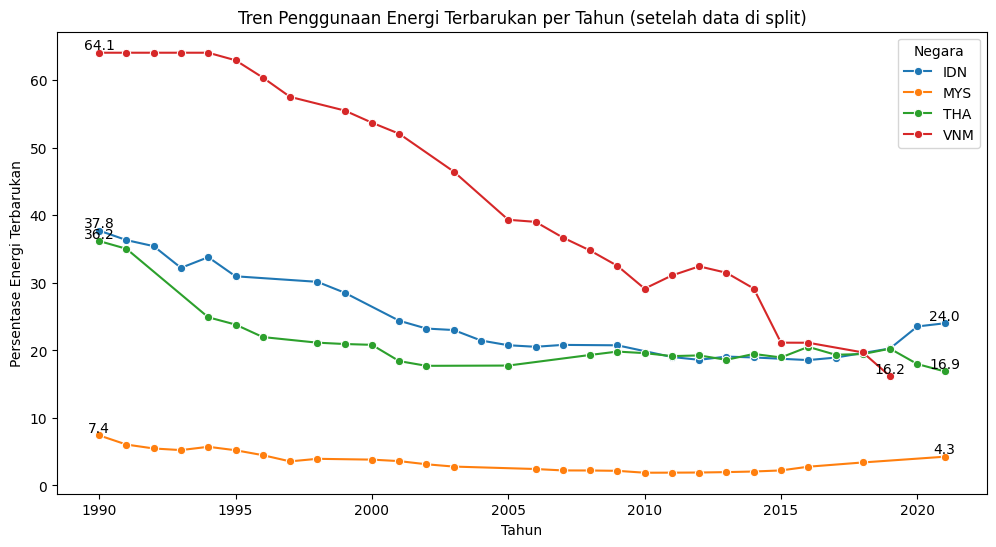

In [ ]:
# Visualisasi tren energi terbarukan per tahun setelah data di split
plt.figure(figsize=(12, 6))

# Plot garis untuk setiap negara berdasarkan data setelah split
for country_col in ['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']:
    country_name = country_col.split('_')[1]
    country_data1 = X_train_encoded[X_train_encoded[country_col] == 1]
    sns.lineplot(data=country_data1, x='Year', y='RE_TPES', marker='o', label=country_name)

# Menambahkan label hanya di titik awal dan akhir
for country in X_train['Country'].unique():
    # Ambil subset data berdasarkan negara dan urutkan berdasarkan tahun
    country_data1 = X_train[X_train['Country'] == country].sort_values(by='Year')

    # Titik awal (data pertama setelah pengurutan)
    first_row = country_data1.iloc[0]
    plt.text(first_row['Year'], first_row['RE_TPES'],
             f'{first_row["RE_TPES"]:.1f}', ha='center', va='bottom', fontsize=10, color='black')

    # Titik akhir (data terakhir setelah pengurutan)
    last_row = country_data1.iloc[-1]
    plt.text(last_row['Year'], last_row['RE_TPES'],
             f'{last_row["RE_TPES"]:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Tren Penggunaan Energi Terbarukan per Tahun (setelah data di split)')
plt.xlabel('Tahun')
plt.ylabel('Persentase Energi Terbarukan')
plt.legend(title='Negara')
plt.show()

- **Indonesia:** Pada tahun 1990, Indonesia memiliki tren penggunaan energi terbarukan yang cukup tinggi, yaitu sebesar 37.8%, dan mengalami kenaikan pada tahun 2021 hingga mencapai 24.0%. Data sebelum di split menyimpulkan tidak ada kenaikan yang signifikan, sementara data setelah di split menunjukkan adanya kenaikan, meskipun sangat kecil. Faktor yang mempengaruhi yaitu:
  - Ketersediaan sumber daya fosil yang melimpah dan infrastruktur yang sudah ada membuat transisi ke energi terbarukan menjadi lebih lambat.
  - Biaya investasi yang tinggi dan keterbatasan teknologi masih menjadi hambatan. Perubahan kebijakan pemerintah juga dapat mempengaruhi iklim investasi, menjadikannya lebih kompleks.
  - Ketidakpastian akibat perubahan kebijakan yang sering terjadi menciptakan hambatan bagi investor dan pelaku usaha.
  - Keterbatasan sumber daya manusia yang kompeten di bidang energi terbarukan menjadi faktor tambahan yang memperlambat pengembangan sektor ini.

- **Malaysia:** Pada tahun 1990, Malaysia memiliki tren penggunaan energi terbarukan yang sangat rendah, yaitu sebesar 7.4%, dan mengalami kenaikan pada tahun 2021 menjadi 4.3%. Baik data sebelum maupun sesudah di-split menunjukkan tren yang sama, yaitu pertumbuhan penggunaan energi terbarukan di Malaysia yang sangat lambat. Beberapa faktor yang menyebabkan hal ini antara lain:
  - Cadangan energi fosil yang melimpah seperti cadangan minyak dan gas alam yang cukup besar dan infrastruktur yang sudah ada menjadi hambatan utama dalam peralihan ke energi terbarukan.
  - Biaya investasi yang tinggi dan teknologi yang belum sepenuhnya matang menjadi kendala dalam pengembangan energi terbarukan.
  - Kebijakan pemerintah yang ada belum sepenuhnya mendukung pengembangan energi terbarukan secara optimal.
  - Rendahnya kesadaran masyarakat mengenai pentingnya energi terbarukan menghambat adopsi dan dukungan terhadap inisiatif ini.

- **Thailand:** Pada tahun 1990, Thailand memiliki tren penggunaan energi terbarukan sebesar 36.2%, namun mengalami penurunan pada tahun 2021 menjadi 16.9%. Baik data sebelum maupun sesudah di-split menunjukkan tren yang sama. Penurunan ini disebabkan oleh beberapa faktor, antara lain:  
  - Thailand memiliki sumber daya alam berupa gas alam yang cukup melimpah, sehingga ketergantungan pada sumber daya ini membuat negara cenderung mempertahankan penggunaan energi fosil.
  - Investasi awal untuk membangun pembangkit listrik tenaga surya, angin, atau hidro jauh lebih tinggi dibandingkan dengan pembangkit listrik tenaga fosil.
  - Kebijakan energi yang sering berubah menciptakan ketidakpastian bagi investor, sehingga mereka ragu untuk berinvestasi jangka panjang dalam sektor energi terbarukan.
  - Keterbatasan lahan untuk pembangkit listrik tenaga surya di daerah perkotaan dapat menghambat pengembangan energi terbarukan.
- **Vietnam:** Pada tahun 1991, Vietnam memiliki tren penggunaan energi terbarukan yang sangat tinggi, yaitu sebesar 64.1% dan cenderung stabil hingga sekitar tahun 1995, namun mengalami penurunan signifikan dari tahun tersebut meskipun sempat mengalami kenaikan di tahun 2010 tapi kembali menunjukkan tren penurunan dari tahun 2015 hingga 2020. Perbandingan data sebelum dan sesudah di-split menunjukkan perbedaan signifikan dalam persentase penggunaan energi terbarukan di Vietnam. Faktor yang mempengaruhi yaitu:
  - Mendorong peralihan dari energi terbarukan ke energi fosil.
  - Penyesuaian kebijakan yang lebih menguntungkan bagi industri energi konvensional.
  - Keterbatasan Infrastruktur: Infrastruktur yang ada belum memadai untuk mendukung distribusi energi terbarukan secara luas, terutama di daerah pedesaan.
  - Infrastruktur yang ada belum memadai untuk distribusi energi terbarukan secara luas, terutama di daerah pedesaan.
  - Penurunan harga energi fosil di pasar global membuat energi terbarukan kurang kompetitif.
  - Pengaruh dari negara-negara penghasil energi fosil atau organisasi internasional yang mungkin mempengaruhi kebijakan energi Vietnam.

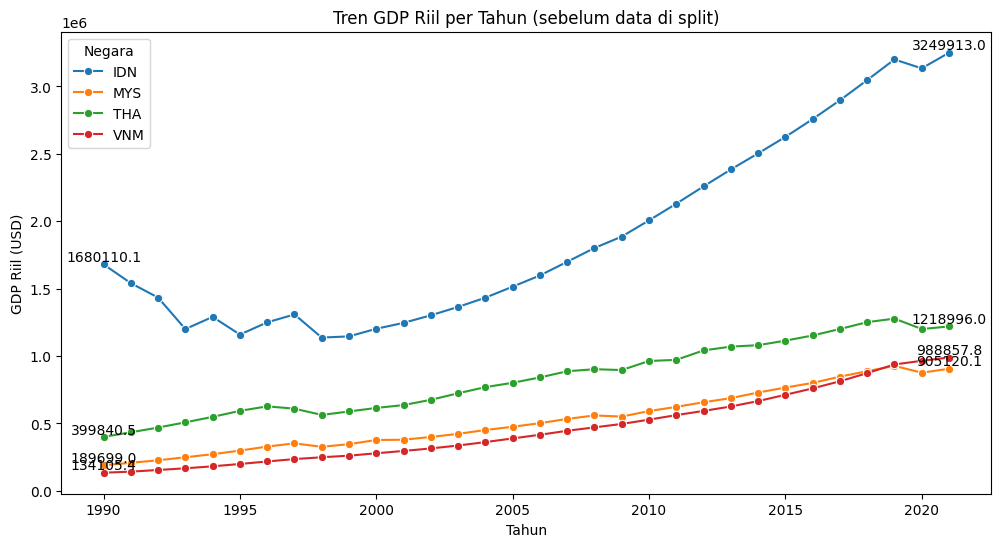

In [ ]:
# Visualisasi tren GDP Rill per tahun sebelum data di split
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP_R', hue='Country', marker='o')

# Tambahkan label angka di titik pertama dan terakhir
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Get the start and end points
    x_start, x_end = country_data['Year'].iloc[[0, -1]]
    y_start, y_end = country_data['GDP_R'].iloc[[0, -1]]

    # Add labels for the start and end points only
    plt.text(x_start, y_start, f'{y_start:.1f}', ha='center', va='bottom', fontsize=10)
    plt.text(x_end, y_end, f'{y_end:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Tren GDP Riil per Tahun (sebelum data di split)')
plt.xlabel('Tahun')
plt.ylabel('GDP Riil (USD)')
plt.legend(title='Negara')
plt.show()

**Indonesia** : Pada tahun 1990, Indonesia mencatatkan tren GDP Rill sebesar 1.680.110 USD, yang mengalami kenaikan signifikan menjadi 3.249.913 USD pada tahun 2021. Indonesia menunjukkan pertumbuhan ekonomi yang sangat pesat. Terjadi penurunan GDP Indonesia pada tahun 1990-an terutama disebabkan oleh krisis moneter Asia yang memicu ketidakstabilan ekonomi dan keuangan. Krisis ini memberikan dampak yang sangat signifikan terhadap perekonomian Indonesia. Setelah kejadian itu pertumbuhan ekonomi Indonesia didorong oleh konsumsi rumah tangga yang kuat, investasi pemerintah, dan pertumbuhan sektor jasa.

**Malaysia** : Malaysia memiliki tren GDP Rill sebesar 189.699 USD pada tahun 1990, yang meningkat menjadi 905.120  USD pada tahun 2021. Negara ini mencatatkan pertumbuhan ekonomi yang cukup tinggi dan konsisten. Pertumbuhan ekonomi Malaysia didorong oleh sektor manufaktur, jasa, dan pariwisata. Investasi asing langsung (FDI) juga  berperan penting dalam mendorong pertumbuhan.

**Thailand** : Pada tahun 1990, Thailand memiliki tren GDP Rill sebesar 399.840 USD, yang meningkat menjadi 1,218,996 USD pada tahun 2021. Thailand menunjukkan tren pertumbuhan PDB riil yang stabil dan konsisten. Sektor pariwisata dan industri otomotif menjadi tulang punggung perekonomian Thailand, berkontribusi signifikan terhadap pertumbuhan GDP.

**Vietnam** : Pada tahun 1990 Vietnam menunjukkan tren GDP Rill dengan angka 134.105 USD yang mningkat menjadi 988.857 USD pada tahun 2021. Negara ini mencatatkan pertumbuhan ekonomi yang cukup tinggi dan konsisten. Pertumbuhan ekonomi negara ini didorong oleh investasi asing langsung (FDI) yang besar, pertumbuhan sektor manufaktur, dan kebijakan pemerintah yang mendukung perkembangan ekonomi.

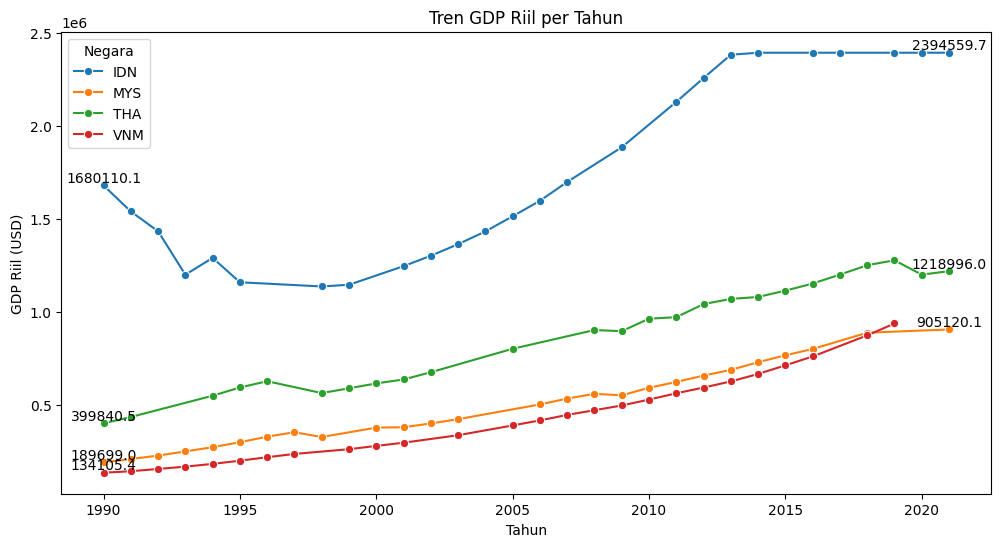

In [ ]:
# Visualisasi tren GDP Riil per Tahun setelah di split data
plt.figure(figsize=(12, 6))

# Daftar negara yang akan divisualisasikan
countries = ['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']

for country_col in countries:
    country_name = country_col.split('_')[1]
    country_data = X_train_encoded[X_train_encoded[country_col] == 1]

    # Plot garis untuk negara
    sns.lineplot(data=country_data, x='Year', y='GDP_R', marker='o', label=country_name)

    # Ambil titik awal (tahun 1990) dan akhir (tahun 2021)
    if 1990 in country_data['Year'].values:
        y_start = country_data[country_data['Year'] == 1990]['GDP_R'].values[0]
        plt.text(1990, y_start + 10, f'{y_start:.1f}', ha='center', va='bottom', fontsize=10)  # Geser ke atas

    if 2021 in country_data['Year'].values:
        y_end = country_data[country_data['Year'] == 2021]['GDP_R'].values[0]
        plt.text(2021, y_end + 10, f'{y_end:.1f}', ha='center', va='bottom', fontsize=10)  # Geser ke atas

plt.title('Tren GDP Riil per Tahun')
plt.xlabel('Tahun')
plt.ylabel('GDP Riil (USD)')
plt.legend(title='Negara')
plt.show()

**Indonesia :** Berbeda dengan kondisi sebelum split data, setelah split data, Indonesia mengalami kestabilan pada tahun 2012-2020. Pada tahun 1990, Indonesia mencatatkan tren GDP Rill sebesar  1.680.110 USD, yang mengalami kenaikan signifikan menjadi 2.394.559 USD pada tahun 2021. Secara umum, tren pertumbuhan ekonomi Indonesia tetap menunjukkan peningkatan yang signifikan. Faktor-faktor seperti konsumsi rumah tangga, investasi, ekspor, dan stabilitas politik berkontribusi pada pertumbuhan ekonomi negara ini.

**Malaysia :** Pada tahun 1990, Malaysia memiliki tren GDP Rill sebesar 189.699 USD pada tahun 1990, yang terus mengalami fluktuasi yang meningkat seiring waktu terutama saat tahun 2021. Negara ini mencatatkan pertumbuhan ekonomi yang cukup tinggi dan konsisten, dengan sektor manufaktur, jasa, dan pariwisata sebagai pilar utama perekonomian. Stabilitas politik dan ekonomi yang relatif baik turut mendukung pertumbuhan tersebut.

**Thailand:** Pada tahun 1990, Thailand memiliki tren GDP Rill sebesar 399.840 USD, yang meningkat menjadi 1.200.176 USD pada tahun 2021. Sektor pariwisata dan industri otomotif menjadi tulang punggung perekonomian Thailand, berkontribusi signifikan terhadap pertumbuhan GDP.

**Vietnam:** Pada tahun 1990 Vietnam menunjukkan tren GDP Rill dengan angka 134.105 USD terus mengalami fluktuasi yang meningkat seiring waktu. Negara ini mencatatkan pertumbuhan ekonomi yang cukup tinggi dan konsisten. Pertumbuhan ekonomi negara ini didorong oleh investasi asing langsung (FDI) yang besar, pertumbuhan sektor manufaktur, dan kebijakan pemerintah yang mendukung perkembangan ekonomi.


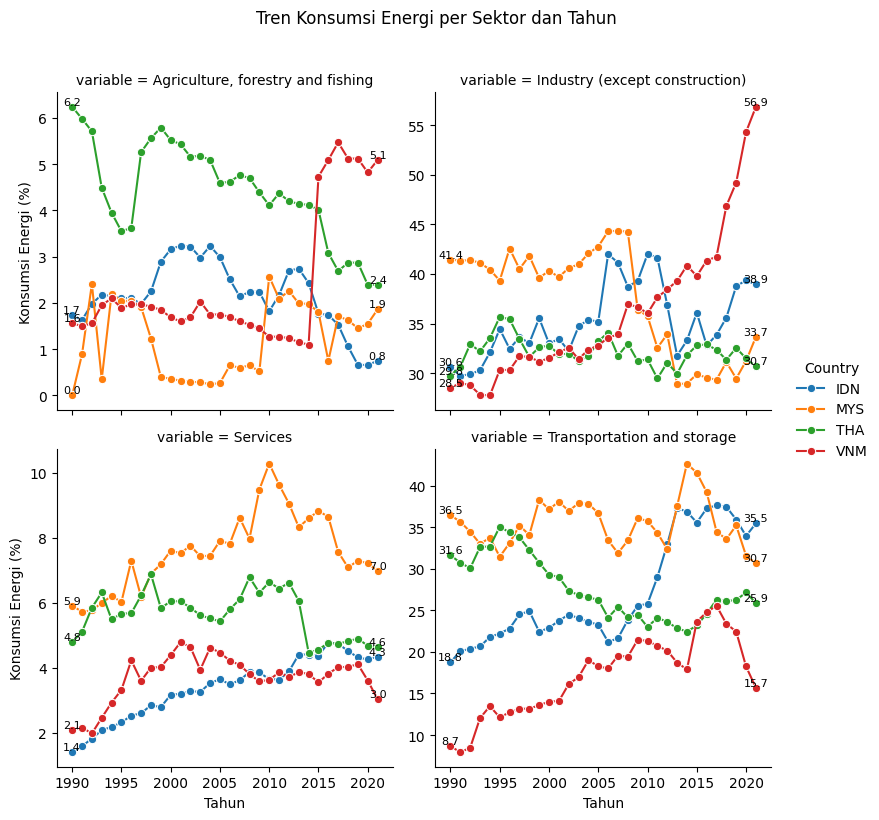

In [ ]:
# Visualisasi tren konsumsi energi per sektor dan tahun
sectors = ['Agriculture, forestry and fishing', 'Industry (except construction)',
           'Services', 'Transportation and storage']

g = sns.FacetGrid(df.melt(id_vars=['Year', 'Country'], value_vars=sectors),
                  col='variable', hue='Country', col_wrap=2, sharey=False, height=4)
g.map(sns.lineplot, 'Year', 'value', marker='o').add_legend()

# Title
g.fig.suptitle('Tren Konsumsi Energi per Sektor dan Tahun', y=1.02)
g.set_axis_labels('Tahun', 'Konsumsi Energi (%)')
g.tight_layout()

# Menambahkan label angka di titik pertama dan terakhir
for ax in g.axes.flat:
    for line in ax.lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()

        # Add labels for the start and end points only
        ax.text(xdata[0], ydata[0], f'{ydata[0]:.1f}', ha='center', va='bottom', fontsize=8)
        ax.text(xdata[-1], ydata[-1], f'{ydata[-1]:.1f}', ha='center', va='bottom', fontsize=8)

plt.show()

**Trend Konsumsi Energi pada sektor agriculture, forestry and fishing:**
 - **Indonesia:** Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 1.7%, yang mengalami penurunan hingga mencapai 0.8% pada tahun 2021. Tren konsumsi energi di sektor ini menunjukkan fluktuasi yang cukup signifikan dari tahun ke tahun, dipengaruhi oleh faktor-faktor seperti musim tanam dan panen, perubahan teknologi pertanian, harga energi, serta kebijakan pemerintah terkait subsidi energi dan penggunaan energi terbarukan. Puncak konsumsi energi biasanya terjadi pada musim tanam dan panen, sementara penurunan terjadi pada periode di luar musim tanam.

 - **Malaysia:** Pada tahun 1990, Malaysia memiliki tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 0.0%, yang meningkat menjadi 1.9% pada tahun 2021. Kenaikan ini disebabkan oleh penggunaan teknologi pertanian yang lebih modern dan efisien, serta adanya kebijakan pemerintah yang lebih terarah dalam mengelola konsumsi energi di sektor ini. Namun, fluktuasi harga komoditas pertanian dan energi global tetap dapat memengaruhi pola konsumsi energi di Malaysia.

 - **Thailand:** Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor agriculture, forestry, and fishing yang cukup tinggi, yaitu sebesar 6.2%, namun mengalami penurunan menjadi 2.4% pada tahun 2021. Sektor pariwisata yang berkembang pesat di Thailand juga berpengaruh terhadap konsumsi energi di sektor pertanian, terutama untuk memenuhi kebutuhan energi di sektor perhotelan dan restoran yang terkait dengan pariwisata berbasis pertanian.

 - **Vietnam:** Pada tahun 1990, Vietnam memiliki tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 1.6%, yang mengalami kenaikan signifikan menjadi 5.1% pada tahun 2021. Peningkatan konsumsi energi ini sejalan dengan pertumbuhan ekonomi yang pesat, mencerminkan peningkatan aktivitas produksi pertanian dan perikanan di Vietnam. Di sisi lain, Vietnam juga berupaya meningkatkan efisiensi energi di sektor pertanian melalui adopsi teknologi baru dan kebijakan pemerintah yang mendukung penggunaan energi terbarukan.

**Trend Konsumsi Energi pada sektor Industry (except construction):**
 - **Indonesia:** Konsumsi energi sektor industri di Indonesia cenderung meningkat secara bertahap dari tahun ke tahun. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 30.6%, yang mengalami kenaikan hingga mencapai 38.9% pada tahun 2021. Kenaikan ini menunjukkan pertumbuhan ekonomi dan industrialisasi yang terus berlanjut di Indonesia. Faktor-faktor yang berkontribusi terhadap kenaikan ini antara lain:
  - Seiring dengan pertumbuhan ekonomi, permintaan akan produk industri meningkat, sehingga konsumsi energi pun ikut meningkat.
  - Perkembangan sektor industri manufaktur dan pengolahan mendorong peningkatan konsumsi energi.
  - Urbanisasi menyebabkan peningkatan permintaan energi untuk keperluan rumah tangga, transportasi, dan industri di daerah perkotaan.

 - **Malaysia:** Konsumsi energi sektor industri di Malaysia mengalami penurunan yang cukup signifikan. Pada tahun 1990, Malaysia mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 41.4%, yang mengalami penurunan yang signifikan hingga mencapai 33.7% pada tahun 2021. Penurunan disebabkan oleh beberapa faktor, seperti:
  - Upaya pemerintah Malaysia dalam meningkatkan efisiensi energi di sektor industri, seperti penggunaan teknologi yang lebih efisien dan kebijakan energi yang mendukung, telah berhasil menurunkan konsumsi energi.
  - Mungkin terjadi pergeseran dari industri yang intensif energi ke industri yang lebih berorientasi jasa.
  - Krisis ekonomi global dapat menyebabkan penurunan aktivitas industri dan konsumsi energi.

 - **Thailand:** Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 29.8%, yang mengalami kenaikan sedikit mencapai 30.7% pada tahun 2021.  Hal ini mungkin terkait dengan upaya pemerintah Thailand dalam mempromosikan energi terbarukan dan meningkatkan efisiensi energi di sektor industri. Selain itu, faktor-faktor seperti perubahan struktur ekonomi dan dampak krisis ekonomi global juga dapat mempengaruhi tren ini.

 - **Vietnam:** Konsumsi energi sektor industri di Vietnam mengalami peningkatan yang sangat pesat. Hal ini menunjukkan pertumbuhan ekonomi yang sangat cepat di Vietnam, terutama di sektor manufaktur. Pada tahun 1990, Vietnam mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 28.5%, yang mengalami kenaikan yang sangat pesat mencapai 56.9% pada tahun 2021.  Faktor-faktor yang berkontribusi terhadap peningkatan ini antara lain:
  - Vietnam sedang mengalami industrialisasi yang pesat, terutama di sektor manufaktur yang berorientasi ekspor.
  - Aliran investasi asing langsung mendorong pertumbuhan industri dan meningkatkan permintaan energi.
  - Pemerintah Vietnam memberikan berbagai insentif untuk menarik investasi dan mendorong pertumbuhan industri.

**Trend Konsumsi Energi pada sektor Services:**
 - **Indonesia:** Konsumsi energi sektor jasa di Indonesia cenderung meningkat secara bertahap dari tahun 1990 hingga 2021. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor services sebesar 1.4%, yang mengalami kenaikan mencapai 4.3% pada tahun 2021. Kenaikan ini menunjukkan pertumbuhan ekonomi dan urbanisasi yang pesat di Indonesia, yang diikuti oleh peningkatan permintaan akan layanan jasa seperti transportasi, perhotelan, dan komunikasi.
 - **Malaysia:** Pada tahun 2000, Malaysia mencatatkan tren konsumsi energi pada sektor services sebesar 5.9%, yang mengalami penurunan mencapai 7.0% pada tahun 2021. Hal ini disebabkan oleh beberapa faktor, seperti:
  - Upaya pemerintah Malaysia dalam meningkatkan efisiensi energi di sektor jasa, seperti penggunaan teknologi yang lebih efisien dan kebijakan energi yang mendukung, telah berhasil menurunkan konsumsi energi.
  - Terjadi pergeseran dari sektor jasa yang intensif energi ke sektor jasa yang lebih berorientasi pengetahuan.
 - **Thailand:** Konsumsi energi sektor jasa di Thailand mengalami penurunan yang cukup signifikan. Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor services sebesar 4.8%, yang mengalami penurunan mencapai 4.6% pada tahun 2021. Hal ini mungkin terkait dengan upaya pemerintah Thailand dalam mempromosikan energi terbarukan dan meningkatkan efisiensi energi di sektor jasa. Selain itu, faktor-faktor seperti perubahan struktur ekonomi dan dampak krisis ekonomi global juga dapat mempengaruhi tren ini.
 - **Vietnam:** Pada tahun 1990, Vietnam mencatatkan tren konsumsi energi pada sektor services sebesar 2.1%, yang mengalami penurunan mencapai 3.0% pada tahun 2021. Laju pertumbuhan konsumsi energi sektor jasa di Vietnam lebih lambat dibandingkan dengan sektor industri.


**Trend Konsumsi Energi pada sektor Transportation and storage:**
 - **Indonesia:** Konsumsi energi sektor transportasi dan penyimpanan di Indonesia menunjukkan peningkatan yang signifikan dari tahun 1990 hingga 2021. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 18.6%, yang mengalami kenaikan hingga mencapai 35.5% pada tahun 2021. Faktor-faktor yang berkontribusi terhadap kenaikan ini antara lain:
  - Seiring dengan pertumbuhan ekonomi, permintaan akan transportasi barang dan penumpang meningkat, sehingga konsumsi energi pun ikut meningkat.
  - Urbanisasi menyebabkan peningkatan penggunaan kendaraan pribadi dan transportasi umum, yang berimbas pada peningkatan konsumsi energi.
  - Perkembangan sektor industri mendorong peningkatan transportasi barang, yang juga meningkatkan konsumsi energi.

 - **Malaysia:** Konsumsi energi sektor transportasi dan penyimpanan di Malaysia cenderung stabil dengan sedikit penurunan. Pada tahun 1990, Malaysia mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 36.5%, yang mengalami penurunan mencapai 30.7% pada tahun 2021. Hal ini disebabkan oleh beberapa faktor, seperti:
   - Upaya pemerintah Malaysia dalam meningkatkan efisiensi energi di sektor transportasi, seperti penggunaan kendaraan yang lebih efisien dan pengembangan transportasi umum, telah berhasil menurunkan konsumsi energi.
  - Terjadi pergeseran dari penggunaan kendaraan pribadi ke transportasi umum yang lebih efisien.

 - **Thailand:** Konsumsi energi sektor transportasi dan penyimpanan di Thailand menunjukkan penurunan. Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 31.6%, yang mengalami penurunan mencapai 26.9% pada tahun 2021. Hal ini terkait dengan upaya pemerintah Thailand dalam mempromosikan transportasi umum dan penggunaan kendaraan listrik.
 - **Vietnam:** Pada tahun 1990, Vietnam mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 8.7%, yang mengalami kenaikan mencapai 15,7% pada tahun 2021. Hal ini menunjukkan pertumbuhan ekonomi dan urbanisasi yang terjadi di Vietnam. Namun, laju pertumbuhan konsumsi energi sektor transportasi di Vietnam lebih lambat dibandingkan dengan sektor industri.

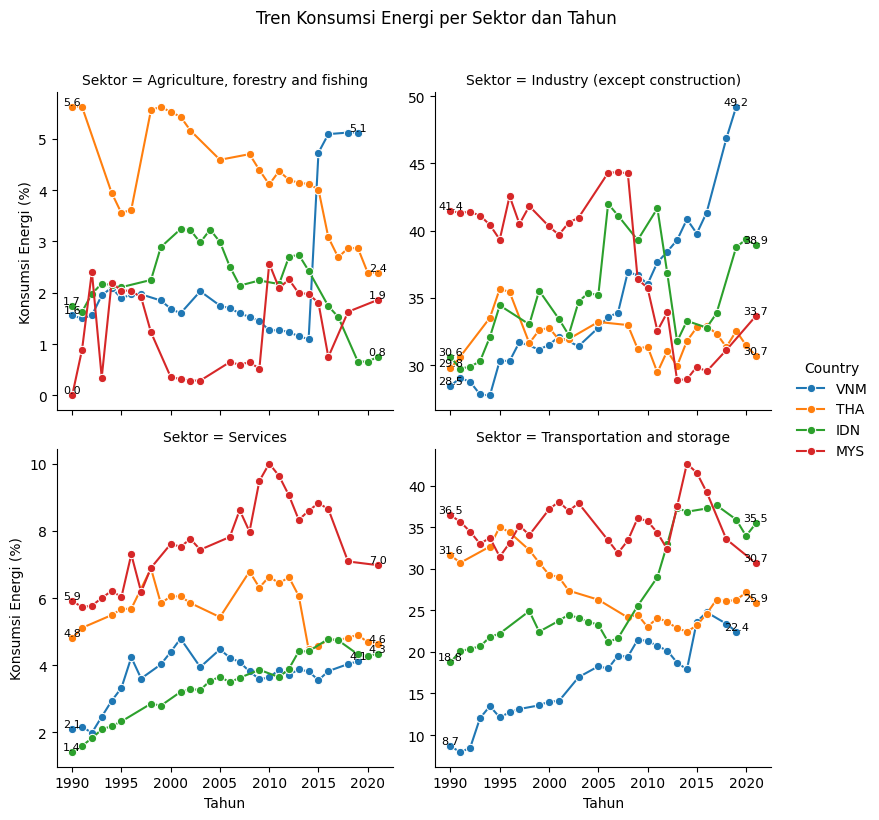

In [ ]:
# Visualisasi tren konsumsi energi per sektor dan tahun setelah data di split
sectors = ['Agriculture, forestry and fishing', 'Industry (except construction)',
           'Services', 'Transportation and storage']

# Check if X_train_encoded exists, if not, raise an error
if 'X_train_encoded' not in locals():
    raise NameError("X_train_encoded is not defined. Please make sure you've run the feature encoding code before this visualization.")

melted_data = X_train_encoded.melt(id_vars=['Year', 'Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM'],
                                   value_vars=sectors,
                                   var_name='Sektor',
                                   value_name='Konsumsi_Energi')

country_mapping = {
    'Country_IDN': 'IDN',
    'Country_MYS': 'MYS',
    'Country_THA': 'THA',
    'Country_VNM': 'VNM'
}

melted_data['Country'] = melted_data[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).map(lambda x: country_mapping[x])
g = sns.FacetGrid(melted_data, col='Sektor', hue='Country', col_wrap=2, sharey=False, height=4)
g.map(sns.lineplot, 'Year', 'Konsumsi_Energi', marker='o').add_legend()


# Title
g.fig.suptitle('Tren Konsumsi Energi per Sektor dan Tahun', y=1.02)
g.set_axis_labels('Tahun', 'Konsumsi Energi (%)')
g.tight_layout()

# Menambahkan label angka di titik pertama dan terakhir
for ax in g.axes.flat:
    for line in ax.lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()

        # Add labels for the start and end points only
        ax.text(xdata[0], ydata[0], f'{ydata[0]:.1f}', ha='center', va='bottom', fontsize=8)
        ax.text(xdata[-1], ydata[-1], f'{ydata[-1]:.1f}', ha='center', va='bottom', fontsize=8)

plt.show()

**Trend Konsumsi Energi pada sektor agriculture, forestry and fishing:**   
 - **Indonesia**: Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 1.7%, yang mengalami penurunan hingga mencapai 0.8% pada tahun 2021. Tren konsumsi energi di sektor ini menunjukkan fluktuasi yang cukup signifikan dari tahun ke tahun, dipengaruhi oleh faktor-faktor seperti musim tanam dan panen, perubahan teknologi pertanian, harga energi, serta kebijakan pemerintah terkait subsidi energi dan penggunaan energi terbarukan. Puncak konsumsi energi biasanya terjadi pada musim tanam dan panen, sementara penurunan terjadi pada periode di luar musim tanam.
 - **Malaysia:** Pada tahun 1990, Malaysia memiliki tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 0.0%, yang meningkat menjadi 1.9% pada tahun 2021. Kenaikan ini disebabkan oleh penggunaan teknologi pertanian yang lebih modern dan efisien, serta adanya kebijakan pemerintah yang lebih terarah dalam mengelola konsumsi energi di sektor ini. Namun, fluktuasi harga komoditas pertanian dan energi global tetap dapat memengaruhi pola konsumsi energi di Malaysia.
 - **Thailand:** Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor agriculture, forestry, and fishing yang cukup tinggi, yaitu sebesar 5.6%, namun mengalami penurunan menjadi 2.4% pada tahun 2021. Sektor pariwisata yang berkembang pesat di Thailand juga berpengaruh terhadap konsumsi energi di sektor pertanian, terutama untuk memenuhi kebutuhan energi di sektor perhotelan dan restoran yang terkait dengan pariwisata berbasis pertanian.
 - **Vietnam:** Pada tahun 1990, Vietnam memiliki tren konsumsi energi pada sektor agriculture, forestry, and fishing sebesar 1.6%, yang mengalami kenaikan signifikan menjadi 5.1% pada tahun 2021. Peningkatan konsumsi energi ini sejalan dengan pertumbuhan ekonomi yang pesat, mencerminkan peningkatan aktivitas produksi pertanian dan perikanan di Vietnam. Di sisi lain, Vietnam juga berupaya meningkatkan efisiensi energi di sektor pertanian melalui adopsi teknologi baru dan kebijakan pemerintah yang mendukung penggunaan energi terbarukan.

**Trend Konsumsi Energi pada sektor Industry (except construction):**
 - **Indonesia:** Konsumsi energi sektor industri di Indonesia cenderung meningkat secara bertahap dari tahun ke tahun. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 30.6%, yang mengalami kenaikan hingga mencapai 38.9% pada tahun 2021. Kenaikan ini menunjukkan pertumbuhan ekonomi dan industrialisasi yang terus berlanjut di Indonesia. Faktor-faktor yang berkontribusi terhadap kenaikan ini antara lain:
  - Seiring dengan pertumbuhan ekonomi, permintaan akan produk industri meningkat, sehingga konsumsi energi pun ikut meningkat.
  - Perkembangan sektor industri manufaktur dan pengolahan mendorong peningkatan konsumsi energi.
  - Urbanisasi menyebabkan peningkatan permintaan energi untuk keperluan rumah tangga, transportasi, dan industri di daerah perkotaan.

 - **Malaysia:** Konsumsi energi sektor industri di Malaysia mengalami penurunan yang cukup signifikan. Pada tahun 1990, Malaysia mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 41.4%, yang mengalami penurunan yang signifikan hingga mencapai 33.7% pada tahun 2021. Penurunan disebabkan oleh beberapa faktor, seperti:
  - Pemerintah Malaysia telah mendorong penggunaan teknologi yang lebih efisien dalam sektor industri, seperti mesin dan peralatan hemat energi.
  - Program-program pemerintah seperti Energy Efficiency and Conservation Act 2011 telah mendorong perusahaan untuk meningkatkan efisiensi energi melalui audit energi, label efisiensi energi, dan standar kinerja.
  - Malaysia telah mengalami pergeseran struktural ekonomi dari sektor industri padat energi ke sektor jasa.
  - Tekanan internasional untuk mengurangi emisi gas rumah kaca telah mendorong perusahaan di Malaysia untuk beralih ke sumber energi yang lebih bersih.

 - **Thailand:** Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor Industry (except construction) sebesar 29.8%, yang mengalami sedikit kenaikan menjadi 30.7% pada tahun 2021.  Hal ini mungkin terkait dengan upaya pemerintah Thailand dalam mempromosikan energi terbarukan dan meningkatkan efisiensi energi di sektor industri. Selain itu, faktor-faktor seperti perubahan struktur ekonomi dan dampak krisis ekonomi global juga dapat mempengaruhi tren ini.

 - **Vietnam:** Pertumbuhan ekonomi Vietnam yang cepat, khususnya di sektor industri, telah memicu lonjakan konsumsi energi. Data menunjukkan bahwa konsumsi energi sektor industri di Vietnam meningkat drastis dari 28.5% pada tahun 1990 menjadi 49.2% pada tahun 2021. Hal ini disebabkan oleh beberapa faktor, di antaranya industrialisasi yang pesat, masuknya investasi asing langsung dalam jumlah besar, serta kebijakan pemerintah yang memberikan insentif bagi pertumbuhan industri. Faktor-faktor yang berkontribusi terhadap peningkatan ini antara lain:
  - Vietnam sedang mengalami industrialisasi yang pesat, terutama di sektor manufaktur yang berorientasi ekspor.
  - Aliran investasi asing langsung mendorong pertumbuhan industri dan meningkatkan permintaan energi.
  - Pemerintah Vietnam memberikan berbagai insentif untuk menarik investasi dan mendorong pertumbuhan industri.

**Trend Konsumsi Energi pada sektor Services:**
 - **Indonesia:** Konsumsi energi sektor jasa di Indonesia cenderung meningkat secara bertahap dari tahun 1990 hingga 2021. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi di sektor jasa sebesar 1.4%, yang mengalami kenaikan hingga mencapai 4,3% pada tahun 2021. Faktor yang berkontribusi terhadap peningkatan konsumsi energi di sektor jasa di Indonesia antara lain:
  - Peningkatan aktivitas ekonomi yang mendorong permintaan akan layanan jasa, yang pada gilirannya meningkatkan konsumsi energi.
  - Proses urbanisasi yang cepat menyebabkan peningkatan kebutuhan akan infrastruktur dan layanan jasa di kota-kota besar.
  - Kenaikan permintaan untuk layanan transportasi, perhotelan, dan komunikasi seiring dengan pertumbuhan populasi dan peningkatan daya beli masyarakat.
  - Pembangunan infrastruktur yang lebih baik, seperti jalan, bandara, dan fasilitas publik, yang mendukung pertumbuhan sektor jasa.
  - Perubahan gaya hidup masyarakat yang lebih mengandalkan layanan jasa, seperti layanan online dan e-commerce, yang juga berkontribusi pada peningkatan konsumsi energi.

 - **Malaysia:** Konsumsi energi sektor jasa di Malaysia memang tinggi dibandingkan dengan negara lain. Pada tahun 1990, Malaysia mencatatkan tren konsumsi energi di sektor jasa sebesar 5.9%, yang mengalami kenaikan menjadi 7% pada tahun 2021. kenaikan ini disebabkan oleh beberapa faktor, antara lain:
  - Seiring dengan pertumbuhan ekonomi dan urbanisasi, permintaan akan energi untuk gedung perkantoran, pusat perbelanjaan, dan aktivitas perkotaan lainnya meningkat.
  - Peningkatan standar hidup dan gaya hidup konsumtif juga berkontribusi pada kenaikan konsumsi energi.


 - **Thailand:** Konsumsi energi sektor jasa di Thailand mengalami penurunan yang cukup signifikan. Pada tahun 1990, Thailand mencatatkan tren konsumsi energi di sektor jasa sebesar 4.8%, yang mengalami penurunan menjadi 4.6% pada tahun 2021. Penurunan ini mungkin terkait dengan upaya pemerintah Thailand dalam mempromosikan energi terbarukan dan meningkatkan efisiensi energi di sektor jasa. Faktor lain yang mempengaruhi antara lain:
  - Kebijakan dan program pemerintah yang mendorong penggunaan teknologi efisien dan praktik ramah lingkungan di sektor jasa.
  - Peningkatan penggunaan sumber energi terbarukan, seperti tenaga surya dan biomassa, yang mengurangi ketergantungan pada energi fosil.
  - Pergeseran dari sektor jasa yang intensif energi ke sektor jasa yang lebih berorientasi pada teknologi dan pengetahuan, yang cenderung lebih efisien dalam penggunaan energi.
  - Perubahan dalam pola konsumsi masyarakat, di mana terdapat peningkatan penggunaan layanan digital dan online yang lebih efisien dalam penggunaan energi.

 - **Vietnam:** Konsumsi energi sektor jasa di Vietnam mengalami kenaikan dari 2.1% pada tahun 1990 menjadi 4.1% pada tahun 2021. Meskipun ada pertumbuhan ekonomi dan urbanisasi yang signifikan, laju pertumbuhan konsumsi energi sektor jasa di Vietnam lebih lambat dibandingkan dengan sektor industri. Beberapa faktor yang mempengaruhi tren ini antara lain:
  - Meskipun ada pertumbuhan ekonomi, sektor jasa mungkin tidak tumbuh secepat sektor industri, yang lebih intensif dalam penggunaan energi.
  - Proses urbanisasi yang cepat meningkatkan permintaan untuk layanan jasa, tetapi tidak selalu berbanding lurus dengan peningkatan konsumsi energi.
  - Peningkatan kesadaran dan adopsi praktik efisiensi energi di sektor jasa, yang membantu mengurangi konsumsi energi meskipun permintaan meningkat.
  - Pergeseran dari sektor jasa yang intensif energi ke sektor jasa yang lebih berorientasi pada teknologi dan layanan digital, yang cenderung lebih efisien dalam penggunaan energi.
  - Kebijakan pemerintah yang mendukung pengembangan sektor jasa dan efisiensi energi, termasuk insentif untuk penggunaan teknologi yang lebih hemat energi.
  - Krisis ekonomi global yang mempengaruhi permintaan layanan jasa dan mengakibatkan penurunan konsumsi energi di sektor ini.


**Trend Konsumsi Energi pada sektor Transportation and storage:**
 - **Indonesia:** Konsumsi energi sektor transportasi dan penyimpanan di Indonesia menunjukkan peningkatan yang signifikan dari tahun 1990 hingga 2021. Pada tahun 1990, Indonesia mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 18.8%, yang mengalami kenaikan hingga mencapai 35.5% pada tahun 2021. Faktor-faktor yang berkontribusi terhadap kenaikan ini antara lain:
  - Seiring dengan pertumbuhan ekonomi, permintaan akan transportasi barang dan penumpang meningkat, sehingga konsumsi energi pun ikut meningkat.
  - Urbanisasi menyebabkan peningkatan penggunaan kendaraan pribadi dan transportasi umum, yang berimbas pada peningkatan konsumsi energi.
  - Perkembangan sektor industri mendorong peningkatan transportasi barang, yang juga meningkatkan konsumsi energi.

 - **Malaysia:** Sektor transportasi di Malaysia telah berhasil mengurangi konsumsi energinya, dengan penurunan dari 36.5% pada tahun 1990 menjadi 30.7% pada tahun 2021. Pencapaian ini merupakan hasil dari berbagai upaya yang dilakukan. Faktor-faktor yang berkontribusi terhadap penurunan konsumsi energi di sektor transportasi di Malaysia:
  - Pemerintah dan industri otomotif mendorong penggunaan kendaraan yang lebih efisien dalam konsumsi bahan bakar, termasuk kendaraan hibrida dan listrik.
  - Peningkatan dan pengembangan infrastruktur transportasi umum, seperti kereta api, bus, dan sistem transit cepat, yang membuat transportasi umum lebih mudah diakses dan nyaman.
  - Masyarakat semakin menyadari manfaat menggunakan transportasi umum dan beralih dari kendaraan pribadi, yang mengurangi jumlah kendaraan di jalan.
  - Kebijakan yang mendukung pengurangan emisi dan efisiensi energi, termasuk insentif untuk penggunaan kendaraan ramah lingkungan dan pengembangan transportasi berkelanjutan.
  - Penurunan biaya atau subsidi untuk transportasi umum yang membuatnya lebih terjangkau bagi masyarakat.

 - **Thailand:** Pada tahun 1990, Thailand mencatatkan tren konsumsi energi pada sektor transportation and storage sebesar 31.6%, yang mengalami penurunan yang cukup signifikan mencapai 25.9% pada tahun 2021.  Faktor-faktor yang berkontribusi terhadap penurunan konsumsi energi di sektor transportasi di Thailand:
  - Krisis ekonomi Asia 1997 menyebabkan penurunan aktivitas ekonomi dan permintaan akan transportasi.
  - Kenaikan harga BBM mendorong efisiensi penggunaan energi.
  - Masyarakat Thailand mulai beralih ke transportasi umum dan mengurangi penggunaan kendaraan pribadi.

 - **Vietnam:** Konsumsi energi di sektor transportation and storage di Vietnam mengalami peningkatan dari 8.7% pada tahun 1990 menjadi 22.4% pada tahun 2021. Meskipun pertumbuhannya signifikan, laju pertumbuhan ini lebih lambat dibandingkan dengan sektor industri. Faktor yang mempengaruhi tren konsumsi energi di sektor transportation and storage (transportasi dan penyimpanan) di Vietnam:
  - Peningkatan aktivitas ekonomi yang mendorong permintaan untuk transportasi barang dan orang.
  - Proses urbanisasi yang cepat meningkatkan kebutuhan akan infrastruktur transportasi dan penyimpanan.
  - Pertumbuhan jumlah kendaraan pribadi dan komersial yang berkontribusi pada peningkatan konsumsi energi.
  - Investasi dalam infrastruktur transportasi, seperti jalan, jembatan, dan sistem transportasi umum, yang mendukung mobilitas.
  - Kebijakan yang mendukung pengembangan sektor transportasi dan penyimpanan, termasuk insentif untuk penggunaan kendaraan yang lebih efisien.
  - Perubahan dalam pola konsumsi masyarakat yang lebih memilih layanan transportasi umum dan berbagi kendaraan.

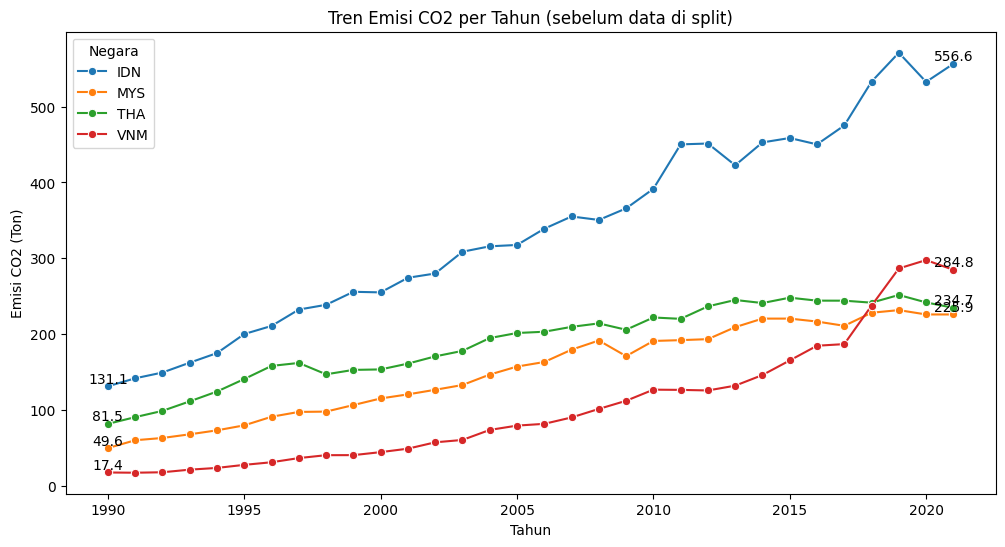

In [ ]:
# Visualisasi tren emisi CO2 per tahun untuk setiap negara sebelum data di split
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2_PBEM', hue='Country', marker='o')
plt.title('Tren Emisi CO2 per Tahun (sebelum data di split)')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2 (Ton)')
plt.legend(title='Negara')

# Menambahkan label angka di titik pertama dan terakhir
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Get the start and end points
    x_start, x_end = country_data['Year'].iloc[[0, -1]]
    y_start, y_end = country_data['CO2_PBEM'].iloc[[0, -1]]

    # Add labels for the start and end points only
    plt.text(x_start, y_start, f'{y_start:.1f}', ha='center', va='bottom', fontsize=10)
    plt.text(x_end, y_end, f'{y_end:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

**Indonesia:** Indonesia memiliki tingkat emisi CO2 tertinggi dan menunjukkan pertumbuhan yang signifikan.  Pada tahun 1990, emisi CO2 Indonesia mencapai sekitar 131.1 juta ton, mengalami kenaikan yang sangat signifikan menjadi 556.6 juta ton pada tahun 2021. Hal ini dapat disebabkan oleh:
  - Pertumbuhan ekonomi yang pesat
  - Deforestasi
  - Peningkatan penggunaan energi fosil:

**Malaysia:** Malaysia juga mengalami peningkatan emisi CO2 yang signifikan, meskipun tidak setinggi Indonesia. Pada tahun 1990, emisi CO2 Malaysia mencapai sekitar 49.6 juta ton dan mengalami kenaikan mencapai 225.9 juta ton. Hal ini dapat disebabkan oleh:
  - Sektor manufaktur dan minyak sawit merupakan penyumbang emisi utama.
  -  Peningkatan jumlah kendaraan bermotor meningkatkan emisi dari sektor transportasi.
  - Urbanisasi yang pesat mendorong peningkatan konsumsi energi di perkotaan.

**Thailand:**Thailand menunjukkan tren pertumbuhan emisi CO2 yang lebih moderat dibandingkan Indonesia dan Malaysia. Pada tahun 1990, emisi CO2 Thailand mencapai sekitar 81.5 juta ton mengalami kenaikan mencapai 234.7 juta ton. Hal ini disebabkan oleh:
  - Ekonomi Thailand lebih berorientasi pada jasa.
  - Upaya pemerintah dalam mengurangi emisi, seperti mempromosikan energi terbarukan.

**Vietnam:** Vietnam memiliki tingkat emisi CO2 yang paling rendah di antara keempat negara. Namun, negara ini juga mengalami peningkatan emisi yang cukup signifikan dalam beberapa tahun terakhir. Pada tahun 1990, emisi CO2 Vietnam mencapai sekitar 17.4 juta ton dan mengalami kenaikan signifakn pada tahun 2021 menjadi 284.8 juta ton. Faktor-faktor yang memengaruhi:
  - Pertumbuhan industri manufaktur yang pesat meningkatkan emisi.
  - Ketergantungan pada batu bara untuk pembangkit listrik juga menjadi faktor utama.

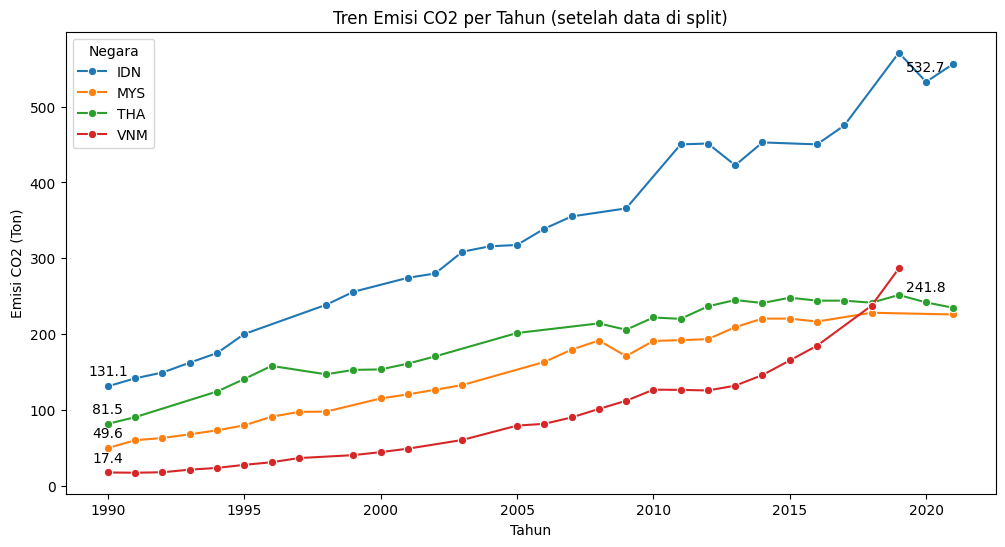

In [ ]:
#internya belum direvisi
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi tren emisi CO2 per tahun setelah data di split
plt.figure(figsize=(12, 6))

# Daftar negara yang akan divisualisasikan
countries = ['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']

for country_col in countries:
    country_name = country_col.split('_')[1]
    country_data = X_train_encoded[X_train_encoded[country_col] == 1]
    country_data = country_data.merge(y_train, left_index=True, right_index=True)

    # Plot garis untuk negara
    sns.lineplot(data=country_data, x='Year', y='CO2_PBEM', marker='o', label=country_name)

    # Ambil titik awal (tahun 1990) dan akhir (tahun 2021)
    if 1990 in country_data['Year'].values:
        y_start = country_data[country_data['Year'] == 1990]['CO2_PBEM'].values[0]
        plt.text(1990, y_start + 10, f'{y_start:.1f}', ha='center', va='bottom', fontsize=10)  # Geser ke atas

    if 2020 in country_data['Year'].values:
        y_end = country_data[country_data['Year'] == 2020]['CO2_PBEM'].values[0]
        plt.text(2020, y_end + 10, f'{y_end:.1f}', ha='center', va='bottom', fontsize=10)  # Geser ke atas

plt.title('Tren Emisi CO2 per Tahun (setelah data di split)')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2 (Ton)')
plt.legend(title='Negara')
plt.show()

**Indonesia:** Indonesia memiliki tingkat emisi CO2 tertinggi dan menunjukkan pertumbuhan yang signifikan namun terjadi penurunan pada tahun 2020 karena pandemi covid-19. Pada tahun 1990, emisi CO2 Indonesia mencapai sekitar 131.1 juta ton, pada tahun 2021 menjadi 556.6 juta ton. Hal ini dapat disebabkan oleh:
  - Pertumbuhan ekonomi yang pesat
  - Deforestasi
  - Peningkatan penggunaan energi fosil:

**Malaysia:** Malaysia juga mengalami peningkatan emisi CO2, meskipun tidak setinggi Indonesia. Pada tahun 1990, emisi CO2 Malaysia mencapai sekitar 49.6 juta ton dan mengalami kenaikan mencapai 225.9 juta ton. Hal ini dapat disebabkan oleh:
  - Sektor manufaktur dan minyak sawit merupakan penyumbang emisi utama.
  -  Peningkatan jumlah kendaraan bermotor meningkatkan emisi dari sektor transportasi.
  - Urbanisasi yang pesat mendorong peningkatan konsumsi energi di perkotaan.

**Thailand:**Thailand menunjukkan tren pertumbuhan emisi CO2 yang lebih moderat dibandingkan Indonesia dan Malaysia. Pada tahun 1990, emisi CO2 Thailand mencapai sekitar 81.5 juta ton mengalami kenaikan mencapai 234.7 juta ton. Hal ini disebabkan oleh:
  - Ekonomi Thailand lebih berorientasi pada jasa.
  - Upaya pemerintah dalam mengurangi emisi, seperti mempromosikan energi terbarukan.

**Vietnam:** Vietnam memiliki tingkat emisi CO2 yang paling rendah di antara keempat negara. Namun, negara ini juga mengalami peningkatan emisi yang cukup signifikan dalam beberapa tahun terakhir. Pada tahun 1990, emisi CO2 Vietnam mencapai sekitar 17.4 juta ton dan mengalami kenaikan signifakn pada tahun 2020 menjadi 297.6 juta ton. Faktor-faktor yang memengaruhi:
  - Pertumbuhan industri manufaktur yang pesat meningkatkan emisi.
  - Ketergantungan pada batu bara untuk pembangkit listrik juga menjadi faktor utama.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

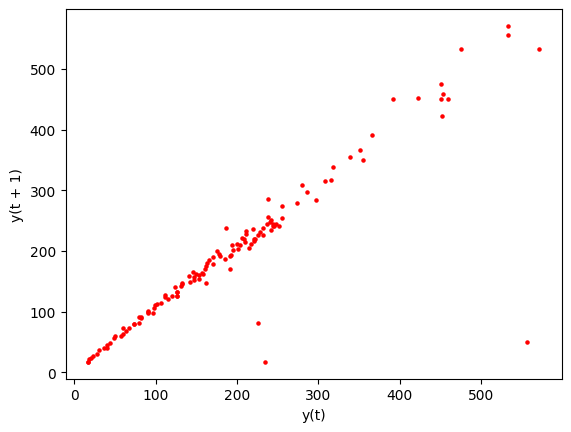

In [ ]:
from pandas.plotting import lag_plot

lag_plot(df['CO2_PBEM'], lag=1, c='red', marker='o', s=5)

Plot tersebut menunjukkan bahwa emisi CO2 menunjukkan tren peningkatan yang signifikan dan adanya autokorelasi positif yang kuat. Ini mengindikasikan bahwa emisi CO2 pada suatu periode sangat dipengaruhi oleh emisi pada periode sebelumnya. Artinya, jika emisi CO2 tinggi pada tahun ini, maka cenderung tinggi pula pada tahun berikutnya. Hal ini menunjukkan adanya tren peningkatan emisi CO2 dari waktu ke waktu.

## Scatterplot semua variabel dengan Emisi CO2

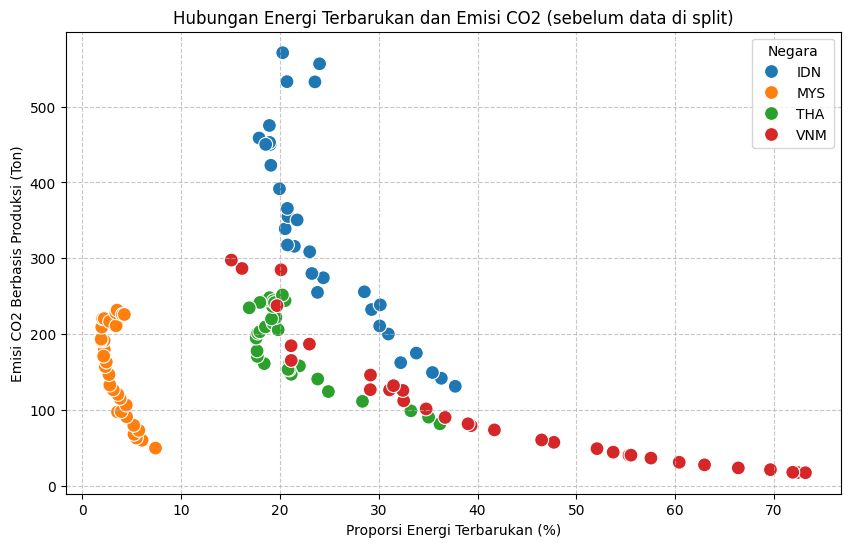

In [ ]:
# Visualisasi Hubungan Energi Terbarukan dan Emisi CO2 sebelum data di split
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Energi Terbarukan dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik Scatterplot menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Hal ini menunjukkan adanya hubungan negatif antara proporsi energi terbarukan dan emisi CO2, yang berarti bahwa semakin tinggi proporsi energi terbarukan yang digunakan, semakin rendah emisi CO2 yang dihasilkan.
 - **Indonesia:** Indonesia menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan, meskipun terdapat beberapa titik data yang menyimpang. Data Indonesia menunjukkan variasi yang cukup luas dalam hal proporsi energi terbarukan dan tingkat emisi CO2. Hal ini mengindikasikan adanya faktor lain yang juga mempengaruhi emisi selain proporsi energi terbarukan, seperti tingkat industrialisasi, pertumbuhan ekonomi, dan kebijakan energi.

- **Malaysia:** Data Malaysia cenderung terkonsentrasi pada rentang proporsi energi terbarukan yang lebih rendah. Meskipun demikian, masih terlihat tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Malaysia memiliki potensi untuk lebih meningkatkan proporsi energi terbarukan dan menurunkan emisi CO2 dengan menerapkan kebijakan yang lebih mendukung energi bersih.

- **Thailand:** Thailand menunjukkan korelasi yang lebih kuat antara proporsi energi terbarukan dan emisi CO2 dibandingkan dengan Indonesia dan Malaysia. Semakin tinggi proporsi energi terbarukan, semakin rendah emisi CO2. Hal ini mengindikasikan bahwa kebijakan energi yang telah diterapkan di Thailand cukup efektif dalam mengurangi emisi CO2.

- **Vietnam:** Vietnam memiliki tingkat emisi CO2 yang relatif rendah dibandingkan dengan negara-negara lain, bahkan pada tingkat penggunaan energi terbarukan yang lebih rendah. Ini mungkin disebabkan oleh beberapa faktor, seperti struktur ekonomi yang berbeda atau kebijakan energi yang lebih fokus pada pengembangan energi terbarukan.

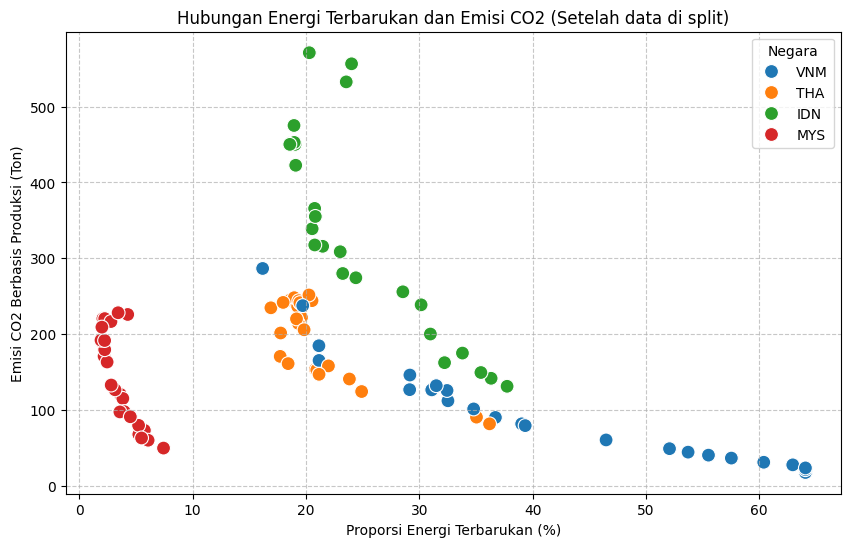

In [ ]:
# Visualisasi Hubungan Energi Terbarukan dan Emisi CO2 setelah data di split
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan Energi Terbarukan dan Emisi CO2 (Setelah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik Scatterplot menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Hal ini menunjukkan adanya hubungan negatif antara proporsi energi terbarukan dan emisi CO2, yang berarti bahwa semakin tinggi proporsi energi terbarukan yang digunakan, semakin rendah emisi CO2 yang dihasilkan.
 - **Indonesia:** Indonesia menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan, meskipun terdapat beberapa titik data yang menyimpang. Data Indonesia menunjukkan variasi yang cukup luas dalam hal proporsi energi terbarukan dan tingkat emisi CO2. Hal ini mengindikasikan adanya faktor lain yang juga mempengaruhi emisi selain proporsi energi terbarukan, seperti tingkat industrialisasi, pertumbuhan ekonomi, dan kebijakan energi.

- **Malaysia:** Data Malaysia cenderung terkonsentrasi pada rentang proporsi energi terbarukan yang lebih rendah. Meskipun demikian, masih terlihat tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Malaysia memiliki potensi untuk lebih meningkatkan proporsi energi terbarukan dan menurunkan emisi CO2 dengan menerapkan kebijakan yang lebih mendukung energi bersih.

- **Thailand:** Thailand menunjukkan korelasi yang lebih kuat antara proporsi energi terbarukan dan emisi CO2 dibandingkan dengan Indonesia dan Malaysia. Semakin tinggi proporsi energi terbarukan, semakin rendah emisi CO2. Hal ini mengindikasikan bahwa kebijakan energi yang telah diterapkan di Thailand cukup efektif dalam mengurangi emisi CO2.

- **Vietnam:** Vietnam memiliki tingkat emisi CO2 yang relatif rendah dibandingkan dengan negara-negara lain, bahkan pada tingkat penggunaan energi terbarukan yang lebih rendah. Ini mungkin disebabkan oleh beberapa faktor, seperti struktur ekonomi yang berbeda atau kebijakan energi yang lebih fokus pada pengembangan energi terbarukan.

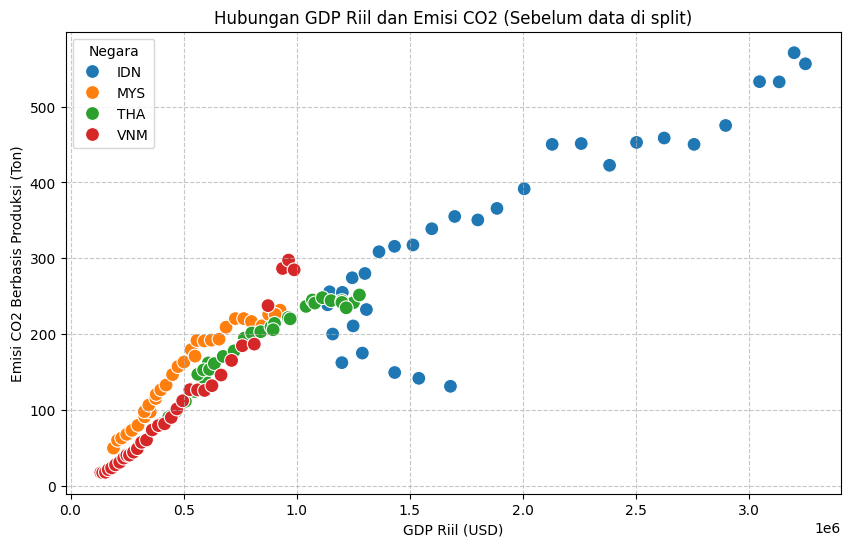

In [ ]:
# Visualisasi Hubungan GDP Riil dan Emisi CO2 sebelum data di split
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan GDP Riil dan Emisi CO2 (Sebelum data di split)')
plt.xlabel('GDP Riil (USD)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan tren peningkatan emisi CO2 seiring dengan peningkatan PDB riil di keempat negara. Ini mengindikasikan bahwa pertumbuhan ekonomi seringkali diiringi dengan peningkatan aktivitas industri dan konsumsi energi yang berujung pada peningkatan emisi CO2.
- **Indonesia:** Indonesia menunjukkan korelasi yang cukup kuat antara PDB riil dan emisi CO2. Semakin tinggi PDB riil Indonesia, semakin tinggi pula emisi CO2. Ini mengindikasikan bahwa pertumbuhan ekonomi di Indonesia masih sangat bergantung pada sektor-sektor yang intensif energi, seperti industri dan energi.

- **Malaysia:** Jika dibandingkan dengan Indonesia, Malaysia cenderung memiliki tingkat emisi CO2 yang lebih rendah untuk tingkat PDB yang sama. Ini mungkin mengindikasikan bahwa Malaysia telah melakukan upaya yang lebih baik dalam meningkatkan efisiensi energi atau mengembangkan sektor-sektor yang lebih ramah lingkungan.

- **Thailand:** Thailand juga menunjukkan korelasi positif antara PDB riil dan emisi CO2, meskipun tidak sekuat Indonesia dan Malaysia. Hal ini mengindikasikan bahwa pertumbuhan ekonomi Thailand juga berkontribusi pada peningkatan emisi, namun mungkin dengan tingkat yang lebih rendah.

- **Vietnam:** Vietnam memiliki pola yang sedikit berbeda. Meskipun masih terdapat korelasi positif antara PDB riil dan emisi CO2, namun tingkat emisi CO2 Vietnam relatif lebih rendah dibandingkan dengan negara-negara lain untuk tingkat PDB yang sama. Ini mungkin disebabkan oleh struktur ekonomi Vietnam yang masih didominasi oleh sektor pertanian dan jasa yang kurang intensif energi.

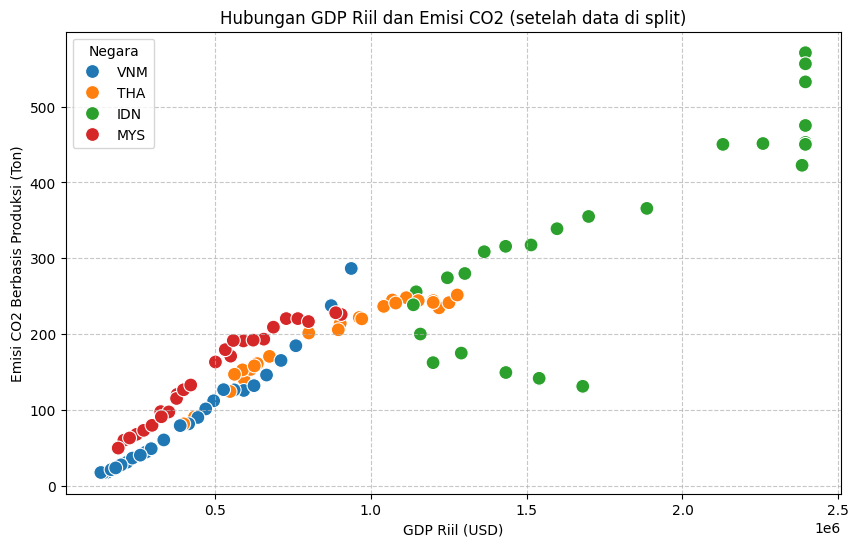

In [ ]:
# Visualisasi Hubungan GDP Riil dan Emisi CO2 setelah data di split
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='GDP_R', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan GDP Riil dan Emisi CO2 (setelah data di split)')
plt.xlabel('GDP Riil (USD)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan tren peningkatan emisi CO2 seiring dengan peningkatan PDB riil di keempat negara. Ini mengindikasikan bahwa pertumbuhan ekonomi seringkali diiringi dengan peningkatan aktivitas industri dan konsumsi energi yang berujung pada peningkatan emisi CO2.
- **Indonesia:** Indonesia menunjukkan korelasi yang cukup kuat antara PDB riil dan emisi CO2. Semakin tinggi PDB riil Indonesia, semakin tinggi pula emisi CO2. Ini mengindikasikan bahwa pertumbuhan ekonomi di Indonesia masih sangat bergantung pada sektor-sektor yang intensif energi, seperti industri dan energi.

- **Malaysia:** Jika dibandingkan dengan Indonesia, Malaysia cenderung memiliki tingkat emisi CO2 yang lebih rendah untuk tingkat PDB yang sama. Ini mungkin mengindikasikan bahwa Malaysia telah melakukan upaya yang lebih baik dalam meningkatkan efisiensi energi atau mengembangkan sektor-sektor yang lebih ramah lingkungan.

- **Thailand:** Thailand juga menunjukkan korelasi positif antara PDB riil dan emisi CO2, meskipun tidak sekuat Indonesia dan Malaysia. Hal ini mengindikasikan bahwa pertumbuhan ekonomi Thailand juga berkontribusi pada peningkatan emisi, namun mungkin dengan tingkat yang lebih rendah.

- **Vietnam:** Vietnam memiliki pola yang sedikit berbeda. Meskipun masih terdapat korelasi positif antara PDB riil dan emisi CO2, namun tingkat emisi CO2 Vietnam relatif lebih rendah dibandingkan dengan negara-negara lain untuk tingkat PDB yang sama. Ini mungkin disebabkan oleh struktur ekonomi Vietnam yang masih didominasi oleh sektor pertanian dan jasa yang kurang intensif energi.

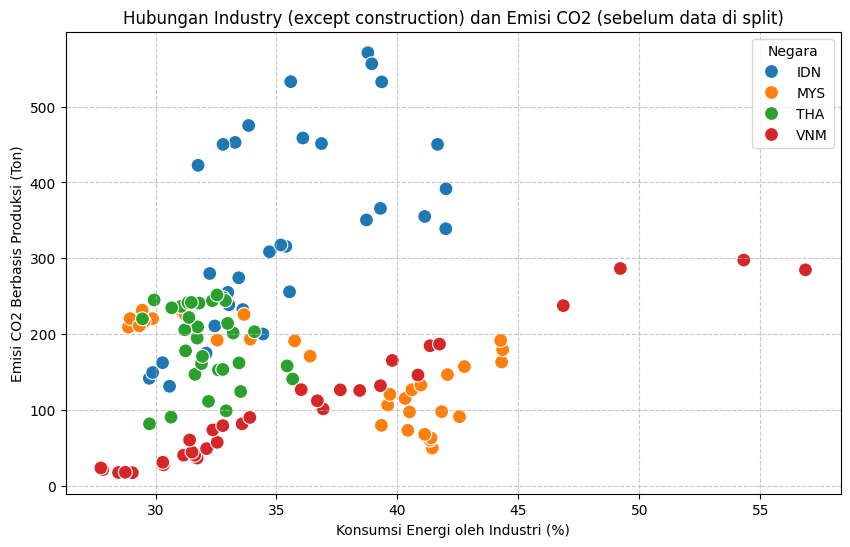

In [ ]:
# Visualisasi Hubungan Industry (except construction) dan Emisi CO2 sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Industry (except construction)', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Industry (except construction) dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Konsumsi Energi oleh Industri (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan korelasi positif yang kuat antara konsumsi energi industri dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi oleh sektor industri, semakin tinggi pula emisi CO2 yang dihasilkan. Hal ini menunjukkan bahwa sektor industri merupakan kontributor utama emisi gas rumah kaca di negara-negara tersebut.

**Analisis per Negara:**

**Indonesia:** Indonesia menunjukkan korelasi yang sangat kuat antara konsumsi energi industri dan emisi CO2. Hal ini mengindikasikan bahwa sebagian besar emisi CO2 di Indonesia berasal dari sektor industri. Selain itu, data Indonesia tersebar cukup luas, menunjukkan variasi yang cukup besar dalam tingkat konsumsi energi industri dan emisi CO2.

**Malaysia:** Malaysia juga menunjukkan korelasi yang kuat antara konsumsi energi industri dan emisi CO2. Namun, jika dibandingkan dengan Indonesia, data Malaysia cenderung lebih terkonsentrasi pada rentang konsumsi energi industri yang lebih tinggi. Ini mungkin mengindikasikan bahwa sektor industri di Malaysia lebih intensif energi dibandingkan dengan Indonesia.

**Thailand:** Thailand menunjukkan korelasi yang kuat antara konsumsi energi industri dan emisi CO2, meskipun tidak sekuat Indonesia dan Malaysia. Hal ini mengindikasikan bahwa sektor industri di Thailand juga memberikan kontribusi signifikan terhadap emisi CO2, namun mungkin dengan tingkat yang lebih rendah.

**Vietnam:** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Meskipun demikian, masih terdapat tren peningkatan emisi CO2 seiring dengan peningkatan konsumsi energi industri.

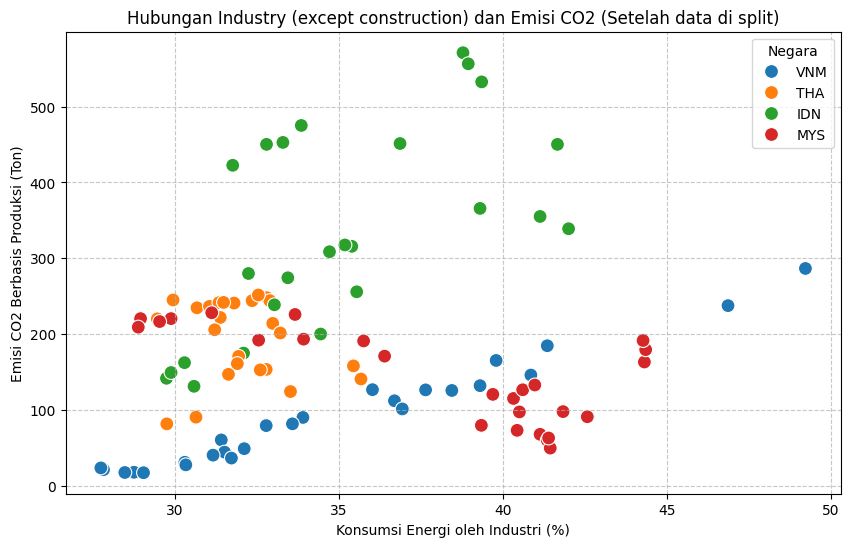

In [ ]:
# Visualisasi Hubungan Industry (except construction) dan Emisi CO2 setelah di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='Industry (except construction)', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan Industry (except construction) dan Emisi CO2 (Setelah data di split)')
plt.xlabel('Konsumsi Energi oleh Industri (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan korelasi positif yang kuat antara konsumsi energi industri dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi oleh sektor industri, semakin tinggi pula emisi CO2 yang dihasilkan. Hal ini menunjukkan bahwa sektor industri merupakan kontributor utama emisi gas rumah kaca di negara-negara tersebut.

**Analisis per Negara:**

**Indonesia:** Indonesia menunjukkan korelasi yang sangat kuat antara konsumsi energi industri dan emisi CO2. Hal ini mengindikasikan bahwa sebagian besar emisi CO2 di Indonesia berasal dari sektor industri. Selain itu, data Indonesia tersebar cukup luas, menunjukkan variasi yang cukup besar dalam tingkat konsumsi energi industri dan emisi CO2.

**Malaysia:** Malaysia juga menunjukkan korelasi yang kuat antara konsumsi energi industri dan emisi CO2. Namun, jika dibandingkan dengan Indonesia, data Malaysia cenderung lebih terkonsentrasi pada rentang konsumsi energi industri yang lebih tinggi. Ini mungkin mengindikasikan bahwa sektor industri di Malaysia lebih intensif energi dibandingkan dengan Indonesia.

**Thailand:** Thailand menunjukkan korelasi yang kuat antara konsumsi energi industri dan emisi CO2, meskipun tidak sekuat Indonesia dan Malaysia. Hal ini mengindikasikan bahwa sektor industri di Thailand juga memberikan kontribusi signifikan terhadap emisi CO2, namun mungkin dengan tingkat yang lebih rendah.

**Vietnam:** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Meskipun demikian, masih terdapat tren peningkatan emisi CO2 seiring dengan peningkatan konsumsi energi industri.

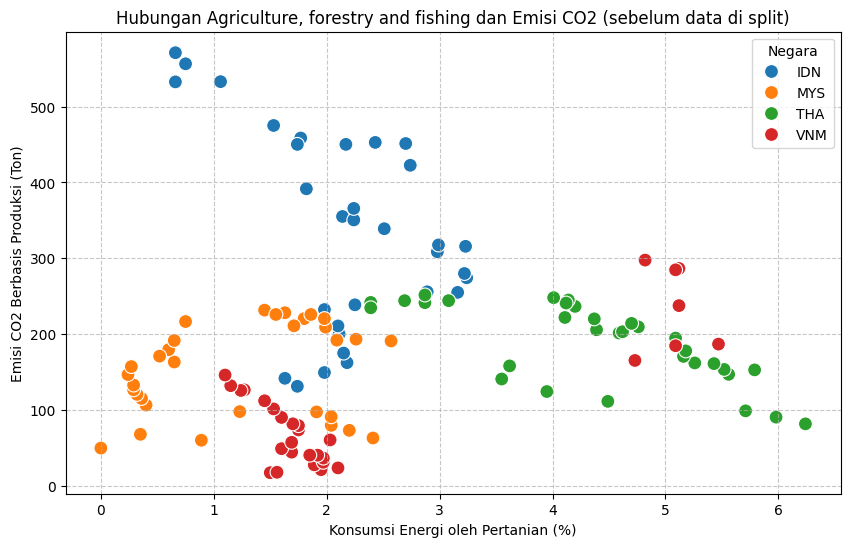

In [ ]:
# Visualisasi Hubungan Agriculture, forestry and fishing dan Emisi CO2 sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Agriculture, forestry and fishing', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Agriculture, forestry and fishing dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Konsumsi Energi oleh Pertanian (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan korelasi positif antara konsumsi energi oleh sektor AFF dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor ini, semakin tinggi pula emisi CO2 yang dihasilkan. Namun, korelasi ini tidak sekuat pada sektor industri.

**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif antara konsumsi energi sektor AFF dan emisi CO2, namun dengan variasi data yang cukup besar. Ini mengindikasikan bahwa sektor AFF di Indonesia berkontribusi pada emisi CO2, namun mungkin tidak sebesar sektor industri.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif, namun dengan tingkat kemiringan yang lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor AFF Malaysia lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor AFF di Thailand juga berkontribusi pada emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor AFF terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain.

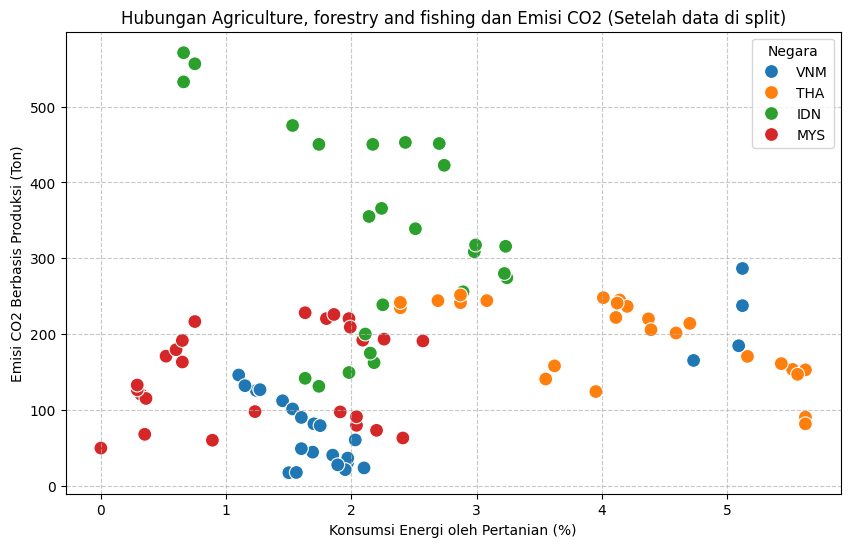

In [ ]:
# Visualisasi Hubungan Agriculture, forestry and fishing dan Emisi CO2 setelah di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='Agriculture, forestry and fishing', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan Agriculture, forestry and fishing dan Emisi CO2 (Setelah data di split)')
plt.xlabel('Konsumsi Energi oleh Pertanian (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan korelasi positif antara konsumsi energi oleh sektor AFF dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor ini, semakin tinggi pula emisi CO2 yang dihasilkan. Namun, korelasi ini tidak sekuat pada sektor industri.

**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif antara konsumsi energi sektor AFF dan emisi CO2, namun dengan variasi data yang cukup besar. Ini mengindikasikan bahwa sektor AFF di Indonesia berkontribusi pada emisi CO2, namun mungkin tidak sebesar sektor industri.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif, namun dengan tingkat kemiringan yang lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor AFF Malaysia lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor AFF di Thailand juga berkontribusi pada emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor AFF terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain.

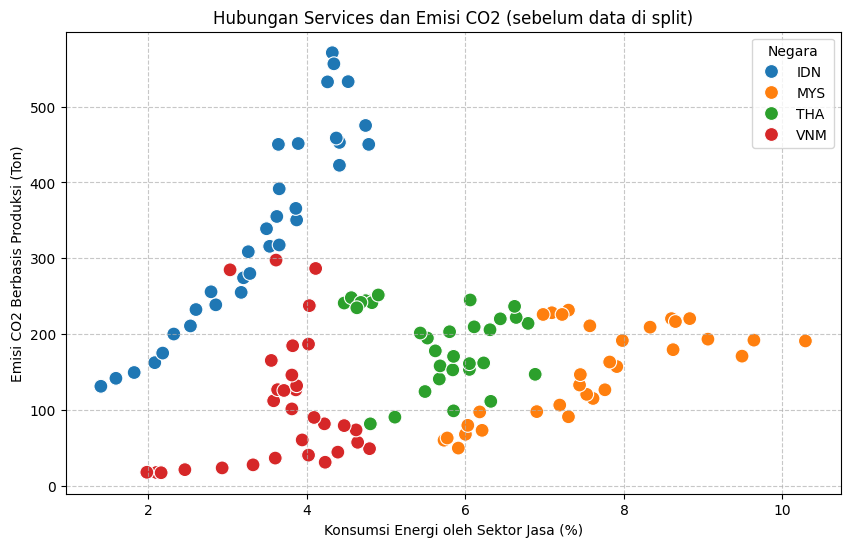

In [ ]:
# Visualisasi Hubungan Services dan Emisi CO2 sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Services', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Services dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Konsumsi Energi oleh Sektor Jasa (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot ini menunjukkan korelasi positif antara konsumsi energi oleh sektor jasa dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor jasa, semakin tinggi pula emisi CO2 yang dihasilkan.

**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif yang moderat antara konsumsi energi sektor jasa dan emisi CO2. Ini mengindikasikan bahwa sektor jasa di Indonesia berkontribusi pada emisi CO2, meskipun mungkin tidak sebesar sektor industri. Variasi data yang cukup besar menunjukkan adanya perbedaan dalam intensitas energi di berbagai sub-sektor jasa di Indonesia.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif, namun dengan tingkat kemiringan yang lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor jasa Malaysia lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor jasa di Thailand juga berkontribusi pada emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor jasa terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain. Hal ini mungkin terkait dengan struktur ekonomi Vietnam yang masih didominasi oleh sektor pertanian dan industri.

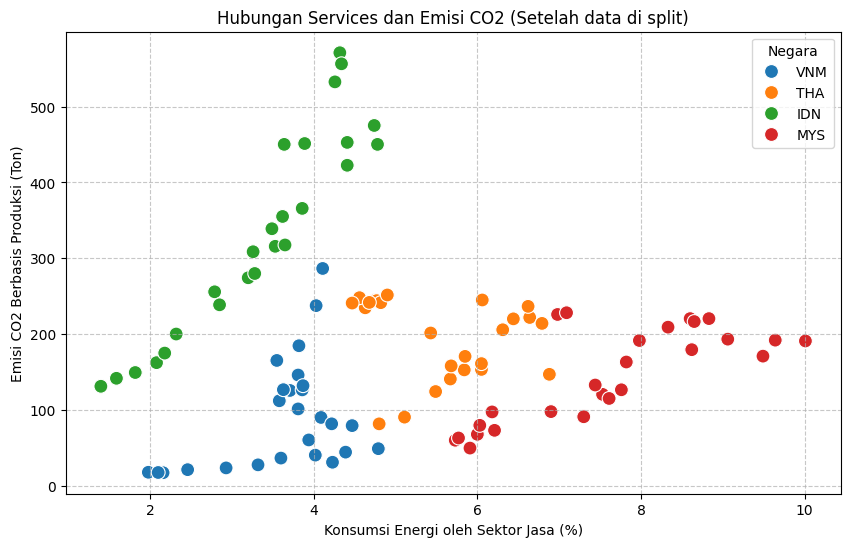

In [ ]:
# Visualisasi Hubungan Services dan Emisi CO2 setelah di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='Services', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan Services dan Emisi CO2 (Setelah data di split)')
plt.xlabel('Konsumsi Energi oleh Sektor Jasa (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot ini menunjukkan korelasi positif antara konsumsi energi oleh sektor jasa dan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor jasa, semakin tinggi pula emisi CO2 yang dihasilkan.

**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif yang moderat antara konsumsi energi sektor jasa dan emisi CO2. Ini mengindikasikan bahwa sektor jasa di Indonesia berkontribusi pada emisi CO2, meskipun mungkin tidak sebesar sektor industri. Variasi data yang cukup besar menunjukkan adanya perbedaan dalam intensitas energi di berbagai sub-sektor jasa di Indonesia.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif, namun dengan tingkat kemiringan yang lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor jasa Malaysia lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor jasa di Thailand juga berkontribusi pada emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor jasa terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain. Hal ini mungkin terkait dengan struktur ekonomi Vietnam yang masih didominasi oleh sektor pertanian dan industri.

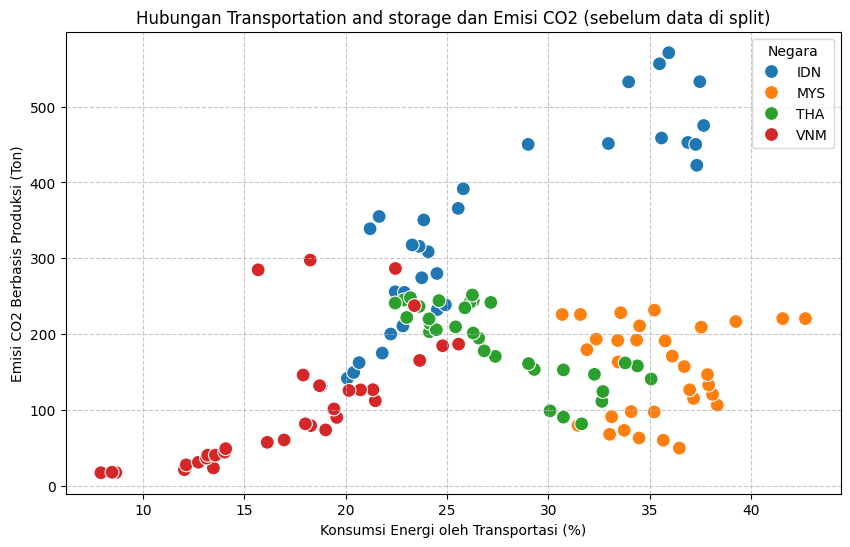

In [ ]:
# Visualisasi Hubungan Transportation and storage dan Emisi CO2 sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Transportation and storage', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Transportation and storage dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Konsumsi Energi oleh Transportasi (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot ini menunjukkan korelasi positif yang kuat antara konsumsi energi oleh sektor transportasi dan penyimpanan dengan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor ini, semakin tinggi pula emisi CO2 yang dihasilkan. Hal ini menunjukkan bahwa sektor transportasi merupakan kontributor utama emisi gas rumah kaca di negara-negara tersebut.


**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif yang sangat kuat antara konsumsi energi sektor transportasi dan penyimpanan dengan emisi CO2. Ini mengindikasikan bahwa sektor transportasi di Indonesia berkontribusi sangat besar terhadap emisi CO2. Variasi data yang cukup besar menunjukkan adanya perbedaan dalam intensitas energi di berbagai moda transportasi di Indonesia.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif yang kuat, namun dengan tingkat kemiringan yang sedikit lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor transportasi Malaysia sedikit lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor transportasi di Thailand juga berkontribusi signifikan terhadap emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi positif yang lebih lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor transportasi terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain. Hal ini mungkin terkait dengan tingkat urbanisasi dan kepemilikan kendaraan pribadi yang lebih rendah di Vietnam.

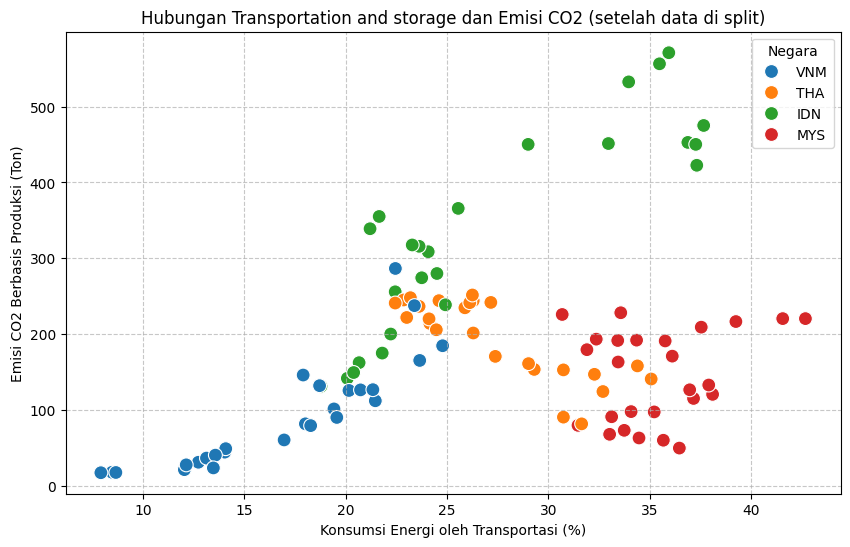

In [ ]:
# Visualisasi Hubungan Transportasi dan Emisi CO2 sesudah di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_encoded, x='Transportation and storage', y=y_train, hue=X_train['Country'], s=100)
plt.title('Hubungan Transportation and storage dan Emisi CO2 (setelah data di split)')
plt.xlabel('Konsumsi Energi oleh Transportasi (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot ini menunjukkan korelasi positif yang kuat antara konsumsi energi oleh sektor transportasi dan penyimpanan dengan emisi CO2 di keempat negara. Artinya, semakin tinggi konsumsi energi dalam sektor ini, semakin tinggi pula emisi CO2 yang dihasilkan. Hal ini menunjukkan bahwa sektor transportasi merupakan kontributor utama emisi gas rumah kaca di negara-negara tersebut.


**Analisis per Negara:**

**Indonesia (IDN):** Indonesia menunjukkan korelasi positif yang sangat kuat antara konsumsi energi sektor transportasi dan penyimpanan dengan emisi CO2. Ini mengindikasikan bahwa sektor transportasi di Indonesia berkontribusi sangat besar terhadap emisi CO2. Variasi data yang cukup besar menunjukkan adanya perbedaan dalam intensitas energi di berbagai moda transportasi di Indonesia.

**Malaysia (MYS):** Malaysia juga menunjukkan korelasi positif yang kuat, namun dengan tingkat kemiringan yang sedikit lebih rendah dibandingkan Indonesia. Ini bisa berarti bahwa efisiensi energi di sektor transportasi Malaysia sedikit lebih baik, atau sumber energi yang digunakan lebih ramah lingkungan.

**Thailand (THA):** Thailand menunjukkan pola yang serupa dengan Malaysia, yaitu korelasi positif namun dengan tingkat kemiringan yang lebih rendah. Ini menunjukkan bahwa sektor transportasi di Thailand juga berkontribusi signifikan terhadap emisi CO2, namun dengan tingkat yang lebih rendah dibandingkan dengan Indonesia.

**Vietnam (VNM):** Vietnam menunjukkan korelasi positif yang lebih lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi sektor transportasi terhadap emisi CO2 di Vietnam relatif lebih kecil dibandingkan dengan negara-negara lain. Hal ini mungkin terkait dengan tingkat urbanisasi dan kepemilikan kendaraan pribadi yang lebih rendah di Vietnam.

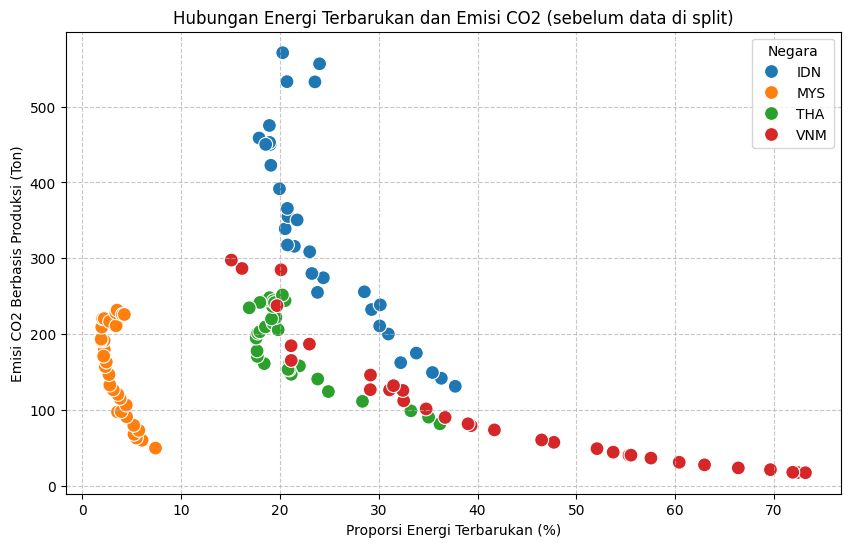

In [ ]:
# Visualisasi Hubungan RE_TPES dengan CO2_PBEM sebelum data di split
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Energi Terbarukan dan Emisi CO2 (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Ini menunjukkan adanya korelasi negatif antara penggunaan energi terbarukan dan emisi CO2. Artinya, semakin tinggi proporsi energi terbarukan yang digunakan, semakin rendah emisi CO2 yang dihasilkan.

**Indonesia:** Indonesia menunjukkan korelasi negatif yang cukup kuat antara proporsi energi terbarukan dan emisi CO2. Ini mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Indonesia efektif dalam mengurangi emisi CO2.

**Malaysia:** Malaysia juga menunjukkan korelasi negatif yang cukup kuat antara proporsi energi terbarukan dan emisi CO2. Data Malaysia cenderung lebih terkonsentrasi pada rentang proporsi energi terbarukan tertentu, mengindikasikan adanya kebijakan atau strategi yang lebih terfokus dalam pemanfaatan energi terbarukan.

**Thailand:** Thailand menunjukkan korelasi negatif yang moderat. Ini mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Thailand juga berkontribusi pada penurunan emisi CO2.

**Vietnam:** Vietnam menunjukkan korelasi negatif yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi energi terbarukan dalam mengurangi emisi CO2 di Vietnam masih relatif kecil.

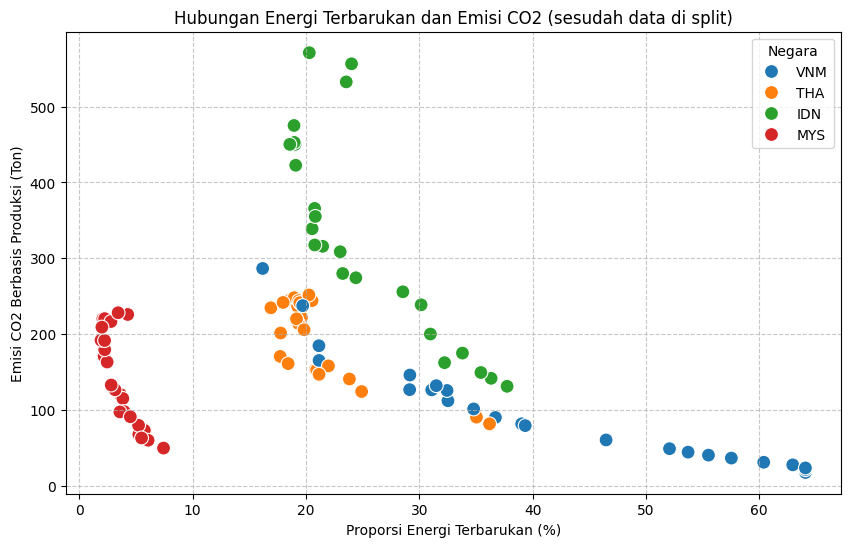

In [ ]:
# Visualisasi Hubungan RE_TPES dengan CO2_PBEM sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column (if not already present)
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot, temporarily adding 'CO2_PBEM' for plotting
sns.scatterplot(data=X_train_encoded.assign(CO2_PBEM=y_train), x='RE_TPES', y='CO2_PBEM', hue='Country',  s=100)
plt.title('Hubungan Energi Terbarukan dan Emisi CO2 (sesudah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot menunjukkan tren penurunan emisi CO2 seiring dengan peningkatan proporsi energi terbarukan. Ini menunjukkan adanya korelasi negatif antara penggunaan energi terbarukan dan emisi CO2. Artinya, semakin tinggi proporsi energi terbarukan yang digunakan, semakin rendah emisi CO2 yang dihasilkan.

**Indonesia:** Indonesia menunjukkan korelasi negatif yang cukup kuat antara proporsi energi terbarukan dan emisi CO2. Ini mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Indonesia efektif dalam mengurangi emisi CO2.

**Malaysia:** Malaysia juga menunjukkan korelasi negatif yang cukup kuat antara proporsi energi terbarukan dan emisi CO2. Data Malaysia cenderung lebih terkonsentrasi pada rentang proporsi energi terbarukan tertentu, mengindikasikan adanya kebijakan atau strategi yang lebih terfokus dalam pemanfaatan energi terbarukan.

**Thailand:** Thailand menunjukkan korelasi negatif yang moderat. Ini mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Thailand juga berkontribusi pada penurunan emisi CO2.

**Vietnam:** Vietnam menunjukkan korelasi negatif yang paling lemah di antara keempat negara. Ini bisa mengindikasikan bahwa kontribusi energi terbarukan dalam mengurangi emisi CO2 di Vietnam masih relatif kecil.

##Scatterplot RE_TPES (Features Importance)

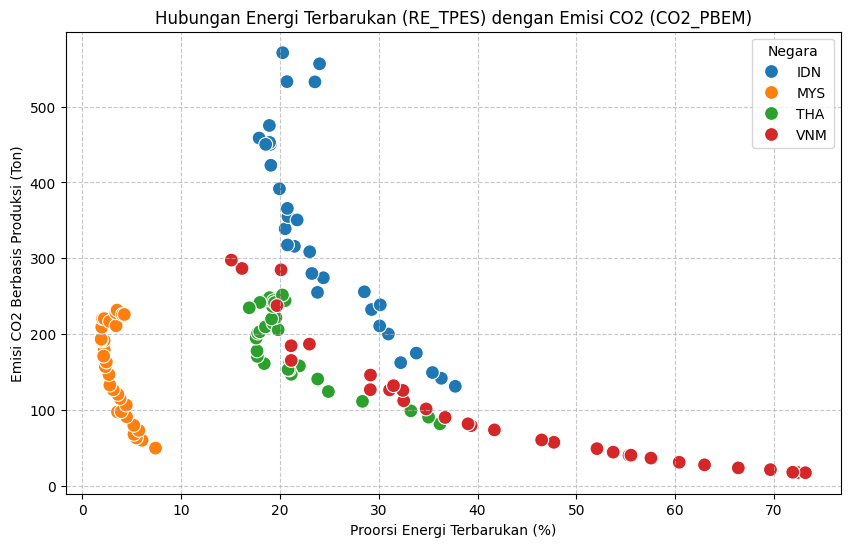

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='CO2_PBEM', hue='Country', s=100)
plt.title('Hubungan Energi Terbarukan (RE_TPES) dengan Emisi CO2 (CO2_PBEM)')
plt.xlabel('Proorsi Energi Terbarukan (%)')
plt.ylabel('Emisi CO2 Berbasis Produksi (Ton)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik Scatterplot ini menunjukkan korelasi negatif yang kuat antara proporsi energi terbarukan dan emisi CO2. Artinya, semakin tinggi proporsi energi terbarukan yang digunakan suatu negara, semakin rendah tingkat emisi CO2-nya.
 - **Indonesia:** Indonesia menunjukkan korelasi negatif yang kuat, mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Indonesia berkontribusi signifikan dalam mengurangi emisi CO2.

- **Malaysia:** Malaysia juga menunjukkan korelasi negatif yang kuat, menunjukkan bahwa upaya pengembangan energi terbarukan di Malaysia memberikan hasil yang positif dalam mengurangi emisi.

- **Thailand:** Thailand menunjukkan korelasi negatif yang moderat, mengindikasikan bahwa peningkatan penggunaan energi terbarukan di Thailand juga berkontribusi pada penurunan emisi CO2, namun mungkin dengan tingkat yang lebih rendah dibandingkan dengan Indonesia dan Malaysia.

- **Vietnam:** Vietnam menunjukkan korelasi negatif yang paling lemah di antara keempat negara, mengindikasikan bahwa kontribusi energi terbarukan dalam mengurangi emisi CO2 di Vietnam masih relatif kecil.

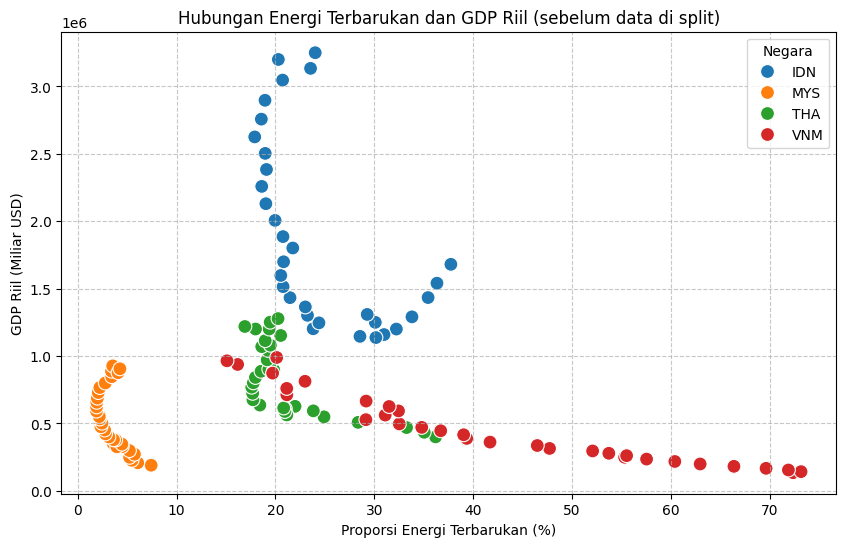

In [ ]:
# Visualisasi Hubungan RE_TPES dengan GDP Rill sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='GDP_R', hue='Country',  s=100)
plt.title('Hubungan Energi Terbarukan dan GDP Riil (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('GDP Riil (Miliar USD)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot ini tidak adanya korelasi yang jelas dan kuat antara peningkatan proporsi energi terbarukan dan pertumbuhan PDB riil. Ini berarti bahwa peningkatan penggunaan energi terbarukan tidak selalu berbanding lurus dengan pertumbuhan ekonomi.

**Indonesia:** Data Indonesia menunjukkan variasi yang cukup besar tanpa pola jelas antara proporsi energi terbarukan dan PDB riil. Ini mengindikasikan bahwa faktor lain, seperti investasi, infrastruktur, dan kebijakan pemerintah, memiliki pengaruh yang lebih besar terhadap pertumbuhan ekonomi di Indonesia dibandingkan dengan sekadar peningkatan penggunaan energi terbarukan.

**Malaysia:** Malaysia menunjukkan tidak ada hubungan signifikan antara proporsi penggunaan energi terbarukan dan pertumbuhan PDB riil. Data terkonsentrasi pada area dengan proporsi energi terbarukan rendah dan pertumbuhan PDB stabil, mengindikasikan bahwa peningkatan penggunaan energi terbarukan belum berdampak signifikan pada pertumbuhan ekonomi. Faktor-faktor seperti dominasi sektor ekonomi lain, rendahnya energi terbarukan, dan pengaruh faktor ekonomi lainnya mungkin berperan.

**Thailand:** Thailand menunjukkan pola yang sedikit berbeda, dengan proporsi energi terbarukan yang cukup tinggi dan pertumbuhan ekonomi yang stabil. Meskipun demikian, hubungan antara kedua variabel ini tetap tidak terlalu kuat, menunjukkan bahwa faktor-faktor seperti kebijakan industri dan investasi juga berperan penting.

**Vietnam:** Vietnam memiliki proporsi energi terbarukan yang relatif rendah dan PDB riil yang juga lebih rendah. Ini mungkin disebabkan oleh tingkat industrialisasi yang masih rendah dan ketergantungan pada sektor pertanian, yang menghambat pertumbuhan ekonomi dan penggunaan energi terbarukan.

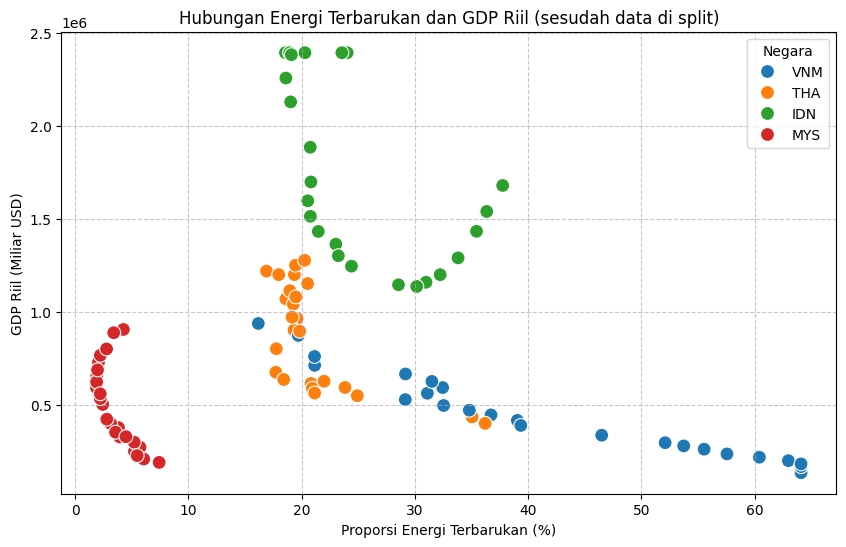

In [ ]:
# Visualisasi Hubungan RE_TPES dengan GDP Rill sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y='GDP_R', hue='Country', s=100)
plt.title('Hubungan Energi Terbarukan dan GDP Riil (sesudah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('GDP Riil (Miliar USD)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik scatterplot ini menggambarkan hubungan antara proporsi penggunaan energi terbarukan (dalam persentase dari total konsumsi energi) dengan Produk Domestik Bruto (PDB) riil dari empat negara: Thailand, Malaysia, Indonesia, dan Vietnam. Setiap titik pada grafik mewakili satu pengamatan atau data poin yang menunjukkan kombinasi antara persentase penggunaan energi terbarukan dan nilai PDB pada suatu waktu tertentu untuk negara yang bersangkutan.

**Vietnam**: Vietnam memiliki data yang cenderung terkonsentrasi di bagian bawah grafik, menunjukkan tingkat PDB riil yang lebih rendah dibandingkan negara-negara lain. Meskipun demikian, tidak terlihat adanya korelasi yang jelas antara proporsi energi terbarukan dan PDB riil.

**Thailand**: Titik-titik data untuk Thailand cenderung membentuk pola yang naik ke kanan. Ini menunjukkan adanya korelasi positif antara proporsi penggunaan energi terbarukan dan PDB riil di Thailand. Artinya, semakin tinggi proporsi penggunaan energi terbarukan, semakin tinggi pula PDB riilnya. Investasi dalam energi terbarukan di Thailand telah memberikan kontribusi positif terhadap pertumbuhan ekonomi negara tersebut.

**Indonesia:** Data Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan PDB riil. Ini mengindikasikan bahwa faktor lain selain energi terbarukan, seperti investasi, kebijakan pemerintah, dan kondisi ekonomi global, memiliki pengaruh yang lebih besar terhadap pertumbuhan ekonomi Indonesia.

**Malaysia:** Sebagian besar data poin untuk Malaysia menunjukkan korelasi negatif. Ini berarti bahwa semakin tinggi proporsi penggunaan energi terbarukan, semakin rendah PDB riilnya. Mungkin disebabkan oleh beberapa faktor, seperti fokus Malaysia pada sektor industri yang intensif energi konvensional, keterbatasan infrastruktur untuk mendukung pengembangan energi terbarukan, atau fluktuasi harga energi yang mempengaruhi keputusan investasi.

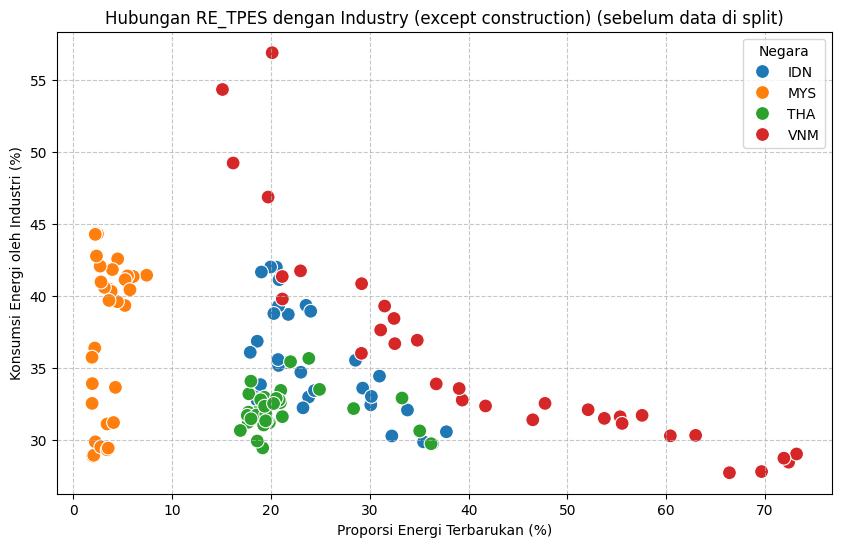

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Industry (except construction) sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='Industry (except construction)', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Industry (except construction) (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Industri (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Berdasarkan grafik scatterplot tidak menunjukkan korelasi yang kuat antara proporsi energi terbarukan dan konsumsi energi industri untuk keempat negara yang dianalisis. Ini mengindikasikan bahwa faktor-faktor lain, seperti struktur industri, efisiensi energi, dan kebijakan pemerintah, memiliki pengaruh yang lebih besar terhadap konsumsi energi industri.

**Indonesia**: Data Indonesia menunjukkan variasi yang cukup besar, tanpa adanya pola yang jelas antara proporsi energi terbarukan dan konsumsi energi industri. Hal ini mengindikasikan bahwa faktor lain seperti struktur industri, efisiensi energi, dan kebijakan pemerintah memiliki pengaruh yang lebih besar terhadap konsumsi energi industri di Indonesia.  

**Malaysia**: Malaysia memiliki tingkat konsumsi energi industri yang relatif tinggi dibandingkan dengan negara lain dalam sampel. Terdapat fluktuasi yang cukup signifikan dalam konsumsi energi industri di Malaysia, meskipun tidak terlihat adanya korelasi yang jelas dengan proporsi energi terbarukan.  

**Thailand**: Thailand cenderung memiliki tingkat konsumsi energi industri yang lebih stabil dibandingkan dengan negara lain. Terdapat sedikit indikasi korelasi negatif antara proporsi energi terbarukan dan konsumsi energi industri di Thailand. Ini mungkin menunjukkan bahwa peningkatan penggunaan energi terbarukan di Thailand tidak secara signifikan mengurangi konsumsi energi industri.   

**Vietnam**: Vietnam cenderung memiliki tingkat konsumsi energi industri yang lebih rendah dibandingkan dengan negara lain. Terdapat sedikit indikasi korelasi negatif antara proporsi energi terbarukan dan konsumsi energi industri di Vietnam.

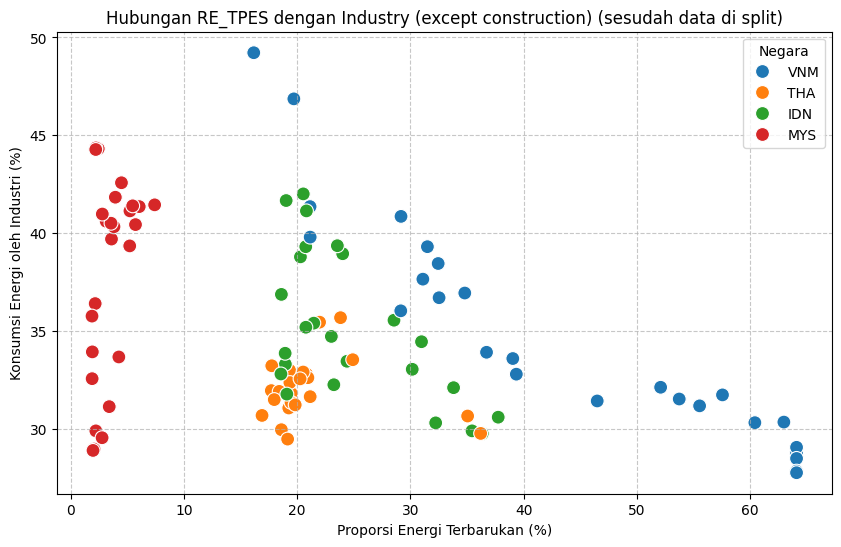

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Industry (except construction) sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y='Industry (except construction)', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Industry (except construction) (sesudah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Industri (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Berdasarkan grafik scatterplot tidak menunjukkan korelasi yang kuat antara proporsi energi terbarukan dan konsumsi energi industri untuk keempat negara yang dianalisis. Ini mengindikasikan bahwa faktor-faktor lain, seperti struktur industri, efisiensi energi, dan kebijakan pemerintah, memiliki pengaruh yang lebih besar terhadap konsumsi energi industri.

**Indonesia**: Data Indonesia menunjukkan variasi yang cukup besar, tanpa adanya pola yang jelas antara proporsi energi terbarukan dan konsumsi energi industri. Hal ini mengindikasikan bahwa faktor lain seperti struktur industri, efisiensi energi, dan kebijakan pemerintah memiliki pengaruh yang lebih besar terhadap konsumsi energi industri di Indonesia.  

**Malaysia**: Malaysia memiliki tingkat konsumsi energi industri yang relatif tinggi dibandingkan dengan negara lain dalam sampel. Terdapat fluktuasi yang cukup signifikan dalam konsumsi energi industri di Malaysia, meskipun tidak terlihat adanya korelasi yang jelas dengan proporsi energi terbarukan.  

**Thailand**: Thailand cenderung memiliki tingkat konsumsi energi industri yang lebih stabil dibandingkan dengan negara lain. Terdapat sedikit indikasi korelasi negatif antara proporsi energi terbarukan dan konsumsi energi industri di Thailand. Ini mungkin menunjukkan bahwa peningkatan penggunaan energi terbarukan di Thailand tidak secara signifikan mengurangi konsumsi energi industri.   

**Vietnam**: Vietnam cenderung memiliki tingkat konsumsi energi industri yang lebih rendah dibandingkan dengan negara lain. Terdapat sedikit indikasi korelasi negatif antara proporsi energi terbarukan dan konsumsi energi industri di Vietnam.

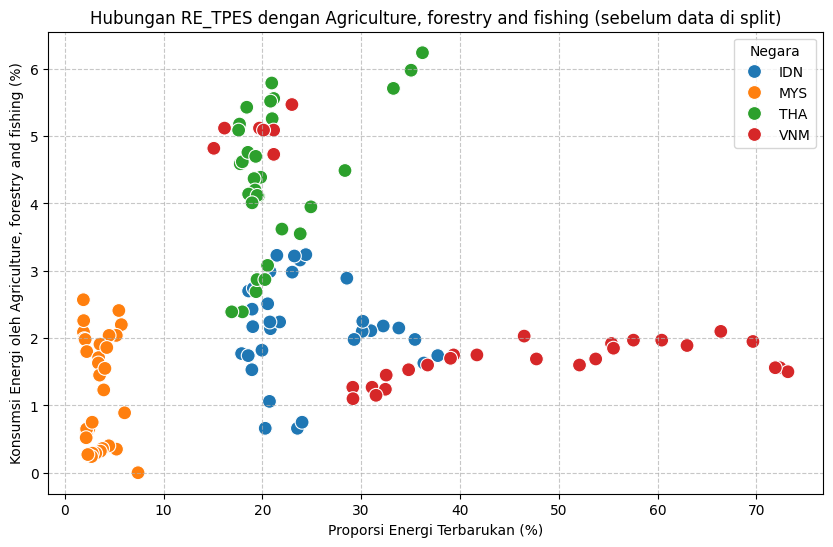

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Agriculture, forestry and fishing sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='Agriculture, forestry and fishing', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Agriculture, forestry and fishing (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Agriculture, forestry and fishing (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik ini menunjukkan bahwa hubungan antara proporsi energi terbarukan dan konsumsi energi di sektor pertanian, kehutanan, dan perikanan sangat kompleks dan dipengaruhi oleh berbagai faktor. Peningkatan penggunaan energi terbarukan di sektor ini memiliki potensi besar untuk meningkatkan keberlanjutan dan mengurangi emisi CO2.

**Indonesia:** Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor pertanian, kehutanan, dan perikanan. Sektor pertanian di Indonesia seringkali masih bergantung pada energi tradisional seperti kayu bakar, sehingga konsumsi energi terbarukan relatif rendah.

**Malaysia:** Malaysia cenderung memiliki konsumsi energi sektor pertanian, kehutanan, dan perikanan yang lebih rendah dibandingkan negara lain. Hal ini mungkin terkait dengan penggunaan teknologi pertanian yang lebih modern dan efisien.

**Thailand:** Thailand menunjukkan pola yang sedikit berbeda. Negara ini memiliki proporsi energi terbarukan yang cukup tinggi dan juga memiliki konsumsi energi di sektor pertanian, kehutanan, dan perikanan yang relatif stabil. Namun, hubungan antara kedua variabel ini tidak terlalu kuat. Thailand mungkin telah mengadopsi beberapa praktik pertanian berkelanjutan yang melibatkan penggunaan energi terbarukan.


**Vietnam:** Vietnam memiliki proporsi energi terbarukan yang relatif rendah dibandingkan dengan negara lain, dan konsumsi energi di sektor pertanian, kehutanan, dan perikanan juga lebih rendah. Hal ini mungkin mencerminkan dominasi pertanian subsisten yang lebih banyak mengandalkan tenaga kerja manusia daripada mekanisasi.

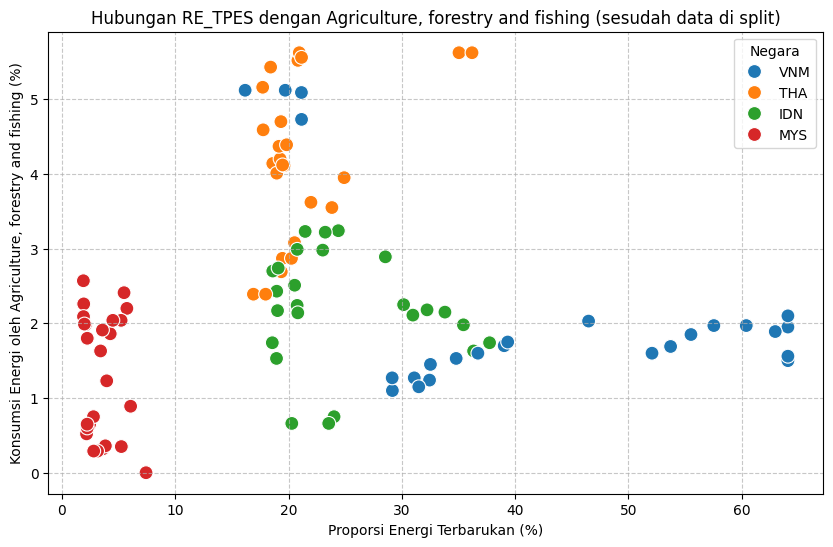

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Agriculture, forestry and fishing sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y='Agriculture, forestry and fishing', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Agriculture, forestry and fishing (sesudah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Agriculture, forestry and fishing (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik ini menunjukkan bahwa hubungan antara proporsi energi terbarukan dan konsumsi energi di sektor pertanian, kehutanan, dan perikanan sangat kompleks dan dipengaruhi oleh berbagai faktor. Peningkatan penggunaan energi terbarukan di sektor ini memiliki potensi besar untuk meningkatkan keberlanjutan dan mengurangi emisi CO2.

**Indonesia:** Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor pertanian, kehutanan, dan perikanan. Sektor pertanian di Indonesia seringkali masih bergantung pada energi tradisional seperti kayu bakar, sehingga konsumsi energi terbarukan relatif rendah.

**Malaysia:** Malaysia cenderung memiliki konsumsi energi sektor pertanian, kehutanan, dan perikanan yang lebih rendah dibandingkan negara lain. Hal ini mungkin terkait dengan penggunaan teknologi pertanian yang lebih modern dan efisien.

**Thailand:** Thailand menunjukkan pola yang sedikit berbeda. Negara ini memiliki proporsi energi terbarukan yang cukup tinggi dan juga memiliki konsumsi energi di sektor pertanian, kehutanan, dan perikanan yang relatif stabil. Namun, hubungan antara kedua variabel ini tidak terlalu kuat. Thailand mungkin telah mengadopsi beberapa praktik pertanian berkelanjutan yang melibatkan penggunaan energi terbarukan.


**Vietnam:** Vietnam memiliki proporsi energi terbarukan yang relatif rendah dibandingkan dengan negara lain, dan konsumsi energi di sektor pertanian, kehutanan, dan perikanan juga lebih rendah. Hal ini mungkin mencerminkan dominasi pertanian subsisten yang lebih banyak mengandalkan tenaga kerja manusia daripada mekanisasi.

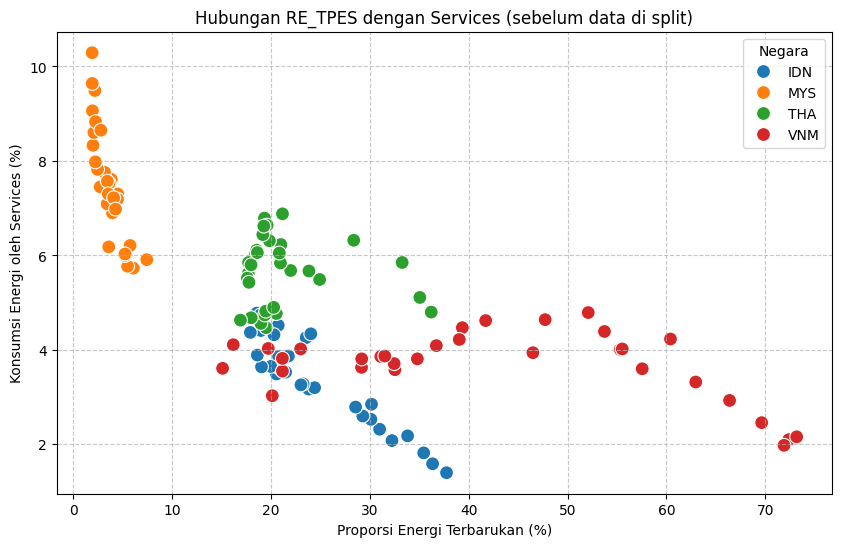

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Services sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='Services', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Services (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Services (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik ini menunjukkan bahwa hubungan antara proporsi energi terbarukan dan konsumsi energi di sektor jasa sangat kompleks dan dipengaruhi oleh berbagai faktor. Peningkatan penggunaan energi terbarukan di sektor jasa memiliki potensi besar untuk mengurangi emisi CO2 dan meningkatkan keberlanjutan lingkungan.

**Indonesia**: Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor jasa. Sektor jasa di Indonesia memiliki potensi besar untuk mengadopsi energi terbarukan, terutama untuk bangunan komersial dan perkantoran.

**Malaysia:** Malaysia cenderung memiliki konsumsi energi sektor jasa yang lebih tinggi dibandingkan negara lain. Hal ini mungkin terkait dengan perkembangan sektor jasa modern seperti keuangan, teknologi informasi, dan pariwisata.

**Thailand:**  Thailand menunjukkan tingkat konsumsi energi sektor jasa yang relatif stabil. Sektor pariwisata yang berkembang di Thailand mungkin berkontribusi pada konsumsi energi di sektor jasa.

**Vietnam:** Vietnam memiliki tingkat konsumsi energi sektor jasa yang paling rendah di antara keempat negara. Namun, dengan pertumbuhan ekonomi yang pesat, konsumsi energi sektor jasa di Vietnam diperkirakan akan meningkat.

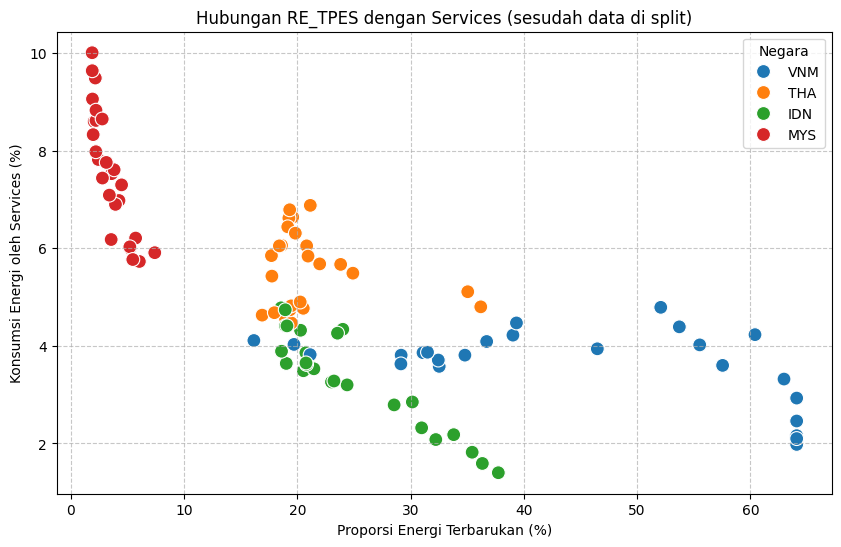

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Services sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y='Services', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Services (sesudah data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Services (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik ini menunjukkan bahwa hubungan antara proporsi energi terbarukan dan konsumsi energi di sektor jasa sangat kompleks dan dipengaruhi oleh berbagai faktor. Peningkatan penggunaan energi terbarukan di sektor jasa memiliki potensi besar untuk mengurangi emisi CO2 dan meningkatkan keberlanjutan lingkungan.

**Indonesia**: Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor jasa. Sektor jasa di Indonesia memiliki potensi besar untuk mengadopsi energi terbarukan, terutama untuk bangunan komersial dan perkantoran.

**Malaysia:** Malaysia cenderung memiliki konsumsi energi sektor jasa yang lebih tinggi dibandingkan negara lain. Hal ini mungkin terkait dengan perkembangan sektor jasa modern seperti keuangan, teknologi informasi, dan pariwisata.

**Thailand:**  Thailand menunjukkan tingkat konsumsi energi sektor jasa yang relatif stabil. Sektor pariwisata yang berkembang di Thailand mungkin berkontribusi pada konsumsi energi di sektor jasa.

**Vietnam:** Vietnam memiliki tingkat konsumsi energi sektor jasa yang paling rendah di antara keempat negara. Namun, dengan pertumbuhan ekonomi yang pesat, konsumsi energi sektor jasa di Vietnam diperkirakan akan meningkat.

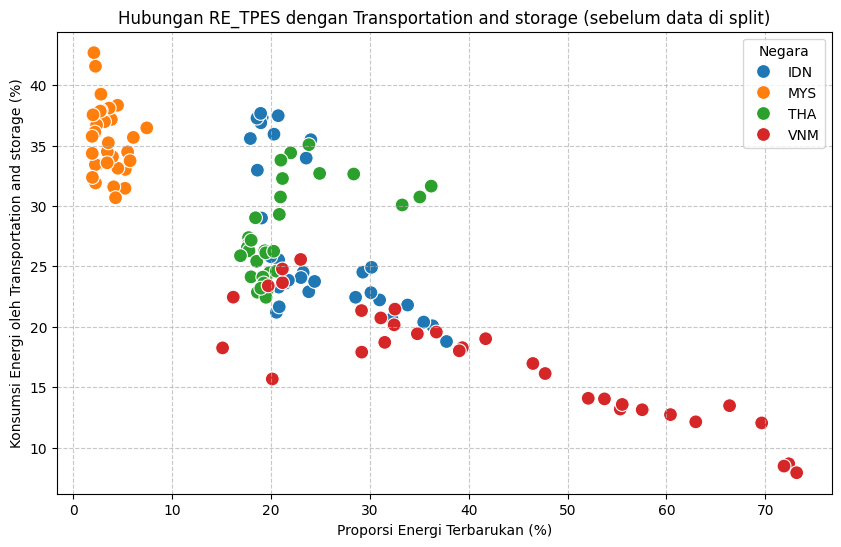

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Transportation and storage sebelum di split data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RE_TPES', y='Transportation and storage', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Transportation and storage (sebelum data di split)')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Transportation and storage (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik menunjukkan variasi yang signifikan dalam penggunaan energi terbarukan di sektor transportasi antar negara, mencerminkan perbedaan kebijakan energi dan struktur ekonomi masing-masing.

**Indonesia (Biru):** Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor transportasi. Sektor transportasi darat, terutama kendaraan bermotor pribadi, kemungkinan besar mendominasi konsumsi energi di Indonesia.

**Malaysia (Kuning):** DMalaysia cenderung memiliki konsumsi energi sektor transportasi yang lebih tinggi dibandingkan negara lain. ektor transportasi di Malaysia masih sangat bergantung pada minyak bumi.

**Thailand (Hijau):** Thailand menunjukkan tingkat konsumsi energi sektor transportasi yang relatif stabil. Sektor pariwisata yang berkembang di Thailand mungkin berkontribusi pada konsumsi energi di sektor transportasi.

**Vietnam (Merah):** Vietnam memiliki tingkat konsumsi energi sektor transportasi yang paling rendah di antara keempat negara. Namun, dengan pertumbuhan ekonomi yang pesat, konsumsi energi sektor transportasi di Vietnam diperkirakan akan meningkat. Penggunaan sepeda motor yang tinggi di Vietnam menjadi salah satu faktor yang mempengaruhi konsumsi energi sektor transportasi.

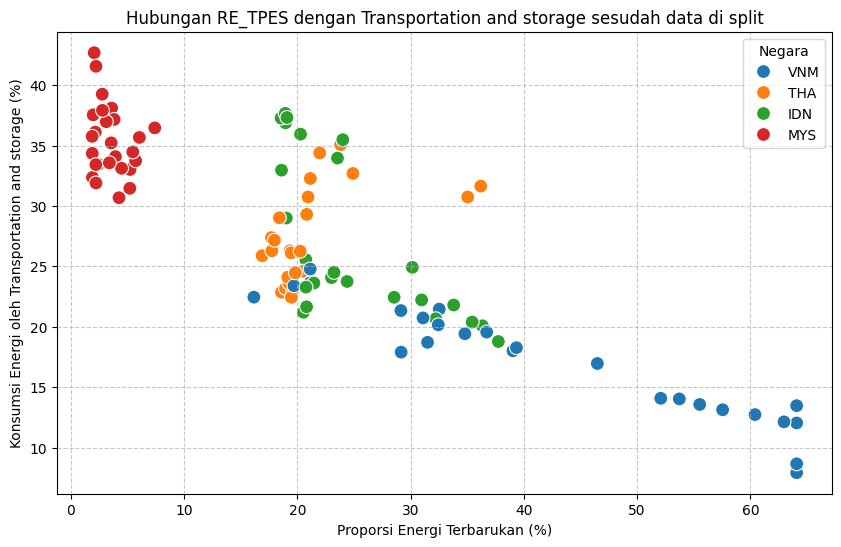

In [ ]:
# Visualisasi Hubungan RE_TPES dengan Transportation and storage sesudah data di split
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the scatter plot
sns.scatterplot(data=X_train_encoded, x='RE_TPES', y='Transportation and storage', hue='Country', s=100)
plt.title('Hubungan RE_TPES dengan Transportation and storage sesudah data di split')
plt.xlabel('Proporsi Energi Terbarukan (%)')
plt.ylabel('Konsumsi Energi oleh Transportation and storage (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik menunjukkan variasi yang signifikan dalam penggunaan energi terbarukan di sektor transportasi antar negara, mencerminkan perbedaan kebijakan energi dan struktur ekonomi masing-masing.

**Indonesia (Biru):** Data untuk Indonesia tersebar cukup luas, menunjukkan variasi yang besar antara proporsi energi terbarukan dan konsumsi energi sektor transportasi. Sektor transportasi darat, terutama kendaraan bermotor pribadi, kemungkinan besar mendominasi konsumsi energi di Indonesia.

**Malaysia (Kuning):** DMalaysia cenderung memiliki konsumsi energi sektor transportasi yang lebih tinggi dibandingkan negara lain. ektor transportasi di Malaysia masih sangat bergantung pada minyak bumi.

**Thailand (Hijau):** Thailand menunjukkan tingkat konsumsi energi sektor transportasi yang relatif stabil. Sektor pariwisata yang berkembang di Thailand mungkin berkontribusi pada konsumsi energi di sektor transportasi.

**Vietnam (Merah):** Vietnam memiliki tingkat konsumsi energi sektor transportasi yang paling rendah di antara keempat negara. Namun, dengan pertumbuhan ekonomi yang pesat, konsumsi energi sektor transportasi di Vietnam diperkirakan akan meningkat. Penggunaan sepeda motor yang tinggi di Vietnam menjadi salah satu faktor yang mempengaruhi konsumsi energi sektor transportasi.

##Scatterplot GDP_R (Features Importance)

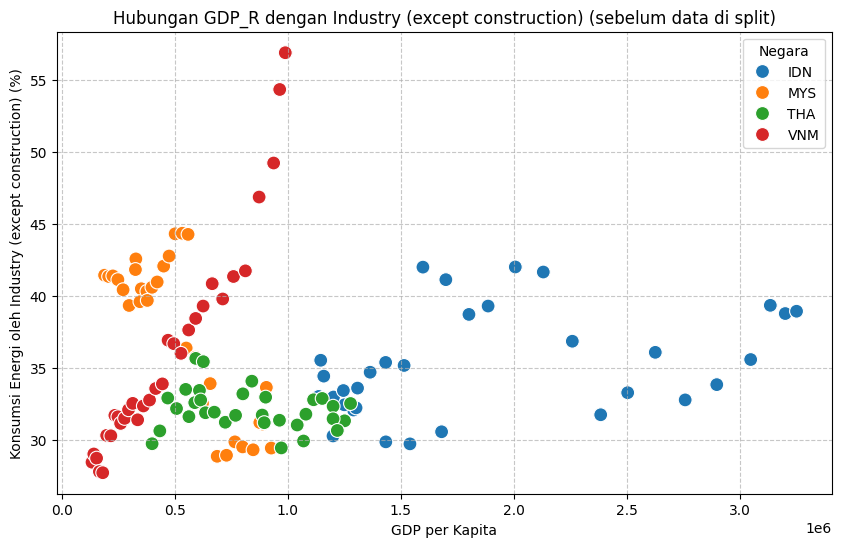

In [ ]:
# Scatterplot GDP_R dengan Industry (except construction)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='Industry (except construction)', hue='Country', s=100)
plt.title('Hubungan GDP_R dengan Industry (except construction) (sebelum data di split)')
plt.xlabel('GDP per Kapita')
plt.ylabel('Konsumsi Energi oleh Industry (except construction) (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik Scatterplot ini menggambarkan hubungan antara GDP per kapita (GDP_R) dan konsumsi energi oleh sektor industri (kecuali konstruksi) di empat negara: Indonesia, Malaysia, Thailand, dan Vietnam. Secara umum, grafik menunjukkan variasi dalam konsumsi energi oleh industri pada tingkat GDP per kapita yang berbeda. Hal ini memberikan gambaran tentang efisiensi energi di sektor industri masing-masing negara.
- **Indonesia**:
Grafik menunjukkan bahwa Indonesia memiliki GDP per kapita tertinggi dibandingkan negara lain dalam grafik ini, yaitu mulai dari 1 juta hingga lebih dari 3 juta. Konsumsi energi oleh sektor industri berada pada kisaran 30-40% dan relatif stabil meskipun GDP meningkat. Hal ini menunjukkan efisiensi yang baik dalam penggunaan energi di sektor industri Indonesia atau tingkat pertumbuhan sektor industri yang tidak terlalu signifikan.

- **Malaysia**:
Malaysia memiliki GDP per kapita yang berkisar antara 0,5 juta hingga 1,5 juta dengan konsumsi energi industri sekitar 30-40%. Hubungan antara GDP per kapita dan konsumsi energi terlihat stabil, yang mengindikasikan efisiensi energi yang cukup baik di sektor industri Malaysia.

- **Thailand**:
Data menunjukkan bahwa Thailand memiliki GDP per kapita yang lebih rendah dibandingkan Indonesia dan Malaysia, yakni di bawah 0,5 juta. Namun, konsumsi energi industri tetap berada pada kisaran 30-40%, serupa dengan Malaysia. Ini menunjukkan bahwa sektor industri Thailand membutuhkan perhatian terhadap efisiensi energi seiring dengan potensi peningkatan GDP.

- **Vietnam**:
Vietnam memiliki GDP per kapita yang rendah (kurang dari 1 juta) tetapi konsumsi energi oleh sektor industrinya cukup tinggi, bervariasi dari 30% hingga lebih dari 50%. Hal ini menunjukkan bahwa sektor industri di Vietnam masih bergantung pada energi secara intensif, yang mengindikasikan perlunya upaya peningkatan efisiensi energi di sektor ini.

Kesimpulannya, grafik ini mencerminkan bahwa negara-negara dengan GDP per kapita yang lebih tinggi cenderung memiliki konsumsi energi industri yang lebih stabil, seperti Indonesia dan Malaysia, sementara negara dengan GDP per kapita lebih rendah, seperti Vietnam, menunjukkan konsumsi energi yang relatif tinggi dalam sektor industrinya.

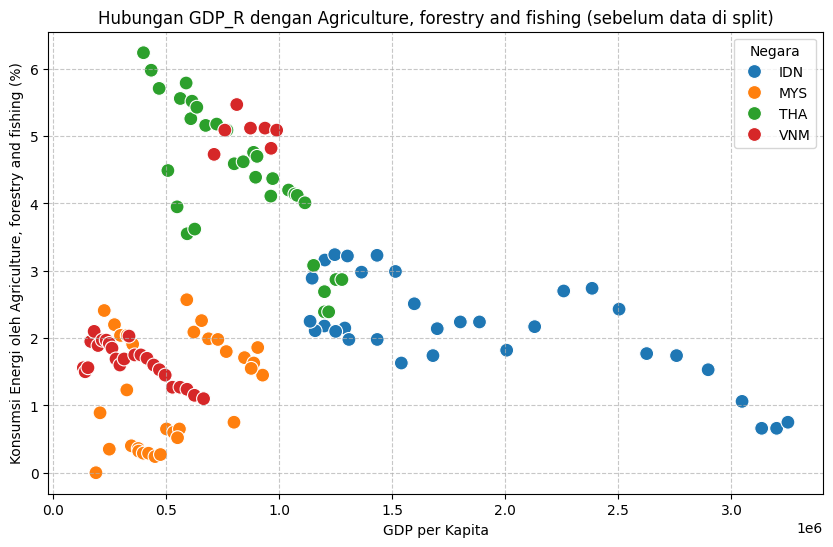

In [ ]:
# Scatterplot GDP_R dengan Agriculture, forestry and fishing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='Agriculture, forestry and fishing', hue='Country', s=100)
plt.title('Hubungan GDP_R dengan Agriculture, forestry and fishing (sebelum data di split)')
plt.xlabel('GDP per Kapita')
plt.ylabel('Konsumsi Energi oleh Agriculture, forestry and fishing (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik Scatterplot ini menunjukkan hubungan antara GDP per kapita (GDP_R) dengan konsumsi energi oleh sektor pertanian, kehutanan, dan perikanan di empat negara: Indonesia, Malaysia, Thailand, dan Vietnam. Secara umum, grafik ini memperlihatkan tren penurunan konsumsi energi oleh sektor tersebut seiring dengan meningkatnya GDP per kapita. Hal ini menunjukkan bahwa negara-negara dengan GDP lebih tinggi cenderung memiliki efisiensi energi yang lebih baik di sektor ini atau mengalami pergeseran aktivitas ekonomi ke sektor lain.

---

- **Indonesia**:
Indonesia (biru) memiliki GDP per kapita tertinggi dalam grafik ini, berkisar dari 1 juta hingga lebih dari 3 juta. Konsumsi energi oleh sektor pertanian, kehutanan, dan perikanan cenderung menurun, berada pada kisaran 1-3%. Hal ini menunjukkan bahwa sektor ini mungkin telah mengalami efisiensi energi yang lebih baik atau kontribusinya terhadap perekonomian relatif menurun dibandingkan sektor lain.

- **Malaysia**:
Malaysia (hijau) memiliki GDP per kapita yang berkisar antara 0,5 juta hingga 1,5 juta. Konsumsi energi oleh sektor ini bervariasi dari 2% hingga sekitar 4%, dengan tren yang menurun seiring dengan meningkatnya GDP per kapita. Ini menunjukkan peningkatan efisiensi energi atau pergeseran fokus ekonomi dari sektor primer ke sektor lain.

- **Thailand**:
Thailand (kuning) memiliki GDP per kapita yang lebih rendah, di bawah 0,5 juta, dengan konsumsi energi oleh sektor ini pada kisaran 1-2%. Konsumsi energi yang stabil ini menunjukkan bahwa sektor pertanian, kehutanan, dan perikanan masih menjadi sektor yang signifikan dalam perekonomian Thailand.

- **Vietnam**:
Vietnam (merah) memiliki GDP per kapita yang rendah, kurang dari 1 juta, tetapi konsumsi energi oleh sektor ini relatif tinggi, berada pada kisaran 3-5%. Hal ini menunjukkan bahwa sektor pertanian, kehutanan, dan perikanan masih menjadi sektor dominan dalam perekonomian Vietnam, meskipun tingkat efisiensi energinya tampaknya masih memerlukan peningkatan.

---

**Kesimpulan**:

Grafik ini menunjukkan bahwa negara dengan GDP per kapita lebih tinggi, seperti Indonesia dan Malaysia, cenderung memiliki konsumsi energi sektor pertanian, kehutanan, dan perikanan yang lebih rendah. Sebaliknya, negara dengan GDP lebih rendah, seperti Vietnam dan Thailand, masih sangat bergantung pada sektor ini, yang tercermin dari konsumsi energi yang relatif lebih tinggi.








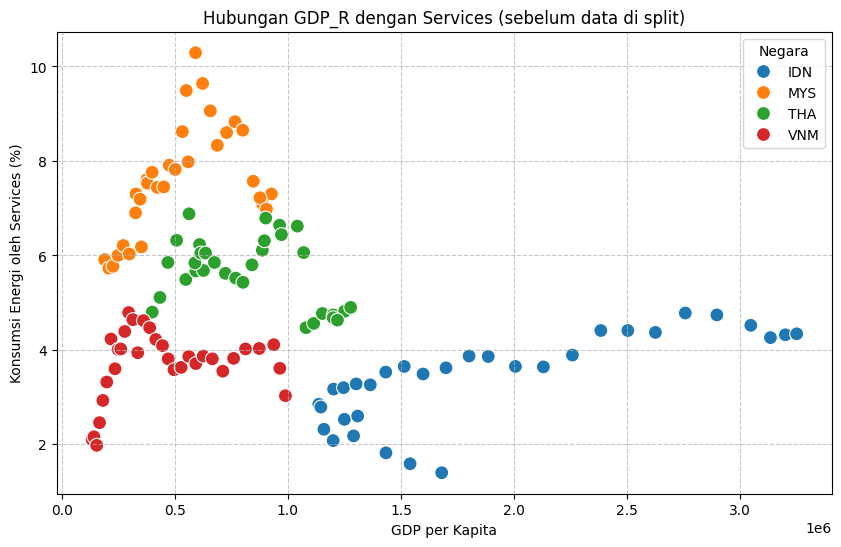

In [ ]:
# Scatterplot GDP_R dengan Services
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='Services', hue='Country', s=100)
plt.title('Hubungan GDP_R dengan Services (sebelum data di split)')
plt.xlabel('GDP per Kapita')
plt.ylabel('Konsumsi Energi oleh Services (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot ini menunjukkan hubungan antara Produk Domestik Bruto (PDB) per kapita dengan konsumsi energi oleh sektor jasa di empat negara: Indonesia, Malaysia, Thailand, dan Vietnam.Secara umum, tidak terlihat adanya hubungan linier yang kuat antara PDB per kapita dengan konsumsi energi oleh sektor jasa di keempat negara tersebut. Artinya, peningkatan PDB per kapita tidak selalu diikuti dengan peningkatan konsumsi energi oleh sektor jasa secara proporsional.
- **Indonesia (Biru):** Indonesia memiliki rentang PDB per kapita yang cukup luas. Konsumsi energi oleh sektor jasa di Indonesia cenderung stabil di kisaran 4-5%, tanpa menunjukkan tren yang jelas seiring dengan peningkatan PDB per kapita. Hal ini mengindikasikan bahwa sektor jasa di Indonesia mungkin telah mencapai tingkat efisiensi energi yang relatif stabil atau adanya faktor lain yang lebih dominan mempengaruhi konsumsi energi sektor ini.
-  **Malaysia (Oranye):** Malaysia memiliki rentang PDB per kapita yang lebih sempit dibandingkan Indonesia. Konsumsi energi oleh sektor jasa di Malaysia cenderung lebih tinggi dibandingkan Indonesia, berkisar antara 6-10%. Meskipun demikian, tidak terlihat adanya tren yang jelas antara PDB per kapita dan konsumsi energi sektor jasa di Malaysia.
- **Thailand (Hijau):** Thailand memiliki rentang PDB per kapita yang mirip dengan Malaysia. Konsumsi energi oleh sektor jasa di Thailand juga berkisar antara 6-10%, dengan sedikit variasi. Sama seperti Malaysia, tidak terlihat adanya hubungan linier yang kuat antara kedua variabel ini di Thailand.
- **Vietnam (Merah):** Vietnam memiliki PDB per kapita yang paling rendah di antara keempat negara. Konsumsi energi oleh sektor jasa di Vietnam juga cenderung lebih rendah, berkisar antara 2-5%. Namun, seiring dengan peningkatan PDB per kapita, terlihat adanya tren peningkatan konsumsi energi oleh sektor jasa di Vietnam. Hal ini mengindikasikan bahwa seiring dengan pertumbuhan ekonomi, sektor jasa di Vietnam semakin berkembang dan membutuhkan lebih banyak energi.


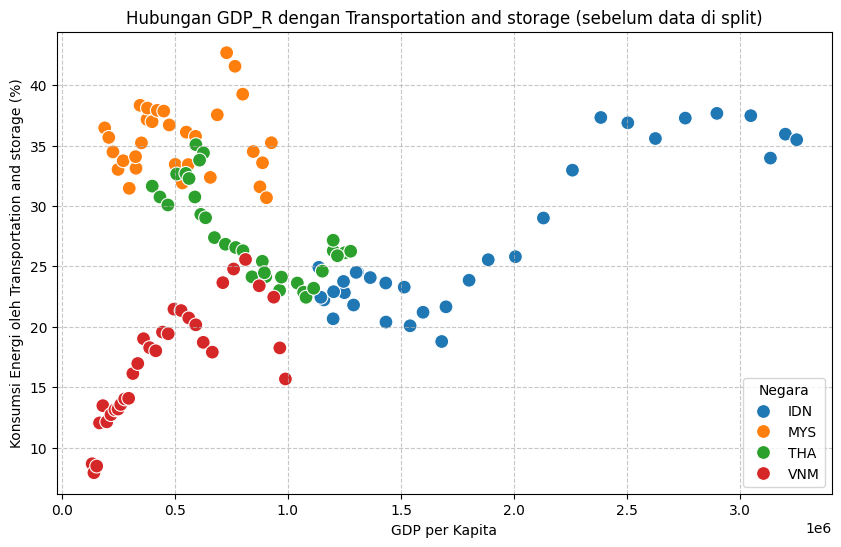

In [ ]:
# Scatterplot GDP_R dengan Transportation and storage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='Transportation and storage', hue='Country', s=100)
plt.title('Hubungan GDP_R dengan Transportation and storage (sebelum data di split)')
plt.xlabel('GDP per Kapita')
plt.ylabel('Konsumsi Energi oleh Transportation and storage (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot ini menunjukkan hubungan antara Produk Domestik Bruto (PDB) per kapita dengan konsumsi energi oleh sektor transportasi dan storage di empat negara: Indonesia, Malaysia, Thailand, dan Vietnam.Secara umum, grafik ini menunjukkan tren peningkatan konsumsi energi oleh sektor transportasi dan penyimpanan seiring dengan peningkatan PDB per kapita. Ini mengindikasikan bahwa seiring dengan pertumbuhan ekonomi, aktivitas transportasi dan penyimpanan cenderung meningkat, sehingga kebutuhan akan energi juga ikut meningkat.

- **Indonesia (Biru):** Indonesia memiliki rentang PDB per kapita yang cukup luas. Konsumsi energi oleh sektor transportasi dan penyimpanan di Indonesia juga bervariasi, namun secara umum mengikuti tren peningkatan seiring dengan peningkatan PDB per kapita. Hal ini menunjukkan bahwa pertumbuhan ekonomi di Indonesia mendorong peningkatan aktivitas transportasi dan penyimpanan, yang berdampak pada peningkatan konsumsi energi.
- **Malaysia (Oranye):** Malaysia memiliki rentang PDB per kapita yang lebih sempit dibandingkan Indonesia. Konsumsi energi oleh sektor transportasi dan penyimpanan di Malaysia cenderung lebih tinggi dibandingkan Indonesia, dan juga menunjukkan tren peningkatan yang cukup jelas seiring dengan peningkatan PDB per kapita. Ini mengindikasikan bahwa sektor transportasi memiliki kontribusi yang signifikan terhadap perekonomian Malaysia dan pertumbuhan ekonomi mendorong peningkatan konsumsi energi di sektor ini.
- **Thailand (Hijau):** Thailand memiliki rentang PDB per kapita yang mirip dengan Malaysia. Konsumsi energi oleh sektor transportasi dan penyimpanan di Thailand juga menunjukkan tren peningkatan yang serupa dengan Malaysia, meskipun tingkat konsumsi energinya sedikit lebih rendah.
- **Vietnam (Merah):** Vietnam memiliki PDB per kapita yang paling rendah di antara keempat negara. Konsumsi energi oleh sektor transportasi dan penyimpanan di Vietnam juga paling rendah, namun juga menunjukkan tren peningkatan seiring dengan peningkatan PDB per kapita. Hal ini mengindikasikan bahwa seiring dengan pertumbuhan ekonomi, sektor transportasi di Vietnam juga mengalami pertumbuhan, meskipun masih relatif lebih kecil dibandingkan negara-negara lain.

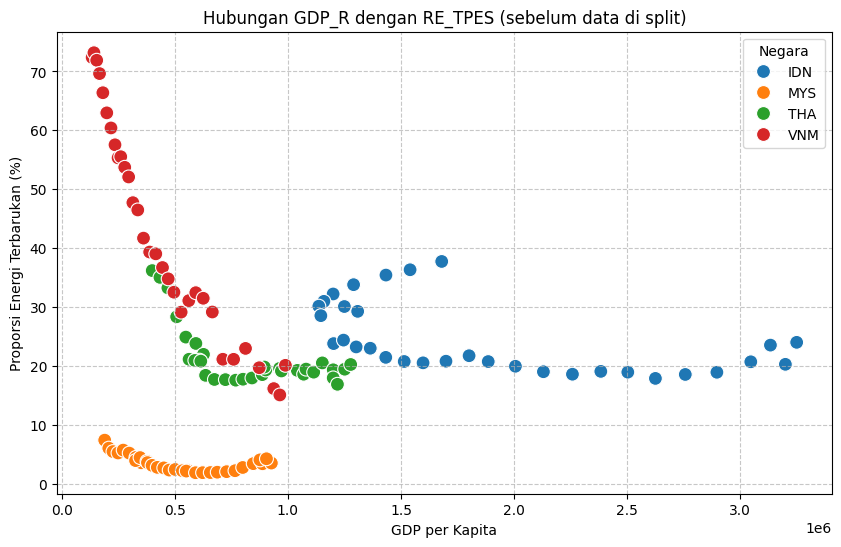

In [ ]:
# Scatterplot GDP_R dengan RE_TPES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_R', y='RE_TPES', hue='Country', s=100)
plt.title('Hubungan GDP_R dengan RE_TPES (sebelum data di split)')
plt.xlabel('GDP per Kapita')
plt.ylabel('Proporsi Energi Terbarukan (%)')
plt.legend(title='Negara')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Grafik scatterplot yang Anda presentasikan menunjukkan hubungan antara Produk Domestik Bruto (PDB) per kapita dengan proporsi energi terbarukan yang digunakan di empat negara: Indonesia, Malaysia, Thailand, dan Vietnam.Secara umum, grafik ini menggambarkan tren peningkatan proporsi energi terbarukan seiring dengan peningkatan PDB per kapita di keempat negara tersebut. Ini mengindikasikan bahwa negara-negara dengan pendapatan per kapita yang lebih tinggi cenderung lebih mengadopsi sumber energi terbarukan.

- **Indonesia (IDN)**
Indonesia (biru) memiliki GDP per kapita tertinggi dalam grafik ini, berkisar antara 1 juta hingga lebih dari 3 juta. Proporsi energi terbarukan berada di kisaran 10% hingga 30% dan cenderung stabil meskipun GDP per kapita meningkat. Hal ini menunjukkan bahwa Indonesia telah memiliki campuran energi yang terdiversifikasi dengan tingkat adopsi energi terbarukan yang konstan, meskipun terjadi pertumbuhan ekonomi.

- **Malaysia (MYS)**
Malaysia (hijau) memiliki GDP per kapita yang berkisar antara 0,5 juta hingga 1,5 juta. Proporsi energi terbarukan bervariasi dari 5% hingga 15% dengan tren sedikit menurun seiring pertumbuhan GDP. Pola ini mencerminkan peralihan Malaysia dari ketergantungan pada energi terbarukan menuju penggunaan energi fosil yang lebih besar untuk mendukung industrialisasi dan pertumbuhan ekonomi.

- **Thailand (THA)**
Thailand (kuning) memiliki GDP per kapita yang lebih rendah, di bawah 0,5 juta, dengan proporsi energi terbarukan stabil di kisaran 10% hingga 12%. Stabilitas ini menunjukkan bahwa Thailand masih bergantung pada energi terbarukan, terutama dari sumber tradisional, yang mencerminkan tahap awal industrialisasi atau transisi ke campuran energi yang lebih modern.

- **Vietnam (VNM)**
Vietnam (merah) memiliki GDP per kapita rendah, kurang dari 1 juta, dengan proporsi energi terbarukan yang sangat tinggi, mulai dari 20% hingga lebih dari 70%. Namun, terdapat tren penurunan tajam seiring peningkatan GDP, yang menunjukkan peralihan Vietnam dari ketergantungan pada energi terbarukan tradisional ke penggunaan energi modern seiring pertumbuhan ekonominya.

## Boxplot semua variabel per negara

<ipython-input-55-e7ff45de08a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Country', y='RE_TPES', palette='Set2')


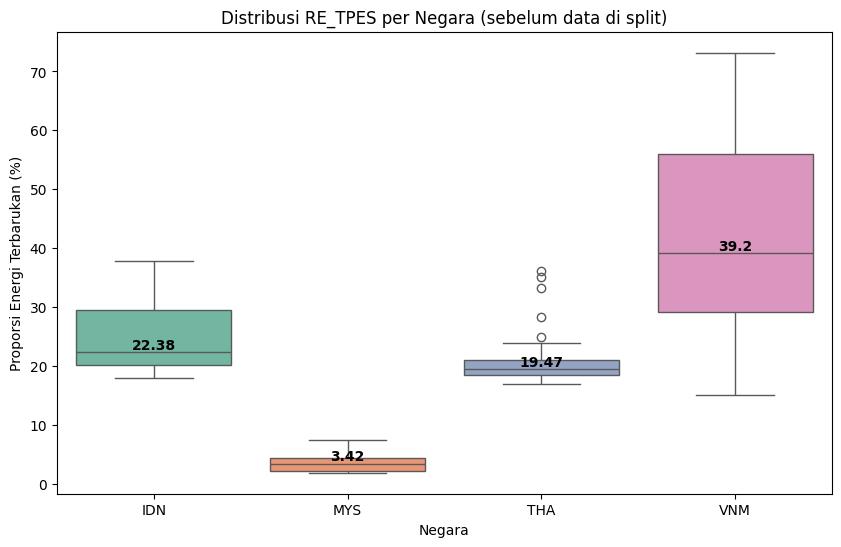

In [ ]:
# Visualisasi Distribusi RE_TPES per Negara sebelum di split data
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Country', y='RE_TPES', palette='Set2')
plt.title('Distribusi RE_TPES per Negara (sebelum data di split)')
plt.xlabel('Negara')
plt.ylabel('Proporsi Energi Terbarukan (%)')

# Calculate and add median values to the boxplot
medians = df.groupby('Country')['RE_TPES'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick],
            horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

Grafik boxplot di atas memberikan gambaran yang jelas mengenai distribusi proporsi energi terbarukan (RE_TPES) di empat negara ASEAN, yaitu Indonesia, Malaysia, Thailand, dan Vietnam. Berikut adalah interpretasi untuk masing-masing negara:

- **Indonesia (IDN):**
Indonesia memiliki median proporsi energi terbarukan sekitar 22,38%. Artinya, sebagian besar wilayah atau sektor di Indonesia menggunakan energi terbarukan sekitar persentase tersebut. Rentang nilai energi terbarukan di Indonesia relatif sempit, yang mengindikasikan bahwa penggunaan energi terbarukan di Indonesia cenderung lebih homogen atau merata di berbagai wilayah. Meskipun terdapat peningkatan dalam penggunaan energi terbarukan, proporsi energi terbarukan di Indonesia masih tergolong rendah dibandingkan negara lain. Hal ini mungkin disebabkan oleh beberapa faktor seperti ketergantungan pada sumber daya fosil, infrastruktur yang belum memadai, dan kurangnya insentif pemerintah untuk pengembangan energi terbarukan.

- **Malaysia (MYS):**
Malaysia memiliki median proporsi energi terbarukan yang jauh lebih rendah dibandingkan negara lain, yaitu sekitar 3,42%. Rentang nilai energi terbarukan di Malaysia juga sangat sempit. Proporsi energi terbarukan di Malaysia sangat rendah, yang menunjukkan bahwa negara ini masih sangat bergantung pada sumber energi fosil. Beberapa faktor yang mungkin menjadi penyebabnya adalah kebijakan energi yang belum sepenuhnya mendukung pengembangan energi terbarukan, serta dominasi sektor industri yang intensif energi.

- **Thailand (THA):**
Thailand memiliki median proporsi energi terbarukan sekitar 19,47%. Rentang nilai energi terbarukan di Thailand lebih luas dibandingkan Indonesia dan Malaysia, namun tidak seluas Vietnam. Hal ini mengindikasikan adanya variasi yang cukup signifikan dalam penggunaan energi terbarukan di berbagai wilayah atau sektor di Thailand. Thailand telah menunjukkan kemajuan yang cukup baik dalam pengembangan energi terbarukan, yang mungkin didorong oleh kebijakan pemerintah yang mendukung, investasi dalam teknologi baru, dan kesadaran masyarakat yang semakin tinggi akan pentingnya energi bersih.

- **Vietnam (VNM):**
Vietnam memiliki median proporsi energi terbarukan tertinggi di antara keempat negara, yaitu sekitar 39,2%. Rentang nilai energi terbarukan di Vietnam paling luas, menunjukkan adanya variasi yang sangat signifikan dalam penggunaan energi terbarukan di berbagai wilayah atau sektor di Vietnam. Vietnam telah menjadi pemimpin regional dalam pengembangan energi terbarukan. Pertumbuhan ekonomi yang pesat, kebijakan pemerintah yang mendukung, dan investasi asing yang signifikan di sektor energi terbarukan menjadi faktor pendorong utama.

<ipython-input-56-637ca6c22c34>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_train_encoded, x='Country', y='RE_TPES', palette='Set2')


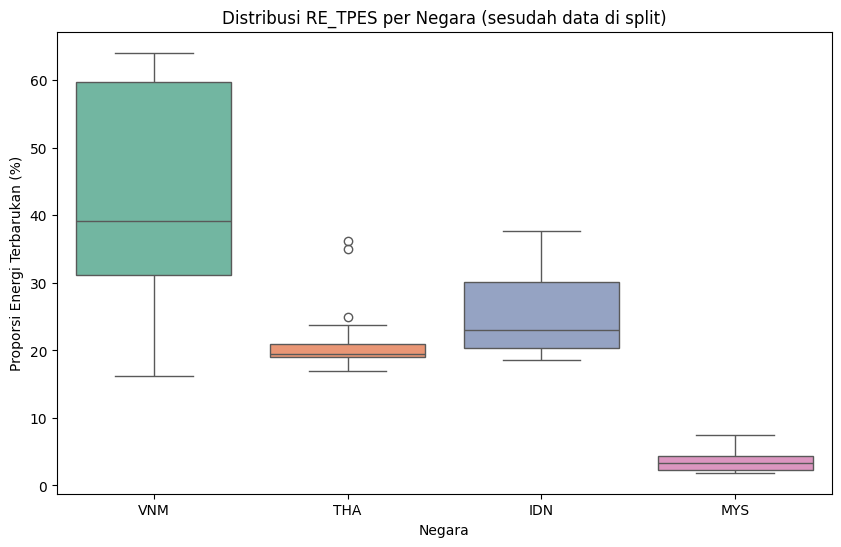

In [ ]:
# Visualisasi Distribusi RE_TPES per Negara sesudah di split data
plt.figure(figsize=(10, 6))

# Recreate the 'Country' column
X_train_encoded['Country'] = X_train_encoded[['Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM']].idxmax(axis=1).str.split('_').str[1]

# Create the boxplot
ax = sns.boxplot(data=X_train_encoded, x='Country', y='RE_TPES', palette='Set2')
plt.title('Distribusi RE_TPES per Negara (sesudah data di split)')
plt.xlabel('Negara')
plt.ylabel('Proporsi Energi Terbarukan (%)')

# Calculate and add median values to the boxplot
medians = X_train_encoded.groupby('Country')['RE_TPES'].median()

# Get the positions of the boxes
box_coords = [box.get_xdata() for box in ax.artists]
box_centers = [(coord[0] + coord[2]) / 2 for coord in box_coords]

# Add median values as text annotations
for x, y in zip(box_centers, medians):
    ax.text(x, y + 0.5, f'{y:.2f}', ha='center', va='bottom',
            size='medium', color='black', weight='semibold')

plt.show()

**Vietnam (VNM):** Vietnam memiliki persentase penggunaan energi terbarukan tertinggi di antara keempat negara ASEAN yang ditampilkan. Dengan rentang nilai energi terbarukan yang paling luas, hal ini menunjukkan adanya variasi yang cukup besar dalam penggunaan energi terbarukan di berbagai wilayah atau sektor di Vietnam. Keberhasilan ini dapat dikaitkan dengan pertumbuhan ekonomi yang pesat, kebijakan pemerintah yang mendukung transisi energi, serta investasi asing yang meningkat dalam sektor energi terbarukan. Selain itu, kesadaran masyarakat tentang pentingnya keberlanjutan lingkungan juga berkontribusi pada pengembangan sumber energi terbarukan.

**Thailand (THA):** Thailand memiliki persentase penggunaan energi terbarukan yang lebih rendah dibandingkan Vietnam, namun masih lebih tinggi dari Indonesia dan Malaysia. Rentang nilai energi terbarukan di Thailand cukup luas, menunjukkan potensi untuk meningkatkan penggunaan energi terbarukan di berbagai sektor. Peningkatan ini didorong oleh kebijakan pemerintah yang proaktif dalam mendukung pengembangan energi terbarukan, investasi dalam teknologi baru, serta adanya program-program untuk meningkatkan kesadaran masyarakat tentang pentingnya energi berkelanjutan. Namun, tantangan seperti ketergantungan pada energi fosil dan infrastruktur yang belum sepenuhnya mendukung transisi ini masih ada.

**Indonesia (IDN):** Indonesia memiliki persentase penggunaan energi terbarukan yang lebih rendah dibandingkan Vietnam dan Thailand. Rentang nilai energi terbarukan di Indonesia relatif sempit, menunjukkan tingkat penggunaan yang stabil. Hal ini mengindikasikan bahwa Indonesia masih memiliki potensi besar untuk meningkatkan penggunaan energi terbarukan. Faktor-faktor yang mempengaruhi rendahnya proporsi energi terbarukan di Indonesia antara lain ketergantungan pada bahan bakar fosil, infrastruktur yang belum memadai, serta kurangnya insentif pemerintah untuk pengembangan energi terbarukan. Selain itu, tantangan dalam hal kebijakan dan regulasi juga dapat menghambat pertumbuhan sektor energi terbarukan.

**Malaysia (MYS):** Malaysia memiliki persentase penggunaan energi terbarukan yang paling rendah di antara keempat negara ASEAN yang ditampilkan. Rentang nilai energi terbarukan di Malaysia juga paling sempit, menunjukkan tingkat penggunaan yang paling rendah. Hal ini mengindikasikan bahwa Malaysia perlu meningkatkan upaya dalam mengembangkan dan memanfaatkan sumber energi terbarukan. Penyebab rendahnya penggunaan energi terbarukan di Malaysia antara lain adalah ketergantungan pada sumber energi konvensional, tantangan dalam investasi dan pengembangan teknologi energi terbarukan, serta kurangnya kebijakan yang mendukung transisi energi. Kesadaran masyarakat dan sektor swasta tentang pentingnya energi berkelanjutan juga perlu ditingkatkan.

<ipython-input-57-4e3fe09ffebd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Country', y='CO2_PBEM', palette='Set3')


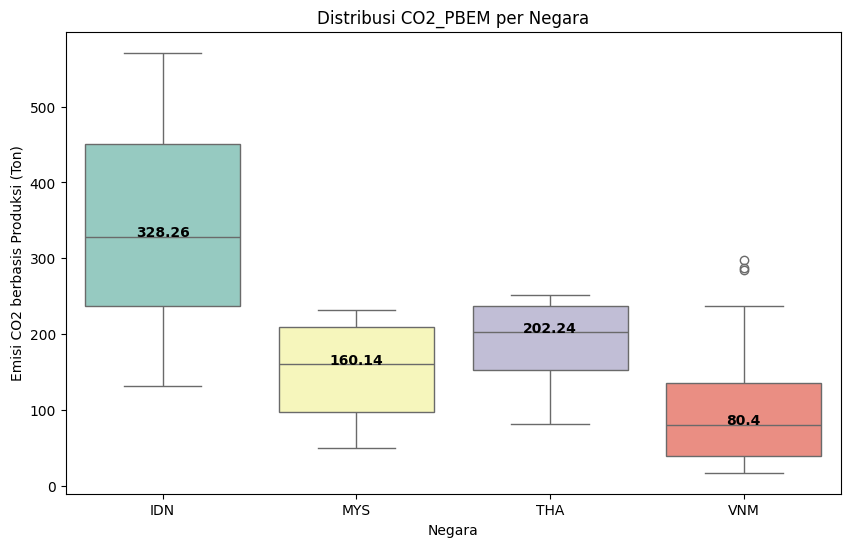

In [ ]:
# Visualisasi Distribusi CO2_PBEM per Negara
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Country', y='CO2_PBEM', palette='Set3')
plt.title('Distribusi CO2_PBEM per Negara')
plt.xlabel('Negara')
plt.ylabel('Emisi CO2 berbasis Produksi (Ton)')

# Median values
medians = df.groupby('Country')['CO2_PBEM'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick],
            horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()


Grafik boxplot di atas menggambarkan distribusi emisi CO2 per kapita berbasis produksi (CO2_PBEM) di empat negara ASEAN: Indonesia, Malaysia, Thailand, dan Vietnam. Mari kita bahas masing-masing negara:

- **Indonesia (IDN):**
Indonesia memiliki median emisi CO2_PBEM tertinggi di antara keempat negara, yaitu sekitar **328,26 ton**. Rentang nilai emisi CO2_PBEM di Indonesia cukup luas, mengindikasikan adanya variasi yang signifikan di berbagai wilayah atau sektor. Tingginya emisi ini menunjukkan bahwa Indonesia masih sangat bergantung pada energi fosil dalam proses produksinya, terutama di sektor industri dan energi. Selain itu, variasi besar dalam emisi CO2_PBEM mencerminkan perbedaan yang signifikan dalam tingkat industrialisasi dan penggunaan energi di berbagai wilayah.

- **Malaysia (MYS):**
Malaysia memiliki median emisi CO2_PBEM kedua tertinggi setelah Indonesia, yaitu sekitar **160,14 ton**. Rentang nilai emisi CO2_PBEM di Malaysia lebih sempit dibandingkan Indonesia, meskipun tetap signifikan. Tingginya emisi ini mengindikasikan bahwa sektor produksi di Malaysia masih sangat bergantung pada energi fosil. Meskipun median emisinya lebih rendah dari Indonesia, Malaysia perlu melakukan upaya lebih besar untuk mengurangi emisi karbonnya secara keseluruhan.

- **Thailand (THA):**
Thailand memiliki median emisi CO2_PBEM sebesar **202,24 ton**, berada di antara Indonesia dan Malaysia. Rentang nilai emisi CO2_PBEM di Thailand relatif lebih sempit dibandingkan Indonesia. Emisi ini menunjukkan bahwa Thailand juga memberikan kontribusi yang signifikan terhadap emisi global. Namun, dibandingkan dengan Indonesia dan Malaysia, Thailand kemungkinan telah melakukan upaya yang lebih baik dalam mengurangi emisi karbon, misalnya melalui peningkatan efisiensi energi atau penggunaan energi terbarukan.

- **Vietnam (VNM):**
Vietnam memiliki median emisi CO2_PBEM terendah di antara keempat negara, yaitu sekitar **80,4 ton**, dengan rentang nilai emisi yang paling sempit. Rendahnya emisi CO2_PBEM di Vietnam mungkin disebabkan oleh tingkat industrialisasi yang relatif lebih rendah dibandingkan negara-negara lain, atau adanya upaya yang lebih serius dalam mengadopsi energi terbarukan. Hal ini menunjukkan bahwa Vietnam memiliki potensi untuk terus mempertahankan atau bahkan meningkatkan fokusnya pada energi bersih.

<ipython-input-58-cfddfbb0d164>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Country', y='GDP_R', palette='Spectral')


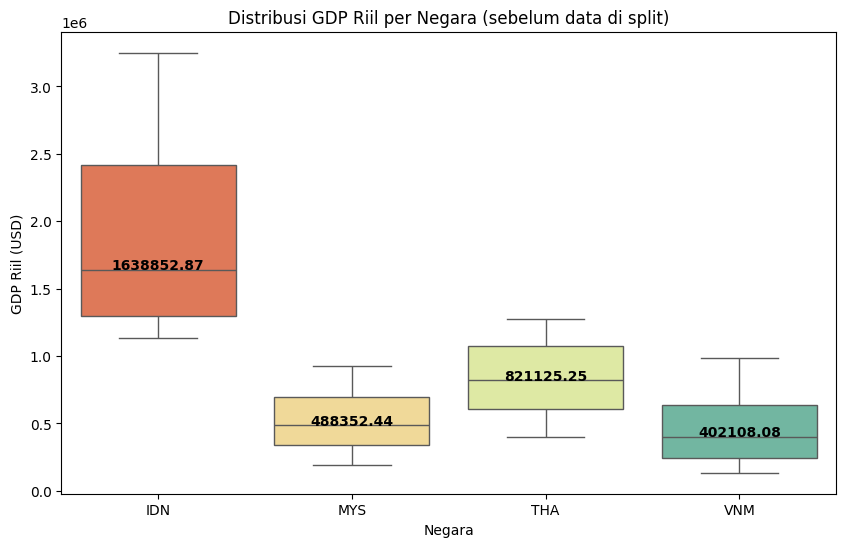

In [ ]:
# Visualisasi Distribusi GDP Riil per Negara
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Country', y='GDP_R', palette='Spectral')
plt.title('Distribusi GDP Riil per Negara (sebelum data di split)')
plt.xlabel('Negara')
plt.ylabel('GDP Riil (USD)')

# Median values
medians = df.groupby('Country')['GDP_R'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick],
            horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()


Grafik boxplot di atas menggambarkan distribusi Produk Domestik Bruto (PDB) riil per negara di antara Indonesia, Malaysia, Thailand, dan Vietnam. Mari kita bahas masing-masing negara:

- **Indonesia (IDN):**
Indonesia memiliki median GDP riil tertinggi di antara keempat negara, yaitu sekitar 1.638.852 USD. Rentang nilai GDP riil di Indonesia cukup luas, yang mengindikasikan adanya variasi signifikan di berbagai wilayah atau sektor. Tingginya median GDP riil ini menunjukkan bahwa secara keseluruhan, ekonomi Indonesia lebih besar dibandingkan negara-negara ASEAN lainnya yang ditampilkan. Namun, rentang nilai yang luas mencerminkan adanya ketimpangan ekonomi yang cukup signifikan di berbagai wilayah di Indonesia.

- **Malaysia (MYS):**
Malaysia memiliki median GDP riil kedua tertinggi setelah Indonesia, yaitu sekitar 821.125 USD. Rentang nilai GDP riil di Malaysia lebih sempit dibandingkan Indonesia, meskipun tetap menunjukkan adanya variasi yang signifikan. Hal ini mengindikasikan bahwa ekonomi Malaysia cukup kuat, meski lebih kecil dibandingkan Indonesia. Rentang nilai yang lebih sempit menunjukkan bahwa distribusi pendapatan di Malaysia mungkin lebih merata dibandingkan Indonesia.

- **Thailand (THA):**
Thailand memiliki median GDP riil sebesar 488.352 USD, berada di bawah Indonesia dan Malaysia. Rentang nilai GDP riil di Thailand relatif lebih sempit dibandingkan Indonesia, mencerminkan variasi yang lebih kecil dalam perekonomiannya. Hal ini menunjukkan bahwa ekonomi Thailand lebih kecil dibandingkan Indonesia dan Malaysia, namun negara ini telah menunjukkan pertumbuhan ekonomi yang stabil dalam beberapa tahun terakhir.

- **Vietnam (VNM):**
Vietnam memiliki median GDP riil terendah di antara keempat negara, yaitu sekitar 402.108 USD, dengan rentang nilai yang paling sempit. Hal ini menunjukkan bahwa ekonomi Vietnam masih dalam tahap pengembangan, meskipun negara ini telah mengalami pertumbuhan ekonomi yang pesat dalam beberapa tahun terakhir. Rentang yang sempit juga mengindikasikan tingkat distribusi pendapatan yang relatif merata di berbagai wilayah Vietnam.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

<Figure size 1400x800 with 0 Axes>

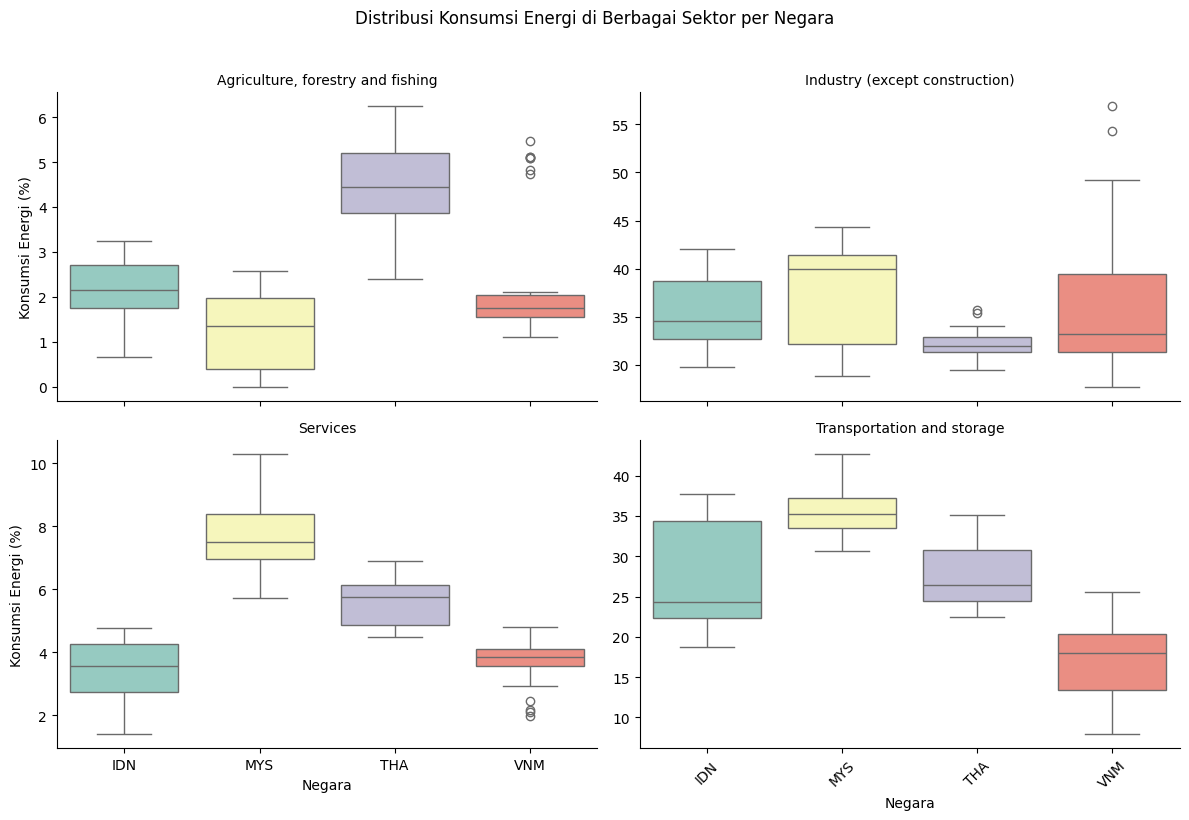

In [ ]:
# Visualisasi Distribusi Konsumsi Energi di Berbagai Sektor per Negara
plt.figure(figsize=(14, 8))

# Reshape data untuk keperluan plotting
df_melted = df.melt(id_vars=['Country'],
                    value_vars=['Agriculture, forestry and fishing',
                                'Industry (except construction)',
                                'Services',
                                'Transportation and storage'],
                    var_name='Sector',
                    value_name='Energy Consumption')

g = sns.FacetGrid(df_melted, col='Sector', col_wrap=2, height=4, aspect=1.5, sharey=False)
g.map(sns.boxplot, 'Country', 'Energy Consumption', palette='Set3')
g.set_titles('{col_name}')
g.set_axis_labels('Negara', 'Konsumsi Energi (%)')
g.fig.suptitle('Distribusi Konsumsi Energi di Berbagai Sektor per Negara', y=1.02)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**A. Sektor Agriculture, Forestry and Fishing**

* **Indonesia (IDN):**
Indonesia memiliki rentang konsumsi energi yang sempit, dengan median sekitar 3%. Stabilitas ini mencerminkan efisiensi energi di sektor agrikultur, meskipun peran sektor ini tetap signifikan dalam perekonomian.

* **Malaysia (MYS):**
Malaysia memiliki median konsumsi energi sekitar 2%, yang merupakan salah satu yang terendah di sektor ini. Rentang yang kecil menunjukkan konsistensi dalam penggunaan energi, sejalan dengan fokus negara ini pada sektor industri dan jasa.

* **Thailand (THA):**
Thailand menunjukkan median konsumsi energi sekitar 1,5%, dengan distribusi yang sempit. Hal ini mengindikasikan bahwa sektor agrikultur di Thailand menggunakan energi secara efisien, meskipun perannya dalam ekonomi cukup stabil.

* **Vietnam (VNM):**
Vietnam memiliki median konsumsi energi yang lebih tinggi, sekitar 5%, dengan rentang yang lebar. Ini menunjukkan bahwa sektor agrikultur masih menjadi kontributor besar terhadap konsumsi energi, dengan variasi yang mencerminkan skala aktivitas agrikultur yang luas.



**B. Sektor Industry (Except Construction)**\

* **Indonesia (IDN):**
Indonesia memiliki median konsumsi energi sekitar 35%, dengan rentang yang moderat. Sektor ini berperan besar dalam konsumsi energi, tetapi masih ada ruang untuk peningkatan efisiensi.

* **Malaysia (MYS):**
Malaysia menunjukkan median konsumsi energi di sektor ini sekitar 37%, sedikit lebih tinggi dari Indonesia. Rentang yang sempit mencerminkan efisiensi energi yang cukup baik di sektor industri.

* **Thailand (THA):**
Thailand memiliki median konsumsi energi sekitar 32%, dengan distribusi yang lebih stabil. Hal ini menunjukkan bahwa sektor industri di Thailand telah mengadopsi praktik efisiensi energi yang baik.

* **Vietnam (VNM):**
Vietnam menunjukkan median konsumsi energi sekitar 40%, dengan rentang yang cukup lebar. Ini mencerminkan peran besar sektor industri dalam perekonomian Vietnam, meskipun terdapat variasi konsumsi energi antarwilayah atau subsektor.*

**C. Sektor Services**

* **Indonesia (IDN):**
Indonesia memiliki median konsumsi energi sekitar 5%, dengan distribusi yang sempit. Stabilitas ini menunjukkan sektor jasa yang berkembang secara moderat, dengan penggunaan energi yang efisien.

* **Malaysia (MYS):**
Malaysia memiliki median konsumsi energi sekitar 7%, dengan rentang yang lebih lebar. Hal ini mencerminkan kontribusi besar sektor jasa terhadap perekonomian dan kebutuhan energi yang lebih bervariasi di sub-sektor.

* **Thailand (THA):**
Thailand menunjukkan median konsumsi energi sekitar 6%, dengan rentang yang cukup stabil. Ini mencerminkan sektor jasa yang efisien namun beragam, yang terus bertumbuh dalam struktur ekonomi negara.

* **Vietnam (VNM):**
Vietnam memiliki median konsumsi energi di sektor jasa sekitar 4%, dengan distribusi yang sempit. Hal ini menunjukkan sektor jasa yang masih berkembang, dengan kontribusi yang lebih kecil terhadap total konsumsi energi.

**D. Sektor Transportation and Storage**

* **Indonesia (IDN):**
Indonesia memiliki median konsumsi energi sekitar 35%, dengan rentang yang lebar. Hal ini mencerminkan dominasi sektor transportasi dalam konsumsi energi, terutama dari bahan bakar fosil.

* **Malaysia (MYS):**
Malaysia memiliki median konsumsi energi sekitar 30%, dengan variasi yang lebih kecil dibandingkan Indonesia. Ini menunjukkan tingkat efisiensi energi yang cukup baik di sektor transportasi.

* **Thailand (THA):**
Thailand menunjukkan median konsumsi energi sekitar 25%, dengan rentang yang lebih sempit. Efisiensi ini mencerminkan sektor transportasi yang cukup terkontrol dalam penggunaan energi.

* **Vietnam (VNM):**
Vietnam memiliki median konsumsi energi sekitar 20%, dengan distribusi yang relatif sempit. Hal ini menunjukkan sektor transportasi yang mulai efisien, meskipun kontribusinya terhadap total konsumsi energi masih terbatas.



## Inferensial Statistic

#### Model Regresi Kuadrat Terkecil Biasa/Ordinary Least Squares (OLS)

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Memilih variabel independen dan dependen
X = df[['GDP_R', 'Agriculture, forestry and fishing', 'Industry (except construction)', 'Services', 'Transportation and storage', 'RE_TPES']]
y = df['CO2_PBEM']

# Menambahkan konstanta
X = sm.add_constant(X)

# Model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               CO2_PBEM   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     439.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.34e-79
Time:                        13:25:08   Log-Likelihood:                -596.87
No. Observations:                 128   AIC:                             1208.
Df Residuals:                     121   BIC:                             1228.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Berdasarkan output yang tertera di atas, dapat diketahui bahwa model yang terbentuk adalah Ŷ = -59.7902 + 0.0002X1 + 7.6623X2 + 2.5120X3 + 14.3476X4 - 2.5236X5 - 0.9822X6. Hal ini berarti:

- Setiap penambahan satu satuan dari total Produk Domestik Bruto (PDB) riil suatu negara, maka emisi karbon dioksida (CO2) akan bertambah sebesar 0.0002 Tonnes.
- Setiap penambahan satu persen dari konsumsi energi berdasarkan aktivitas sektor pangan yaitu pertanian, kehutanan dan perikanan (agriculture, forestry and fishing), maka emisi karbon dioksida (CO2) akan bertambah sebesar 7.6623 Tonnes.
- Setiap penambahan satu persen dari konsumsi energi berdasarkan aktivitas industri (industry (except construction)), maka emisi karbon dioksida (CO2) akan bertambah sebesar 2.5120 Tonnes.
- Setiap penambahan satu persen dari konsumsi energi berdasarkan aktivitas pelayanan atau jasa (services), maka emisi karbon dioksida (CO2) akan bertambah sebesar 14.3476 Tonnes.
- Setiap penambahan satu persen dari konsumsi energi berdasarkan aktivitas transportasi dan penyimpanan (transportation and storage), maka emisi karbon dioksida (CO2) akan berkurang sebesar 2.5236 Tonnes.
- Setiap penambahan satu persen dari energi terbarukan, maka emisi karbon dioksida (CO2) akan berkurang sebesar 0.9822 atau setara dengan 1 Tonnes.

Sedangkan jika total PDB riil, konsumsi energi dari aktivitas sektor pangan, sektor industri, sektor pelayanan atau jasa, dan sektor transpostasi dan penyimpanan serta energi terbarukan bernilai konstan, maka total emisi karbondioksida akan berkurang sebesar 59.7902 Tonnes.

#### Uji Serempak

**Hipotesis:**

H0 : Total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam secara bersamaan tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

H1 : Total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam secara bersamaan mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

**Taraf Nyata:** α = 0.05

**Daerah penolakan:**
Tolak H0 jika Fhitung > Ftabel

**Uji Statistik:**

In [ ]:
# Menampilkan summary dari model yang terbentuk
print(model.summary())

# Derajat kebebasan
df1 = 5  # untuk numerator
df2 = 77  # untuk denominator

# Menghitung nilai F tabel
alpha = 0.05
f_value = stats.f.ppf(1 - alpha, df1, df2)

print(f"Nilai F tabel pada alpha {alpha} adalah: {f_value}")

                            OLS Regression Results                            
Dep. Variable:               CO2_PBEM   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     439.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.34e-79
Time:                        13:25:08   Log-Likelihood:                -596.87
No. Observations:                 128   AIC:                             1208.
Df Residuals:                     121   BIC:                             1228.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Keputusan:**

Berdasarkan output yang tertera di atas, dapat diketahui bahwa nilai Fhitung = 19.87 dengan df1 = 5 dan df2 = 77, maka nilai Ftabel = F(0.05,5,77) = 2.33. Dengan demikian, dapat diambil keputusan bahwa tolak H0 karena Fhitung > Ftabel yaitu 493 > 2.33.


**Kesimpulan:**

Dengan tingkat kepercayaan 95%, maka dapat disimpulkan bahwa total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam secara bersamaan mempengaruhi jumlah total karbon dioksida (CO2) yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

#### Uji Parsial (Individual)

**Hipotesis:**

**- Terhadap 𝜷0**

H0 : Seluruh jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam dapat dijelaskan oleh total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di keempat negara tersebut.

H1 : Beberapa jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam ada yang tidak dapat dijelaskan oleh total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di keempat negara tersebut.

**- Terhadap 𝜷1**

H0 : Secara individu total Produk Domestik Bruto (PDB) riil tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

H1 : Secara individu total Produk Domestik Bruto (PDB) riil mempengaruh jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷2**

H0 : Secara individu konsumsi energi berdasarkan sektor pertanian, kehutanan dan perikanan (agriculture, forestry and fishing) tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

H1 : Secara individu konsumsi energi berdasarkan sektor pertanian, kehutanan dan perikanan (agriculture, forestry and fishing) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷3**

H0 : Secara individu konsumsi energi berdasarkan sektor industri (industry (except construction)) tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

H1 : Secara individu konsumsi energi berdasarkan sektor industri (industry (except construction)) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷4**

H0 : Secara individu konsumsi energi berdasarkan sektor pelayanan atau jasa (services) tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

H1 : Secara individu konsumsi energi berdasarkan sektor pelayanan atau jasa (services) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷5**

H0 : Secara individu konsumsi energi berdasarkan sektor transportasi dan penyimpanan (transportation and storage) tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

H1 : Secara individu konsumsi energi berdasarkan sektor transportasi dan penyimpanan (transportation and storage) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷6**

H0 : Secara individu energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam tidak mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

H1 : Secara individu energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

**Taraf Nyata:**

α = 0.05

**Daerah penolakan:**

Tolak H0 jika P-value < α

**Uji Statistik:**

In [ ]:
# Melihat P-value untuk uji parsial (individual)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               CO2_PBEM   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     439.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.34e-79
Time:                        13:25:08   Log-Likelihood:                -596.87
No. Observations:                 128   AIC:                             1208.
Df Residuals:                     121   BIC:                             1228.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Keputusan:**

Berdasarkan output yang tertera di atas, dapat diketahui bahwa:

**- Terhadap 𝜷0**

Tidak tolak H0 karena P-value > α yaitu 0.124 > 0.05

**- Terhadap 𝜷1**

Tolak H0 karena P-value < α yaitu 0 < 0.05

**- Terhadap 𝜷2**

Tolak H0 karena P-value < α yaitu 0 < 0.05

**- Terhadap 𝜷3**

Tolak H0 karena P-value < α yaitu 0 < 0.05

**- Terhadap 𝜷4**

Tolak H0 karena P-value < α yaitu 0 < 0.05

**- Terhadap 𝜷5**

Tolak H0 karena P-value < α yaitu 0 < 0.05

**- Terhadap 𝜷6**

Tolak H0 karena P-value < α yaitu 0.003 < 0.05

**Kesimpulan:**

Dengan tingkat kepercayaan 95%, maka dapat disimpulkan bahwa:

**- Terhadap 𝜷0**

Seluruh jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam ada yang dapat dijelaskan oleh total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di keempat negara tersebut.

**- Terhadap 𝜷1**

Secara individu total Produk Domestik Bruto (PDB) riil mempengaruh jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷2**

Secara individu konsumsi energi berdasarkan sektor pertanian, kehutanan dan perikanan (agriculture, forestry and fishing) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷3**

Secara individu konsumsi energi berdasarkan sektor industri (industry (except construction)) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷4**

Secara individu konsumsi energi berdasarkan sektor pelayanan atau jasa (services) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷5**

Secara individu konsumsi energi berdasarkan sektor transportasi dan penyimpanan (transportation and storage) mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di Indonesia, Malaysia, Thailand, dan Vietnam.

**- Terhadap 𝜷6**

Secara individu energi terbarukan di Indonesia, Malaysia, Thailand, dan Vietnam mempengaruhi jumlah total emisi CO2 yang dihasilkan oleh aktivitas produksi di keempat negara tersebut.

Berdasarkan hasil analisa dari keputusan dan kesimpulan di atas, maka dapat diketahui bahwa seluruh variabel yang dianalisis mempengaruhi jumlah total emisi karbon dioksida (C02) di Indonesia, Malaysia, Thailand, dan Vietnam yaitu total Produk Domestik Bruto (PDB) riil suatu negara, konsumsi energi berdasarkan aktivitas ekonomi, dan energi terbarukan di keempat negara tersebut.

####Analisis Varians (ANOVA) untuk Perbandingan Sektor

In [ ]:
from scipy import stats

# Lakukan ANOVA untuk sektor energi
f_val, p_val = stats.f_oneway(df['Agriculture, forestry and fishing'],
                               df['Industry (except construction)'],
                               df['Services'],
                               df['Transportation and storage'])

print(f"F-value: {f_val}, P-value: {p_val}")

# Interpretasi ANOVA
if p_val < 0.05:
    print("Ada perbedaan signifikan dalam konsumsi energi antar sektor-sektor.")
else:
    print("Tidak ada perbedaan signifikan dalam konsumsi energi antar sektor-sektor.")


F-value: 1352.1018234968044, P-value: 1.0919566097093332e-241
Ada perbedaan signifikan dalam konsumsi energi antar sektor-sektor.



Dari hasil ANOVA diatas berikut ini adalah interpretasinya:

* F-value: 1352.102
Nilai F yang tinggi menunjukkan adanya variabilitas antar grup (sektor) yang jauh lebih besar dibandingkan dengan variabilitas di dalam setiap grup. Hal ini menunjukkan bahwa perbedaan antar sektor cukup besar dan signifikan.

* P-value: 1.092 × 10^(-241)

P-value yang sangat kecil (lebih kecil dari 0.05) menunjukkan bahwa ada perbedaan yang sangat signifikan antara konsumsi energi antar sektor-sektor yang diuji.

**Kesimpulan:** Ada perbedaan yang signifikan dalam konsumsi energi antara sektor-sektor yang dianalisis, yaitu sektor pertanian, industri, jasa, dan transportasi. Artinya, sektor-sektor ini memiliki pola konsumsi energi yang berbeda-beda satu sama lain.

# **Feature Engineering**

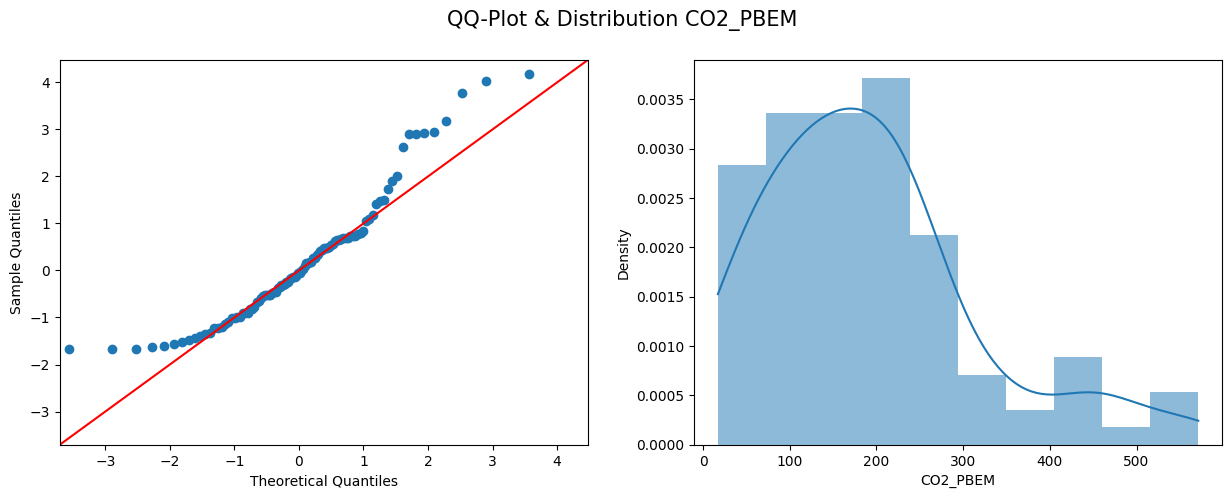

In [ ]:
# IMPORTING LIBRARIES TO PERFORM NORMALIZATION
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("QQ-Plot & Distribution CO2_PBEM", fontsize=15)

sm.qqplot(y_train, stats.t, distargs=(4,), fit=True, line="45", ax=ax[0])

sns.histplot(y_train, kde=True, ax=ax[1], stat="density", linewidth=0)

plt.show()

Kurva di atas menunjukkan bahwa variabel target sudah hampir linear sehingga tidak perlu dilakukan normalisasi terhadap variabel target (jumlah total emisi C02 (C02_PBEM)).

### Standardisasi

In [ ]:
# Menghapus kolom yang tidak diperlukan seperti tahun dan negara
columns_to_drop = ['Year', 'Country_IDN', 'Country_MYS', 'Country_THA', 'Country_VNM', 'Country']
X_train_encoded =X_train_encoded.drop(columns=columns_to_drop)

In [ ]:
columns_to_drop = ["Country_IDN", "Country_MYS", "Country_THA", "Country_VNM", "Year"]
X_test_encoded = X_test_encoded.drop(columns=columns_to_drop)

In [ ]:
from sklearn import preprocessing
import pandas as pd

columns_to_scale = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns

scaler = preprocessing.MinMaxScaler()

X_train_encoded_scaled = X_train_encoded.copy()
X_train_encoded_scaled[columns_to_scale] = scaler.fit_transform(X_train_encoded[columns_to_scale])
X_test_encoded_scaled = X_test_encoded.copy()
X_test_encoded_scaled[columns_to_scale] = scaler.transform(X_test_encoded[columns_to_scale])
X_train_scaled_df = pd.DataFrame(X_train_encoded_scaled, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled_df = pd.DataFrame(X_test_encoded_scaled, columns=X_test_encoded.columns, index=X_test_encoded.index)


print(X_train_scaled_df.head())

        GDP_R   RE_TPES  Agriculture, forestry and fishing  \
102  0.036893  0.940855                           0.350378   
115  0.160058  0.492614                           0.257892   
109  0.089300  0.717056                           0.361049   
95   0.479944  0.241323                           0.425078   
13   0.544140  0.339717                           0.530013   

     Industry (except construction)  Services  Transportation and storage  
102                        0.119181  0.328735                    0.138377  
115                        0.416667  0.253231                    0.389528  
109                        0.170857  0.295049                    0.260069  
95                         0.136406  0.375200                    0.516686  
13                         0.324488  0.216059                    0.464614  


Karena skala pada data yang digunakan berbeda antar variabel. Oleh karena itu, dilakukanlah standardisasi menggunakan MinMaxScaler agar data yang digunakan berada dalam rentang atau skala yang sama. Standardisasi dilakukan untuk memastikan bahwa skala dari setiap fitur atau variabel pada data training dan data testing setara atau seragam sebelum dilakukan training model machine learning. MinMaxScaler adalah salah satu teknik normalisasi atau standardisasi yang dapat digunakan pada data numerik. Teknik ini mengubah skala fitur sehingga berada dalam rentang tertentu, biasanya antara 0 dan 1. Salah satu kelebihan dari teknik ini adalah dapat mempertahankan hubungan antar nilai variabel. Data yang telah terdistribusi merata biasanya dapat meningkatkan performa model. Maka dari itu diperlukan proses standarisasi data.

### Feature Selection

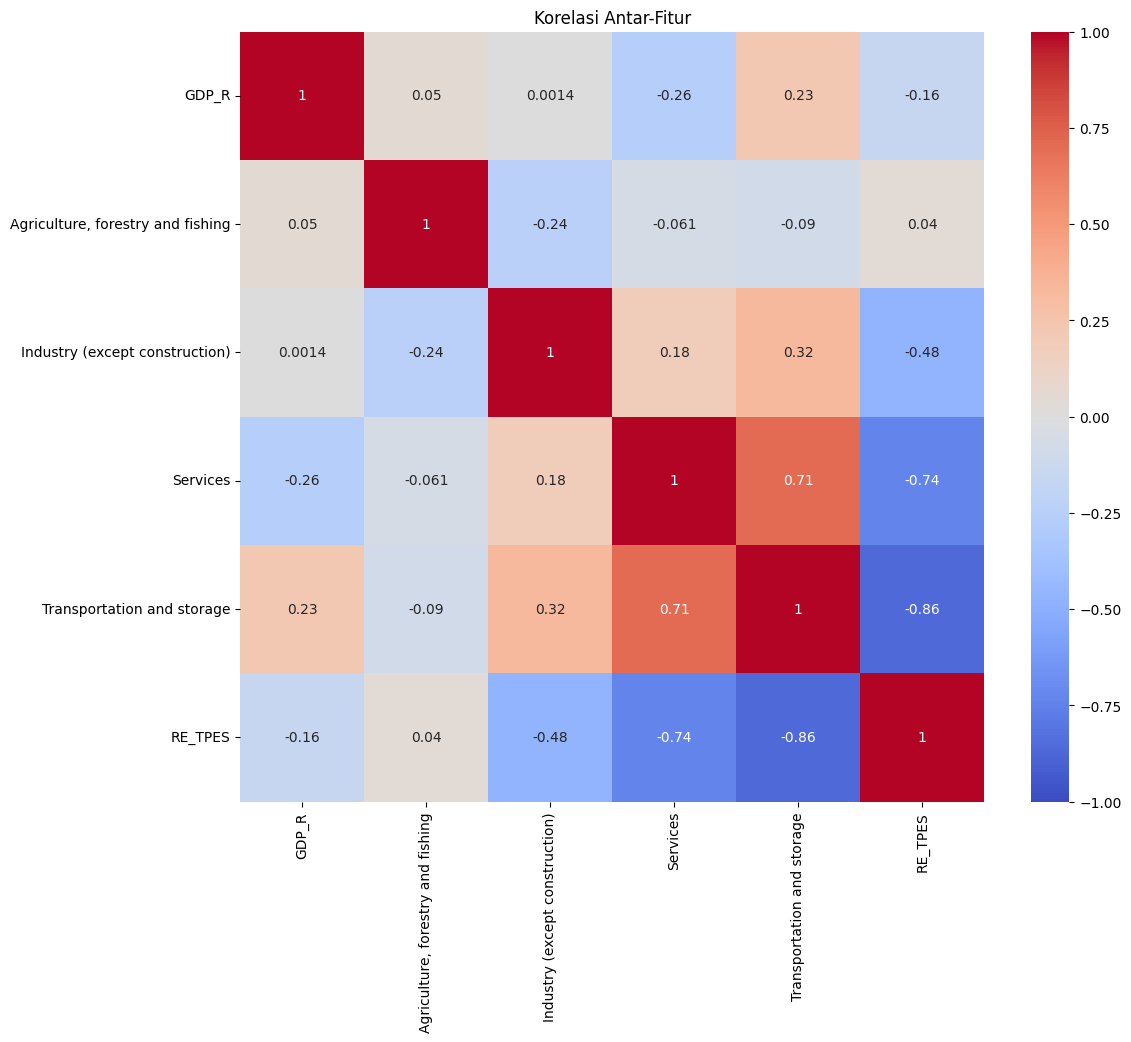

In [ ]:
# Menghitung korelasi antar-fitur numerik
correlation_matrix =X_train_scaled_df[[ "GDP_R",    "Agriculture, forestry and fishing",    "Industry (except construction)",   "Services"  ,"Transportation and storage",  "RE_TPES"]].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Antar-Fitur")
plt.show()

In [ ]:
# Hitung matriks korelasi
correlation_matrix = X_train_encoded[['GDP_R', 'Agriculture, forestry and fishing', 'Industry (except construction)',   'Services', 'Transportation and storage',   'RE_TPES']].corr()

# Rata-rata matriks korelasi, reset indeks untuk menjadikannya DataFrame, dan ganti nama kolom
corr_flat = correlation_matrix.stack().reset_index()
corr_flat.columns = ['Variable1', 'Variable2', 'Correlation']

# Hapus korelasi diri (di mana Variable1 == Variable2)
corr_flat_filtered = corr_flat[corr_flat['Variable1'] != corr_flat['Variable2']]

# Urutkan berdasarkan nilai absolut dari korelasi dalam urutan menurun
sorted_corr = corr_flat_filtered.assign(AbsCorrelation=corr_flat_filtered['Correlation'].abs()) \
    .sort_values('AbsCorrelation', ascending=False) \
    .drop('AbsCorrelation', axis=1)

# Tampilkan
print(sorted_corr.head(10))

                         Variable1                       Variable2  \
34                         RE_TPES      Transportation and storage   
29      Transportation and storage                         RE_TPES   
33                         RE_TPES                        Services   
23                        Services                         RE_TPES   
27      Transportation and storage                        Services   
22                        Services      Transportation and storage   
32                         RE_TPES  Industry (except construction)   
17  Industry (except construction)                         RE_TPES   
16  Industry (except construction)      Transportation and storage   
26      Transportation and storage  Industry (except construction)   

    Correlation  
34    -0.859597  
29    -0.859597  
33    -0.737234  
23    -0.737234  
27     0.707313  
22     0.707313  
32    -0.476555  
17    -0.476555  
16     0.321226  
26     0.321226  


Korelasi adalah cara untuk mengukur seberapa kuat hubungan antara dua hal. Angka yang digunakan untuk menunjukkan korelasi berkisar antara -1 hingga 1, dan artinya sebagai berikut:
 - Nilai 1: Ini berarti ada hubungan yang sangat kuat. Ketika satu hal meningkat, hal lainnya juga pasti meningkat.
 - Nilai -1: Ini berarti ada hubungan yang sangat kuat tetapi berlawanan. Ketika satu hal meningkat, hal lainnya justru menurun
 - Nilai 0: Ini berarti menunjukkan tidak ada hubungan yang signifikan.

Sekarang mari kita lihat beberapa hasil korelasi dari data yang kita punya:
 - *RE_TPES* dan *Transportation and Storage: -0.859597.*    
 Hubungan negatif yang sangat kuat (korelasi mendekati -1) antara RE_TPES dan Transportation and Storage menunjukkan adanya hubungan yang signifikan. Artinya, ketika aktivitas di sektor energi meningkat sebesar 1 unit, secara rata-rata aktivitas di sektor transportasi akan menurun sebesar 0.859597 unit. Hal ini menunjukkan adanya persaingan dalam alokasi sumber daya antara kedua sektor.
   - Di Indonesia, hubungan negatif yang kuat antara sektor energi terbarukan (RE_TPES) dan sektor transportasi dan penyimpanan disebabkan oleh alokasi sumber daya yang terbatas. Fokus pemerintah dan investor pada pengembangan energi terbarukan, seperti tenaga surya dan angin, mengurangi investasi dalam infrastruktur transportasi, sehingga menurunkan aktivitas di sektor tersebut.
  - Di Malaysia, hubungan negatif ini dipahami dalam konteks kebijakan pemerintah yang mendorong transisi ke energi terbarukan. Ketika investasi dialihkan ke energi terbarukan, sektor transportasi mengalami penurunan aktivitas akibat kurangnya perhatian dan dana untuk infrastruktur transportasi, serta berkurangnya permintaan untuk transportasi berbasis bahan bakar fosil.
  - Di Thailand, hubungan negatif yang kuat dapat diatribusikan pada upaya mengurangi emisi karbon. Fokus pada energi terbarukan mengalihkan sumber daya dari pengembangan infrastruktur transportasi, yang menyebabkan penurunan aktivitas di sektor tersebut.
  - Di Vietnam, hubungan negatif ini dijelaskan oleh kebutuhan mendesak untuk beralih ke energi terbarukan dalam menghadapi perubahan iklim. Investasi yang lebih besar dalam energi terbarukan mengurangi alokasi sumber daya untuk infrastruktur transportasi, serta mengurangi ketergantungan pada bahan bakar fosil, yang berdampak pada aktivitas di sektor transportasi.

 - *Services* dan *Transportation and Storage: 0.707313*.   
 Hubungan positif yang cukup kuat. Ketika aktivitas di sektor layanan meningkat, aktivitas di sektor transportasi dan penyimpanan juga cenderung meningkat. Hal ini menunjukkan bahwa sektor layanan bergantung pada sektor transportasi untuk distribusi dan logistik. Keterkaitan yang kuat antara sektor layanan dan transportasi di Indonesia, Malaysia, Thailand, dan Vietnam yang didorong oleh pertumbuhan ekonomi, urbanisasi, dan kemajuan teknologi.   
   - Di Indonesia, transportasi online telah memudahkan pengantaran barang dari toko ke konsumen, sehingga meningkatkan penjualan di sektor ritel. Selain itu, layanan pengantaran makanan seperti GoFood dan GrabFood telah merevolusi cara orang mengakses makanan. Transportasi online juga memberikan kemudahan bagi wisatawan untuk menjelajahi destinasi, yang pada gilirannya meningkatkan sektor pariwisata. Dengan meningkatnya penggunaan transportasi online, terdapat pula peningkatan dalam layanan pembayaran digital dan keuangan, yang mendukung pertumbuhan sektor keuangan.
   - Di Malaysia, sektor transportasi yang efisien dan layanan berbasis aplikasi seperti Grab telah meningkatkan mobilitas masyarakat, memperkuat konektivitas antara daerah perkotaan dan pedesaan, serta mendukung pertumbuhan sektor pariwisata dan ritel.
  - Di Thailand juga menunjukkan keterkaitan yang kuat antara sektor layanan dan transportasi, di mana layanan transportasi umum yang baik, seperti BTS dan MRT, mendukung sektor pariwisata dan meningkatkan aksesibilitas ke berbagai layanan, termasuk perhotelan dan restoran.
  - Di Vietnam, pertumbuhan pesat layanan transportasi online seperti Grab dan Gojek telah memfasilitasi pengantaran barang dan makanan, serta meningkatkan aksesibilitas bagi wisatawan, yang berkontribusi pada pertumbuhan sektor pariwisata dan ekonomi digital.

 - *Services* dan *GDP_R: -0.26*.   
Hubungan korelasi yang terbentuk adalah hubungan negatif yang tidak cukup kuat. Peningkatan dalam sektor layanan tidak selalu berbanding lurus dengan pertumbuhan PDB. Ini menunjukkan bahwa meskipun sektor layanan penting, ada faktor lain yang mempengaruhi pertumbuhan ekonomi secara keseluruhan.
  - Di Indonesia, hubungan negatif yang tidak cukup kuat antara sektor layanan dan PDB menunjukkan bahwa meskipun sektor layanan, seperti pariwisata dan perdagangan, faktor lain seperti ketergantungan pada sektor pertanian dan industri ekstraktif serta tantangan infrastruktur dapat menghambat dampak positifnya terhadap pertumbuhan ekonomi.
  - Di Malaysia, hubungan negatif ini mencerminkan kompleksitas ekonomi yang beragam. Sektor layanan, termasuk keuangan dan pariwisata, berkontribusi, tetapi pertumbuhan PDB juga dipengaruhi oleh sektor industri dan komoditas. Fluktuasi harga komoditas dan ketidakpastian global dapat mengurangi dampak positif sektor layanan.
  - Di Thailand, meskipun sektor layanan, terutama pariwisata, merupakan pendorong utama ekonomi, hubungan negatif yang tidak cukup kuat menunjukkan bahwa sektor pertanian dan industri manufaktur, serta tantangan politik, juga berpengaruh besar terhadap pertumbuhan PDB.
  - Di Vietnam, meskipun sektor layanan seperti perdagangan dan pariwisata berkembang pesat, hubungan negatif yang tidak cukup kuat menunjukkan bahwa sektor industri dan manufaktur memiliki dampak yang lebih besar terhadap PDB. Tantangan infrastruktur dan kebijakan ekonomi juga dapat mengurangi kontribusi sektor layanan terhadap pertumbuhan ekonomi.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = X_train_scaled_df.select_dtypes(include='number')

# Adding a constant column for intercept
X['Intercept'] = 1

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF, excluding the intercept
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data

Feature       VIF
0                              GDP_R  1.936476
1                            RE_TPES  6.553237
2  Agriculture, forestry and fishing  1.110566
3     Industry (except construction)  1.716520
4                           Services  4.518809
5         Transportation and storage  4.765708

Seleksi fitur atau variabel independen tidak hanya dilakukan dengan heatmap correlation saja namun juga dapat dilakukan melalui hasil uji multikolinearitas. Uji multikolinearitas diperlukan untuk mengidentifikasi apakah ada hubungan linear yang kuat antar variabel independen. Salah satu cara untuk mengetahui adanya multikolinearitas tersebut adalah dengan melihat nilai *Variance Inflation Factor* (VIF). Jika variabel independen memiliki nilai VIF > 10, maka variabel tersebut tidak/kurang dapat digunakan. Berdasarkan hasil output yang tertera di atas, dapat dilihat bahwa tidak ada variabel independen yang memiliki nilai VIF > 10. Dengan demikian dapat disimpulkan bahwa semua variabel independen yang digunakan dalam model tidak memiliki multikolinearitas dan tidak ada fitur atau variabel yang dihapus sehingga seluruh variabel independen dapat digunakan untuk analisis lebih lanjut.

####Select Variable

In [ ]:
# Menghapus kolom yang tidak diperlukan seperti tahun dan negara
X_train_data_final = X_train_scaled_df.copy()

In [ ]:
X_train_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 102 to 23
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP_R                              102 non-null    float64
 1   RE_TPES                            102 non-null    float64
 2   Agriculture, forestry and fishing  102 non-null    float64
 3   Industry (except construction)     102 non-null    float64
 4   Services                           102 non-null    float64
 5   Transportation and storage         102 non-null    float64
dtypes: float64(6)
memory usage: 5.6 KB


####Adjusting Variable On Test Data

In [ ]:
X_test_data_final = X_test_scaled_df.copy()

Semua fitur atau variabel independen kecuali variabel tahun dan negara digunakan dalam model karena semua fitur tersebut berhubungan dalam analisis yang ingin diteliti


#**MODELLING**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Mendefinisikan fungsi RMLSE
def rmlse(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

# Membuat list untuk menyimpan hasil evaluasi tiap model
model_results = []

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_data_final, y_train)
y_pred_lr = lr_model.predict(X_test_data_final)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mape = mean_absolute_percentage_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_rmlse = rmlse(y_test, y_pred_lr)

model_results.append(["Linear Regression", lr_r2, lr_mape, lr_mae, lr_rmse, lr_rmlse])

# K-Neighbors Regressor
kn_model = KNeighborsRegressor()
kn_model.fit(X_train_data_final, y_train)
y_pred_kn = kn_model.predict(X_test_data_final)

kn_r2 = r2_score(y_test, y_pred_kn)
kn_mape = mean_absolute_percentage_error(y_test, y_pred_kn)
kn_mae = mean_absolute_error(y_test, y_pred_kn)
kn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_kn))
kn_rmlse = rmlse(y_test, y_pred_kn)

model_results.append(["K-Neighbors Regressor", kn_r2, kn_mape, kn_mae, kn_rmse, kn_rmlse])

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_data_final, y_train)
y_pred_dt = dt_model.predict(X_test_data_final)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mape = mean_absolute_percentage_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_rmlse = rmlse(y_test, y_pred_dt)

model_results.append(["Decision Tree Regressor", dt_r2, dt_mape, dt_mae, dt_rmse, dt_rmlse])

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_data_final, y_train)
y_pred_rf = rf_model.predict(X_test_data_final)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_rmlse = rmlse(y_test, y_pred_rf)

model_results.append(["Random Forest Regressor", rf_r2, rf_mape, rf_mae, rf_rmse, rf_rmlse])

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_data_final, y_train)
y_pred_gb = gb_model.predict(X_test_data_final)

gb_r2 = r2_score(y_test, y_pred_gb)
gb_mape = mean_absolute_percentage_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_rmlse = rmlse(y_test, y_pred_gb)

model_results.append(["Gradient Boosting Regressor", gb_r2, gb_mape, gb_mae, gb_rmse, gb_rmlse])

# Membuat DataFrame untuk hasil evaluasi
results_df = pd.DataFrame(model_results, columns=["Model", "R-squared", "MAPE", "MAE", "RMSE", "RMLSE"])

# Menampilkan hasil evaluasi dalam bentuk tabel
print(results_df)


                         Model  R-squared      MAPE        MAE       RMSE  \
0            Linear Regression   0.931342  0.112342  21.398796  30.370193   
1        K-Neighbors Regressor   0.965477  0.085535  16.585692  21.535638   
2      Decision Tree Regressor   0.958531  0.094449  18.798846  23.602911   
3      Random Forest Regressor   0.968736  0.075922  14.811373  20.493889   
4  Gradient Boosting Regressor   0.985769  0.058551  10.940452  13.826899   

      RMLSE  
0  0.140363  
1  0.109920  
2  0.107797  
3  0.098494  
4  0.073460  


### Interpretasi Hasil Evaluasi Model Regresi

#### Ringkasan Performa Model
Model                     | R-squared | MAPE      | MAE      | RMSE      | RMLSE    
---------------------------|-----------|-----------|----------|-----------|----------
Decision Tree Regressor   | 0.958531  | 9.44%     | 18.79    | 23.60     | 0.107     
K-Neighbors Regressor     | 0.965477  | 8.55%    | 16.58    | 21.53     | 0.109     
Random Forest Regressor   | 0.968736  | 7.59%     | 14.81    | 20.49     | 0.098     
Gradient Boosting Regressor | 0.985769 | 5.85%     | 10.94    | 13.83     | 0.073     
Linear Regression         | 0.931342  | 11.23%    | 21.39    | 30.37     | 0.140     

---

#### Analisis Detail Per Model

1. **Decision Tree Regressor**:  
   Memiliki performa yang baik dengan **R-squared 95.85%**, menunjukkan bahwa model ini dapat menjelaskan hampir seluruh variabilitas dalam data. Metrik error seperti **MAPE 9.44% dan RMLSE 0.107** mengindikasikan prediksi yang hampir akurat dengan error yang rendah. Model ini dapat dikatakan cocok untuk dataset ini.

2. **K-Neighbors Regressor**:  
   Performanya hampir sebanding dengan Random Forest Regressor dengan **R-squared 96.54%**. Meskipun memiliki **MAPE 8.55%** yang sedikit lebih rendah, error keseluruhannya masih termasuk kecil (**RMLSE 0.109**). Model ini juga dapat dikatakan cocok untuk dataset ini.

3. **Random Forest Regressor**:  
   Model ini memiliki **R-squared 96.87%**, menjadikannya salah satu model dengan performa terbaik. Dengan **MAPE 7.59% dan RMLSE 0.09**, Random Forest mampu menghasilkan prediksi yang sangat akurat. Model ini bisa menjadi salah satu pilihan yang dipertimbangkan jika tuning dilakukan.

4. **Gradient Boosting Regressor**:  
   Model ini menunjukkan performa yang sangat baik dengan **R-squared 98.57%**, serta error yang paling rendah (**MAPE 5.85% dan RMLSE 0.07**). Gradient Boosting menunjukkan kemampuan prediksi yang sangat solid dan hampir optimal yang ditunjukan dari tingkat **error** terendah serta tingkat **R-squared** yang tinggi.

5. **Linear Regression**:  
   Memiliki **R-squared 93.13%**, menunjukkan performa yang jauh lebih rendah dibandingkan model lainnya. Dengan **MAPE 11.23% dan RMLSE 0.14**, model ini tidak cocok untuk dataset dengan pola non-linear.

#### Kesimpulan
- **Gradient Boosting Regressor** memiliki performa terbaik dengan **R-squared 98.57%**, diikuti oleh **Random Forest Regressor** dan **K-Neighbors Regressor**, ketiga model tersebut juga menunjukkan error yang sangat rendah.
- **Decision Tree Regressor** memberikan hasil solid, meskipun sedikit lebih rendah dibandingkan tiga model terbaik di atas.
- **Linear Regression** menunjukkan performa yang sangat rendah dan kurang cocok untuk dataset ini.


## Cross Validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Menginisialisasi model-model
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Melakukan 5-fold cross-validation pada setiap model dan menampilkan hasilnya
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_data_final, y_train, cv=5)  # 5-fold cross-validation
    print(f"Akurasi {model_name} dengan 5-fold cross-validation: {scores.mean():.2f} dengan standar deviasi {scores.std():.2f}")


Akurasi Linear Regression dengan 5-fold cross-validation: 0.93 dengan standar deviasi 0.03
Akurasi KNN Regressor dengan 5-fold cross-validation: 0.94 dengan standar deviasi 0.04
Akurasi Decision Tree Regressor dengan 5-fold cross-validation: 0.89 dengan standar deviasi 0.08
Akurasi Random Forest Regressor dengan 5-fold cross-validation: 0.94 dengan standar deviasi 0.04
Akurasi Gradient Boosting Regressor dengan 5-fold cross-validation: 0.96 dengan standar deviasi 0.03


### Interpretasi Hasil Cross Validation (5-Fold)

#### Ringkasan Performa Cross Validation
Model                         | Akurasi Rata-rata | Standar Deviasi | Stabilitas     
-------------------------------|------------------|-----------------|---------------
Gradient Boosting Regressor   | 0.96             | 0.03            | Sangat Stabil  
KNN Regressor                 | 0.94             | 0.04            | Sangat Stabil
Linear Regression             | 0.93             | 0.03            | Sangat Stabil  
Random Forest Regressor       | 0.94             | 0.04            | Sangat Stabil         
Decision Tree Regressor       | 0.89             | 0.08            | Stabil          

---

#### Analisis Detail Per Model

1. **Gradient Boosting Regressor**:  
   Menunjukkan performa terbaik dengan **akurasi rata-rata 0.96** dan **standar deviasi 0.03**, yang menunjukkan stabilitas luar biasa. Model ini sangat cocok untuk dataset karena memberikan generalisasi yang baik pada dataset.

2. **KNN Regressor**:  
   Dengan **akurasi 0.94** dan **standar deviasi 0.04**, model ini memberikan hasil yang sangat akurat dan stabil. Cocok untuk digunakan, terutama jika hyperparameter seperti jumlah tetangga dioptimalkan.

3. **Random Forest Regressor**:  
   Memiliki **akurasi 0.94** dengan **standar deviasi 0.04**, menunjukkan keseimbangan antara akurasi tinggi dan stabilitas yang baik. Model ini adalah alternatif kuat untuk Gradient Boosting.

4. **Decision Tree Regressor**:  
   Menunjukkan **akurasi 0.89** dengan **standar deviasi 0.08**, sedikit kurang stabil dibandingkan model lainnya. Performa baik, tetapi lebih rentan terhadap overfitting dibandingkan model ensemble.

5. **Linear Regression**:  
   Dengan **akurasi 0.93** dan **standar deviasi 0.03**, model ini stabil namun tidak sebaik model non-linear untuk dataset ini. Cocok untuk data dengan hubungan linier sederhana.

---

#### Kesimpulan:
- **Gradient Boosting Regressor**, **KNN Regressor**, dan **Random Forest Regressor** adalah pilihan terbaik karena akurasi tinggi dan stabilitas yang luar biasa.    
- **Decision Tree Regressor** memiliki performa solid, tetapi mungkin perlu regularisasi lebih lanjut untuk menghindari overfitting.  
- **Linear Regression** cukup stabil tetapi kurang akurat dibandingkan model lainnya.


## Learning Curves

Model: KNN Regressor
MAPE Pelatihan: [0.7597423087617323, 0.6270978874664612, 0.30491015347607847, 0.2445113382526326, 0.19673794993115082, 0.16506868456263848, 0.12395759551196561, 0.11019537083034076, 0.1107772842257774, 0.09804059131886292]
MAPE Validasi Silang: [0.8583988116487761, 0.5094510120080279, 0.293392048058346, 0.2420462974661845, 0.2186989576151488, 0.19451412074811006, 0.1736993961308812, 0.17198691894421653, 0.09462814773047529, 0.11293126704789401]




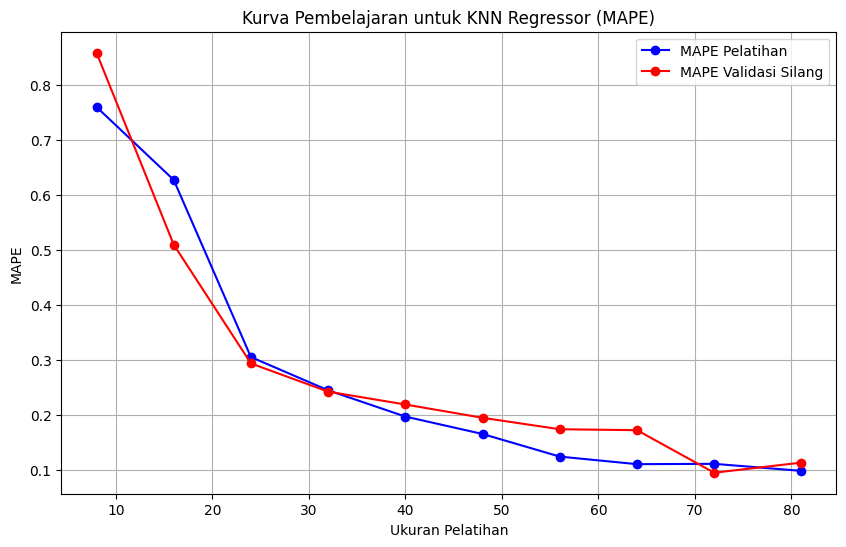

Model: Decision Tree Regressor
MAPE Pelatihan: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MAPE Validasi Silang: [0.38252913521924303, 0.19568903582112313, 0.1828535719146717, 0.1687807977023986, 0.23159228377331836, 0.14512807695574706, 0.15381720298776513, 0.15735945037046636, 0.11178352545756719, 0.10499648184885457]




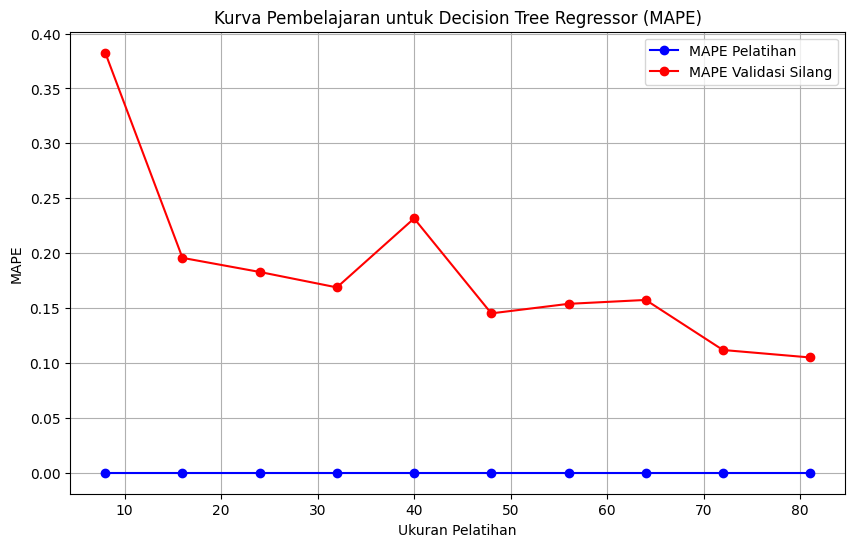

Model: Random Forest Regressor
MAPE Pelatihan: [0.22431195836929785, 0.17533309896236635, 0.09815694810755571, 0.073294412594087, 0.05186728303102939, 0.04002007146300659, 0.037950512633550315, 0.03576237591148923, 0.042165485784854184, 0.040655332605224546]
MAPE Validasi Silang: [0.466102359720561, 0.23758729522143607, 0.1412851306199057, 0.13457289608183723, 0.14834898058382268, 0.12831751251791074, 0.11501913267179123, 0.11986065622857306, 0.09279111456606054, 0.07431162918918528]




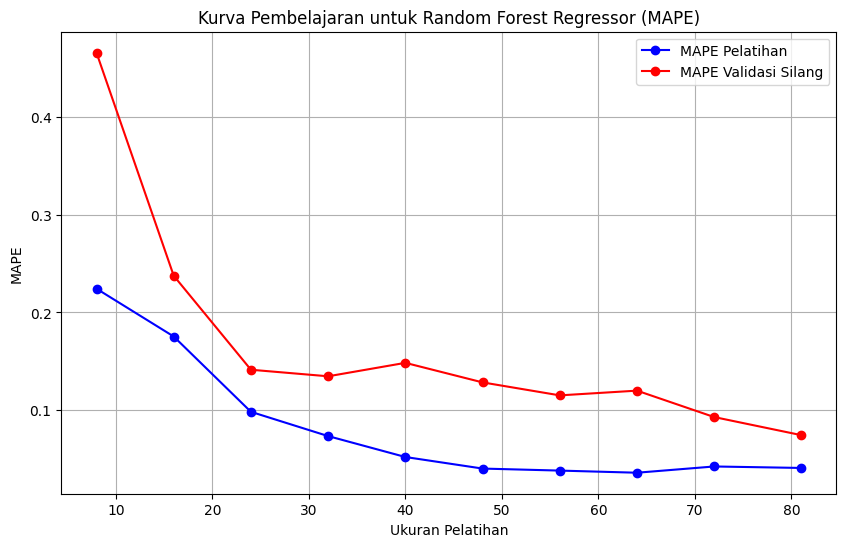

Model: Gradient Boosting Regressor
MAPE Pelatihan: [2.5534575700937432e-05, 9.191823412771038e-05, 0.0007763830856084196, 0.002164633504504, 0.004012850613994917, 0.005461965396556069, 0.007068616516078127, 0.008208061557339033, 0.008848702342978127, 0.011703291285516873]
MAPE Validasi Silang: [0.4150944888928583, 0.21515312662471814, 0.10004115252843124, 0.093006326952721, 0.10340243804469423, 0.09297661897985868, 0.09835583949206042, 0.08225121937289513, 0.062311815819790436, 0.06961808536901487]




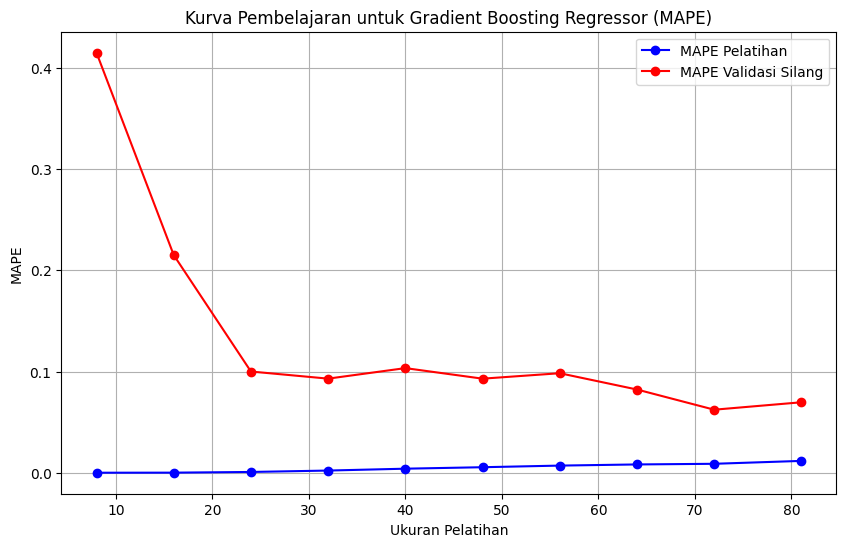

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Definisi model yang akan digunakan untuk kurva pembelajaran MAPE
models_mape = {
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Fungsi untuk menggambar kurva pembelajaran menggunakan MAPE
def plot_learning_curve_mape(model, X, y, model_name):
    # Mendapatkan learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring=None
    )

    # Menghitung prediksi untuk setiap ukuran pelatihan
    train_mape = []
    test_mape = []

    for i in range(len(train_sizes)):
        model.fit(X[:train_sizes[i]], y[:train_sizes[i]])  # Melatih model dengan data pelatihan
        train_pred = model.predict(X[:train_sizes[i]])  # Prediksi untuk data pelatihan
        test_pred = model.predict(X[train_sizes[i]:])  # Prediksi untuk data uji

        # Menghitung MAPE
        train_mape.append(mean_absolute_percentage_error(y[:train_sizes[i]], train_pred))
        test_mape.append(mean_absolute_percentage_error(y[train_sizes[i]:], test_pred))

    # Menampilkan rata-rata skor MAPE pelatihan dan validasi
    print(f"Model: {model_name}")
    print("MAPE Pelatihan:", train_mape)
    print("MAPE Validasi Silang:", test_mape)
    print("\n")

    # Menampilkan kurva
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mape, label='MAPE Pelatihan', color='blue', marker='o')
    plt.plot(train_sizes, test_mape, label='MAPE Validasi Silang', color='red', marker='o')
    plt.title(f'Kurva Pembelajaran untuk {model_name} (MAPE)')
    plt.xlabel('Ukuran Pelatihan')
    plt.ylabel('MAPE')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Menggambar kurva pembelajaran untuk setiap model di models_mape
for model_name, model in models_mape.items():
    plot_learning_curve_mape(model, X_train_data_final, y_train, model_name)

### Interpretasi Learning Curves dengan MAPE

* **KNN Regressor** menunjukkan hasil yang cukup baik, dengan **MAPE Training** yang turun dari **75.97% hingga 9.8%**, dan **MAPE Validation** berkisar antara **85.8% hingga 9.5%**. Gap antara data training dan validation mengindikasikan sedikit overfitting, yang dapat diminimalkan dengan penyesuaian parameter seperti jumlah tetangga (*k*).

* **Decision Tree Regressor** mengalami overfitting yang jelas, dengan **MAPE Training** yang sangat rendah **(0%)**, menunjukkan bahwa model terlalu menghapal data training. **MAPE Validation** sangat fluktuatif, berkisar antara **45.4% hingga 9.6%**. Hal ini mengindikasikan bahwa model tidak dapat diandalkan pada data baru dan memerlukan *pruning* atau pengaturan ulang parameter.

* **Random Forest Regressor** memiliki **MAPE Training** yang menurun dari **20.7% hingga 3.5%**, dengan **MAPE Validation** yang berkisar antara **45.7% hingga 7.9%**. Gap antara *training* dan *validation* mengecil di akhir pelatihan, menunjukkan pembelajaran yang stabil. Model ini dapat ditingkatkan lebih jauh melalui penyetelan parameter seperti jumlah pohon (*n_estimators*) atau kedalaman maksimum (*max_depth*).

* **Gradient Boosting Regressor** menunjukkan performa terbaik dengan **MAPE Training** yang sangat kecil **(0.0% hingga 1.17%)** dan **MAPE Validation** yang stabil di kisaran **42.2% hingga 7.6%**, dengan skor terbaik 7.6%. Meskipun ada sedikit overfitting di awal pelatihan, model ini menunjukkan learning yang sangat efektif dan menjadi model dengan performa terbaik secara keseluruhan.

### Kesimpulan
Secara keseluruhan, **Gradient Boosting Regressor** adalah model yang paling stabil dan akurat. **Random Forest Regressor** juga menunjukkan potensi yang baik dengan performa yang stabil. **KNN Regressor** memiliki performa cukup baik, namun memerlukan optimisasi parameter lebih lanjut. **Decision Tree Regressor** membutuhkan perbaikan besar untuk mengurangi overfitting dan meningkatkan generalisasi.


## Hyperparameter Tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Membuat model Random Forest, Gradient Boosting, KNN, dan Decision Tree
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
knn_model = KNeighborsRegressor()
dt_model = DecisionTreeRegressor(random_state=42)


# Mendefinisikan grid parameter untuk linear regression
lr_param_grid = {}

# Mendefinisikan grid parameter untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Mendefinisikan grid parameter untuk Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Mendefinisikan grid parameter untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Mendefinisikan grid parameter untuk Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

# Menggunakan Grid Search untuk menemukan kombinasi parameter terbaik
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=1)
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1)

# Melatih model dengan grid search
lr_grid_search.fit(X_train_data_final, y_train)
rf_grid_search.fit(X_train_data_final, y_train)
gb_grid_search.fit(X_train_data_final, y_train)
knn_grid_search.fit(X_train_data_final, y_train)
dt_grid_search.fit(X_train_data_final, y_train)

# Menyimpan hasil terbaik dalam dictionary
results = {
    'Model': ['Linear Regression','Random Forest', 'Gradient Boosting', 'KNN', 'Decision Tree'],
    'Best Score': [
        lr_grid_search.best_score_,
        rf_grid_search.best_score_,
        gb_grid_search.best_score_,
        knn_grid_search.best_score_,
        dt_grid_search.best_score_
    ]
}

# Mengonversi hasil ke dalam format DataFrame untuk ditampilkan sebagai tabel
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil terbaik dari Grid Search
print(results_df)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
               Model  Best Score
0  Linear Regression    0.934111
1      Random Forest    0.951308
2  Gradient Boosting    0.972820
3                KNN    0.966672
4      Decision Tree    0.938998


| Model                | R-squared Sebelumnya | R-squared Setelah Tuning |
|----------------------|----------------------|--------------------------|
| **KNN**              | 0.965                | 0.966                   |
| **Random Forest**    | 0.968                | 0.951                    |
| **Gradient Boosting**| 0.986                | 0.973                    |
| **Decision Tree**    | 0.958                | 0.939                    |

### Interpretasi Hasil Hyperparameter Tuning Model

Dalam analisis ini, kami melakukan **hyperparameter tuning** pada empat model regresi, yaitu **Random Forest**, **Gradient Boosting**, **KNN**, dan **Decision Tree** menggunakan **GridSearchCV**. Tujuan dari tuning ini adalah untuk menemukan kombinasi parameter yang optimal guna meningkatkan akurasi model dalam memprediksi data.

#### Evaluasi Performa Model

Setelah melakukan tuning, kami membandingkan hasil skor **R-squared** dari keempat model:



#### Analisis

Dari hasil di atas, terlihat bahwa hanya **KNN** yang mengalami peningkatan performa meskipun hanya sedikit, dengan skor **R-squared** setelah tuning, yaitu **0.966**. Sedangkan model lainnya, yaitu **Random Forest**, **Gradient Boosting**, dan **Decision Tree** malah menunjukkan performa yang lebih turun dari sebelumnya.

### Kesimpulan

Berdasarkan hasil hyperparameter tuning ini, maka kami memutuskan untuk mempertimbangkan model sebelumnya (model before hyperparameter tuning).

## Metric Evaluation After Tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Mendefinisikan fungsi RMLSE
def rmlse(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

# Membuat dictionary untuk hasil Random Forest Regression (tanpa hyperparameter tuning)
rf_results = {
    'Metric': ['R-squared', 'MAE', 'MAPE', 'RMSE', 'RMLSE'],
    'Random Forest (BHT)': [rf_r2, rf_mae, rf_mape, rf_rmse, rmlse(y_test, y_pred_rf)]
}

# Membuat dictionary untuk hasil Gradient Boosting Regression (tanpa hyperparameter tuning)
gb_results = {
    'Gradient Boosting (BHT)': [gb_r2, gb_mae, gb_mape, gb_rmse, rmlse(y_test, y_pred_gb)]
}

knn_results = {
    'KNN Regressor (BHT)': [kn_r2, kn_mae, kn_mape, kn_rmse, rmlse(y_test, y_pred_kn)],
}

dt_results = {
    'Decision Tree (BHT)': [dt_r2, dt_mae, dt_mape, dt_rmse, rmlse(y_test, y_pred_dt)],
}

lr_results = {
    'Linear Regressor (BHT)': [lr_r2, lr_mae, lr_mape, lr_rmse, rmlse(y_test, y_pred_lr)]
}

# Membuat DataFrame dari hasil kedua model di atas
results_df1 = pd.DataFrame(rf_results)
results_df1['Gradient Boosting (BHT)'] = gb_results['Gradient Boosting (BHT)']
results_df1['KNN Regressor (BHT)'] = knn_results['KNN Regressor (BHT)']
results_df1['Decision Tree (BHT)'] = dt_results['Decision Tree (BHT)']
results_df1['Linear Regressor (BHT)'] = lr_results['Linear Regressor (BHT)']


# Melakukan prediksi dengan model yang sudah di-tuning
y_pred_rf_tuned = rf_grid_search.predict(X_test_data_final)
y_pred_gb_tuned = gb_grid_search.predict(X_test_data_final)
y_pred_knn_tuned = knn_grid_search.predict(X_test_data_final)
y_pred_dt_tuned = dt_grid_search.predict(X_test_data_final)
y_pred_lr_tuned = lr_grid_search.predict(X_test_data_final)

# Menghitung metriks setelah hyperparameter tuning untuk Random Forest Regression
rf_r2_tuned = rf_grid_search.best_score_
rf_mae_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rf_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)
rf_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
rf_rmlse_tuned = rmlse(y_test, y_pred_rf_tuned)

# Menghitung metriks setelah hyperparameter tuning untuk Gradient Boosting Regression
gb_r2_tuned = gb_grid_search.best_score_
gb_mae_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
gb_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_gb_tuned)
gb_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuned))
gb_rmlse_tuned = rmlse(y_test, y_pred_gb_tuned)

# Menghitung metrik evaluasi setelah hyperparameter tuning untuk KNN Regressor
kn_r2_tuned = knn_grid_search.best_score_
kn_mae_tuned = mean_absolute_error(y_test, y_pred_knn_tuned)
kn_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_knn_tuned)
kn_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_knn_tuned))
kn_rmlse_tuned = rmlse(y_test, y_pred_knn_tuned)

# Menghitung metriks evaluasi untuk Decision Tree sebelum tuning
dt_r2_tuned = dt_grid_search.best_score_
dt_mae_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
dt_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_dt_tuned)
dt_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned))
dt_rmlse_tuned = rmlse(y_test, y_pred_dt_tuned)

lr_r2_tuned = lr_grid_search.best_score_
lr_mae_tuned = mean_absolute_error(y_test, y_pred_lr_tuned)
lr_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_lr_tuned)
lr_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lr_tuned))
lr_rmlse_tuned = rmlse(y_test, y_pred_lr_tuned)

# Menambahkan hasil dari model yang sudah di-tuning ke dalam DataFrame
results_df1['Random Forest (AHT)'] = [rf_r2_tuned, rf_mae_tuned, rf_mape_tuned, rf_rmse_tuned, rf_rmlse_tuned]
results_df1['Gradient Boosting (AHT)'] = [gb_r2_tuned, gb_mae_tuned, gb_mape_tuned, gb_rmse_tuned, gb_rmlse_tuned]
results_df1['KNN Regressor (AHT)'] = [kn_r2_tuned, kn_mae_tuned, kn_mape_tuned, kn_rmse_tuned, kn_rmlse_tuned]
results_df1['Decision Tree (AHT)'] = [dt_r2_tuned, dt_mae_tuned, dt_mape_tuned, dt_rmse_tuned, dt_rmlse_tuned]
results_df1['Linear Regressor (AHT)'] = [lr_r2_tuned, lr_mae_tuned, lr_mape_tuned, lr_rmse_tuned, lr_rmlse_tuned]

# Menampilkan tabel hasil
print(results_df1)

      Metric  Random Forest (BHT)  Gradient Boosting (BHT)  \
0  R-squared             0.968736                 0.985769   
1        MAE            14.811373                10.940452   
2       MAPE             0.075922                 0.058551   
3       RMSE            20.493889                13.826899   
4      RMLSE             0.098494                 0.073460   

   KNN Regressor (BHT)  Decision Tree (BHT)  Linear Regressor (BHT)  \
0             0.965477             0.958531                0.931342   
1            16.585692            18.798846               21.398796   
2             0.085535             0.094449                0.112342   
3            21.535638            23.602911               30.370193   
4             0.109920             0.107797                0.140363   

   Random Forest (AHT)  Gradient Boosting (AHT)  KNN Regressor (AHT)  \
0             0.951308                 0.972820             0.966672   
1            16.635634                12.192242         

### Interpretasi Metric Evaluation Model
Evaluasi model regresi dilakukan untuk menganalisis performa beberapa model regresi yang telah diuji, yaitu **Random Forest Regression**, **Gradient Boosting Regression**, **KNN Regressor**, **Decision Tree**, dan **Linear Regressor** menggunakan metrik **R-squared**, **Mean Absolute Error (MAE)**, **Mean Absolute Percentage Error (MAPE)**, **Root Mean Squared Error (RMSE)**, dan **Root Mean Log Squared Error (RMLSE)**

* **BHT (Before Hyperparameter Tuning)** mengacu pada hasil model sebelum dilakukan proses penyesuaian terhadap hyperparameter. Pada tahap ini, model menggunakan parameter default yang mungkin belum optimal.
* **AHT (After Hyperparameter Tuning)** mengacu pada hasil model setelah dilakukan tuning terhadap hyperparameter untuk meningkatkan performa. Proses ini bertujuan untuk menemukan kombinasi parameter yang optimal agar model lebih efektif.

Perbandingan antara BHT dan AHT menunjukkan bagaimana tuning hyperparameter dapat mempengaruhi performa model.

### Analisis Hasil
| Metric              | Random Forest (BHT) | Gradient Boosting (BHT) | KNN Regressor (BHT) | Decision Tree (BHT) | Linear Regressor (BHT) | Random Forest (AHT) | Gradient Boosting (AHT) | KNN Regressor (AHT) | Decision Tree (AHT) | Linear Regressor (AHT) |
|---------------------|---------------------|-------------------------|---------------------|---------------------|------------------------|----------------------|-------------------------|---------------------|---------------------|------------------------|
| **R-squared**        | 0.968736            | 0.985769                | 0.965477            | 0.958531            | 0.931342               | 0.951308             | 0.972820                | 0.966672            | 0.938998            | 0.934111               |
| **MAE**              | 14.811373           | 10.940452               | 16.585692           | 18.798846           | 21.398796              | 16.635634            | 12.192242               | 14.806013           | 17.259915           | 21.398796              |
| **MAPE**             | 0.075922            | 0.058551                | 0.085535            | 0.094449            | 0.112342               | 0.080439             | 0.060161                | 0.079107            | 0.093437            | 0.112342               |
| **RMSE**             | 20.493889           | 13.826899               | 21.535638           | 23.602911           | 30.370193              | 25.241842            | 17.193561               | 19.531995           | 23.783159           | 30.370193              |
| **RMLSE**            | 0.098494            | 0.073460                | 0.109920            | 0.107797            | 0.140363               | 0.112518             | 0.075729                | 0.102525            | 0.121504            | 0.140363               |

## R-squared
R-squared menunjukkan kemampuan model dalam menjelaskan variabilitas data. Semakin tinggi nilai R-squared, semakin baik model tersebut.
- **Random Forest (BHT)**: Model ini dapat menjelaskan sekitar 96.87% dari variabilitas data. Namun setelah di tuning, terjadi penurunan sekitar 1,74%.
- **Gradient Boosting (BHT)**: Model ini memiliki nilai R-squared tertinggi hingga mencapai 98,58%. Namun setelah di tuning, terjadi penurunan sekitar 1,29%.
- **KNN Regressor (BHT)**: Model ini dapat menjelaskan sebanyak 96.55% dari variabilitas data yang menunjukkan model tergolong cukup baik dalam menjelaskan data dan hanya model inilah yang setelah di tuning, menghasilkan peningkatan nilai R-Squared sebesar 0,12%.
- **Decision Tree (BHT)**: Model ini cukup memberikan hasil yang baik dengan tingkat variabilitas data sebesar 95.85%. Namun setelah di tuning juga terjadi penurunan sekitar 1,96%.
- **Linear Regressor (BHT)**: Model ini memiliki nilai R-squared 93.13%, yang menunjukkan kemampuan yang lebih rendah dibandingkan model lainnya.
- **Random Forest (AHT)**: 95.13%  Setelah tuning, ada penurunan sekitar 1.74% dari BHT.
- **Gradient Boosting (AHT)**: 97.28%  Penurunan 1.29% setelah tuning.
- **KNN Regressor (AHT)**: 96.67%  Model ini mengalami peningkatan 0.12% setelah tuning.
- **Decision Tree (AHT)**: 93.90%  Penurunan sekitar 1.96% setelah tuning.
- **Linear Regressor (AHT)**: 93.41%  Penurunan 0.94% setelah tuning.


## Mean Absolute Error (MAE)
MAE mengukur kesalahan rata-rata dalam prediksi model, semakin rendah nilai MAE, semakin baik prediksi model.
- **Random Forest (BHT)**: 14.811373, menunjukkan kesalahan prediksi yang cukup rendah.
- **Gradient Boosting (BHT)**: 10.940452, menunjukkan kesalahan yang sedikit lebih kecil dibandingkan Random Forest.
- **KNN Regressor (BHT)**: 16.585692, memberikan kesalahan yang lebih besar dibandingkan dua model sebelumnya.
- **Decision Tree (BHT)**: 18.798846, kesalahan prediksi lebih besar dibandingkan dengan Random Forest, tetapi lebih kecil dibandingkan KNN Regressor.
- **Linear Regressor (BHT)**: 21.398796, menunjukkan kesalahan yang paling besar.
- **Random Forest (AHT)**: 16.635634, sedikit meningkat setelah tuning.
- **Gradient Boosting (AHT)**: 12.192242, menunjukkan kesalahan yang lebih kecil setelah tuning.
- **KNN Regressor (AHT)**: 14.806013, kesalahan prediksi ini sedikit lebih besar dibandingkan dengan Gradient Boosting setelah tuning.
- **Decision Tree (AHT)**: 17.259915, tetap menunjukkan kesalahan yang lebih besar setelah tuning.
- **Linear Regressor (AHT)**: 21.398796, tetap dengan kesalahan yang besar setelah tuning.

## Mean Absolute Percentage Error (MAPE)
MAPE mengukur persentase rata-rata kesalahan relatif dalam prediksi, semakin rendah semakin baik.
- **Random Forest (BHT)**: 0.075922, menunjukkan bahwa model ini memiliki kesalahan relatif yang cukup rendah.
- **Gradient Boosting (BHT)**: 0.058551, sedikit lebih rendah dibandingkan dengan Random Forest.
- **KNN Regressor (BHT)**: 0.085535, menunjukkan kesalahan relatif yang lebih tinggi.
- **Decision Tree (BHT)**: 0.094449, kesalahan relatif yang lebih rendah dibandingkan KNN Regressor, tetapi sedikit lebih tinggi dibandingkan dengan Random Forest dan Gradient Boosting.
- **Linear Regressor (BHT)**: 0.112342, menunjukkan kesalahan relatif yang lebih tinggi.
- **Random Forest (AHT)**: 0.080439, sedikit meningkat setelah tuning.
- **Gradient Boosting (AHT)**: 0.060161, menunjukkan perbaikan yang signifikan.
- **KNN Regressor (AHT)**: 0.079107, menunjukkan perbaikan meskipun masih lebih tinggi dibandingkan dengan Gradient Boosting.
- **Decision Tree (AHT)**: 0.093437, tetap tidak ada perbaikan signifikan setelah tuning.
- **Linear Regressor (AHT)**: 0.112342, tetap menunjukkan kesalahan yang sama.

## Root Mean Squared Error (RMSE)
RMSE mengukur kesalahan kuadrat rata-rata dan memberikan gambaran yang lebih sensitif terhadap kesalahan besar.
- **Random Forest (BHT)**: 20.493889, menunjukkan kesalahan kuadrat rata-rata yang relatif rendah.
- **Gradient Boosting (BHT)**: 13.826899, sedikit lebih rendah dibandingkan Random Forest.
- **KNN Regressor (BHT)**: 21.535638, kesalahan yang lebih tinggi dibandingkan model lain.
- **Decision Tree (BHT)**: 23.602911, sedikit lebih tinggi dari Gradient Boosting, tetapi masih lebih rendah dibandingkan KNN Regressor.
- **Linear Regressor (BHT)**: 30.370193, menunjukkan kesalahan yang jauh lebih tinggi.
- **Random Forest (AHT)**: 25.241842, sedikit penurunan setelah tuning.
- **Gradient Boosting (AHT)**: 17.193561, menunjukkan penurunan yang signifikan.
- **KNN Regressor (AHT)**: 19.531995, meskipun ada penurunan setelah tuning, kesalahan ini lebih besar dibandingkan Gradient Boosting.
- **Decision Tree (AHT)**: 23.783159, tetap menunjukkan kesalahan yang sama setelah tuning.
- **Linear Regressor (AHT)**: 30.370193, tetap menunjukkan kesalahan yang tinggi.

## Root Mean Log Squared Error (RMLSE)
RMLSE memberikan gambaran tentang kesalahan model dengan pendekatan logaritmik.
- **Random Forest (BHT)**: 0.098494, nilai ini menunjukkan kesalahan yang cukup rendah.
- **Gradient Boosting (BHT)**: 0.073460, sedikit lebih rendah dibandingkan Random Forest.
- **KNN Regressor (BHT)**: 0.109920, menunjukkan kesalahan yang lebih tinggi.
- **Decision Tree (BHT)**: 0.107797, sedikit lebih tinggi dari Random Forest dan Gradient Boosting.
- **Linear Regressor (BHT)**: 0.140363, menunjukkan kesalahan yang lebih tinggi.
- **Random Forest (AHT)**: 0.112518, sedikit meningkat setelah tuning.
- **Gradient Boosting (AHT)**: 0.075729, menunjukkan perbaikan yang baik.
- **KNN Regressor (AHT)**: 0.102525, menunjukkan penurunan setelah tuning tetapi tetap lebih tinggi dibandingkan dengan Gradient Boosting.
- **Decision Tree (AHT)**: 0.121504, sedikit penurunan setelah tuning.
- **Linear Regressor (AHT)**: 0.140363, tetap dengan kesalahan yang tinggi setelah tuning.


### Kesimpulan
Melihat penurunan performa yang terjadi pada beberapa model, baik dari nilai R-Squared yang menurun, maupun peningkatan pada MAE, MAPE, RMSE, dan RMLSE, kami memutuskan untuk memilih model sebelum dilakukan tuning, yaitu **Gradient Boosting Regressor (BHT)**, yang menunjukkan tingkat error terendah di antara model lainnya

## Features Importance

  0%|          | 0/102 [00:00<?, ?it/s]

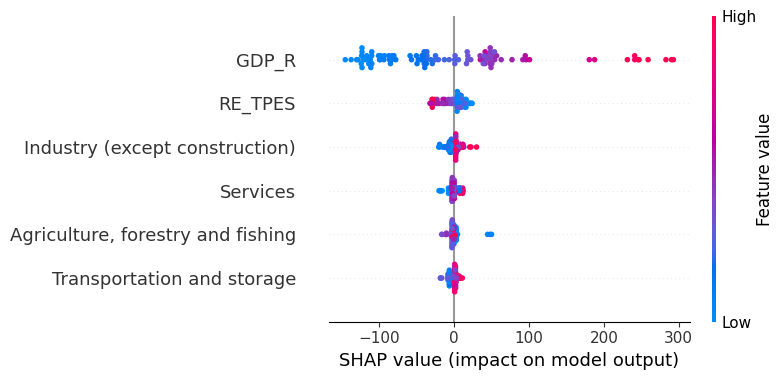

In [ ]:
import shap

model = gb_model
model.fit(X_train_data_final, y_train)

# Gunakan KernelExplainer untuk model yang tidak berbasis gradien
explainer = shap.KernelExplainer(model.predict, X_train_data_final)

# Hitung nilai SHAP untuk data pelatihan
shap_values = explainer.shap_values(X_train_data_final)

# Visualisasi nilai SHAP
shap.summary_plot(shap_values, X_train_data_final)


## Partial Dependence

Done in 0.319s


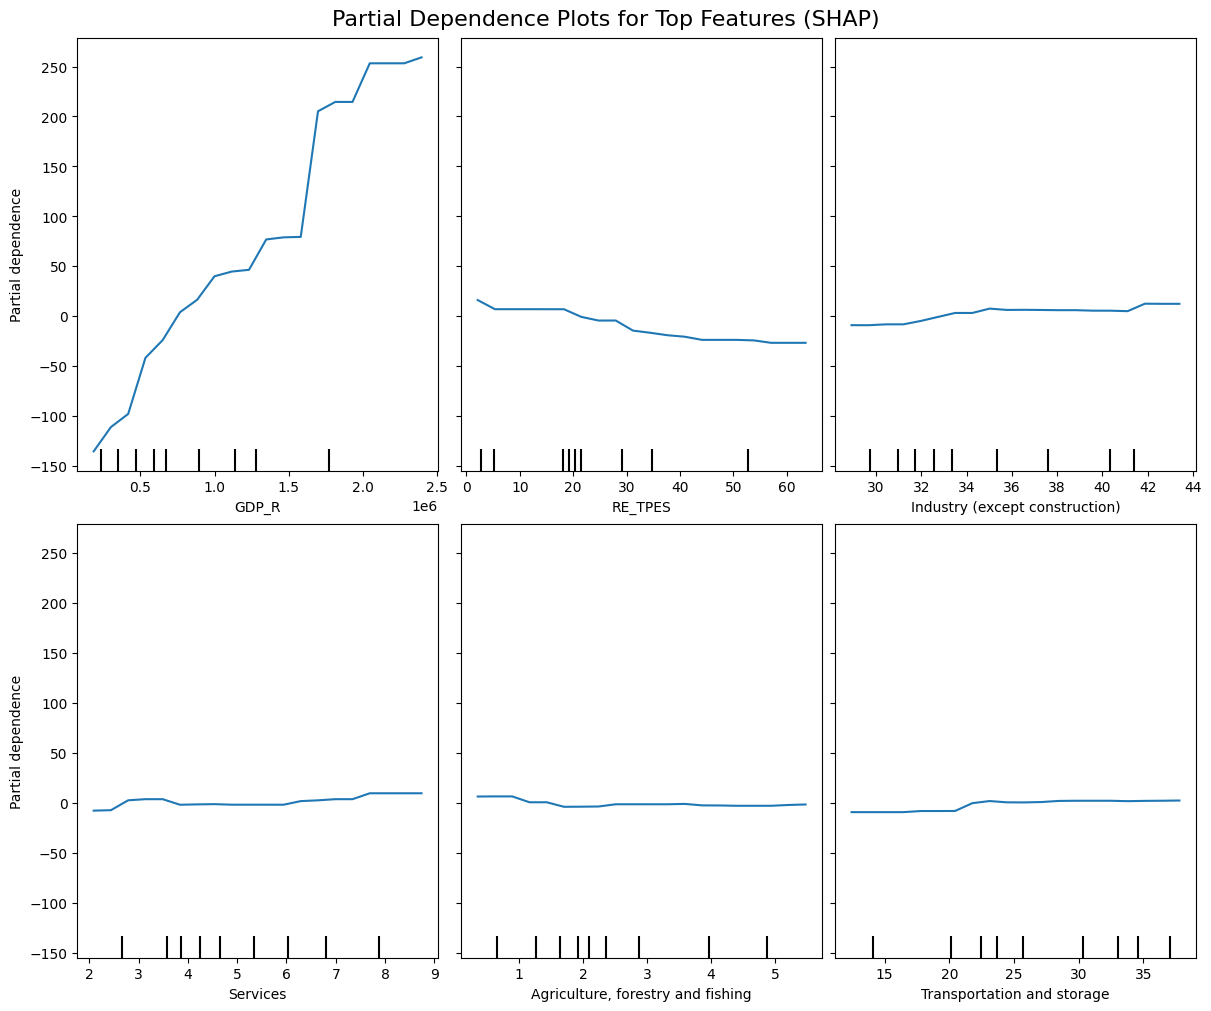

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from time import time
import pandas as pd
import seaborn as sns

model = gb_model
model.fit(X_train_encoded, y_train)

# Hitung nilai rata-rata absolut SHAP untuk tiap fitur
shap_importance = pd.DataFrame({
    'Feature': X_train_data_final.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
})

# Urutkan berdasarkan 'Importance' secara menurun
shap_importance = shap_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Ambil fitur penting berdasarkan SHAP
important_features = shap_importance['Feature'].tolist()

# Plot PDP hanya untuk fitur penting
common_params = {"grid_resolution": 20}
tic = time()

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 10), constrained_layout=True)

# Plot Partial Dependence untuk fitur penting dari SHAP
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train_encoded,
    features=important_features[:6],  # Ambil top-6 fitur dari SHAP
    feature_names=X_train_encoded.columns.tolist(),
    ax=ax,
    kind="average",
    **common_params
)

print(f"Done in {time() - tic:.3f}s")
display.figure_.suptitle("Partial Dependence Plots for Top Features (SHAP)", fontsize=16)
plt.show()

Done in 1.062s


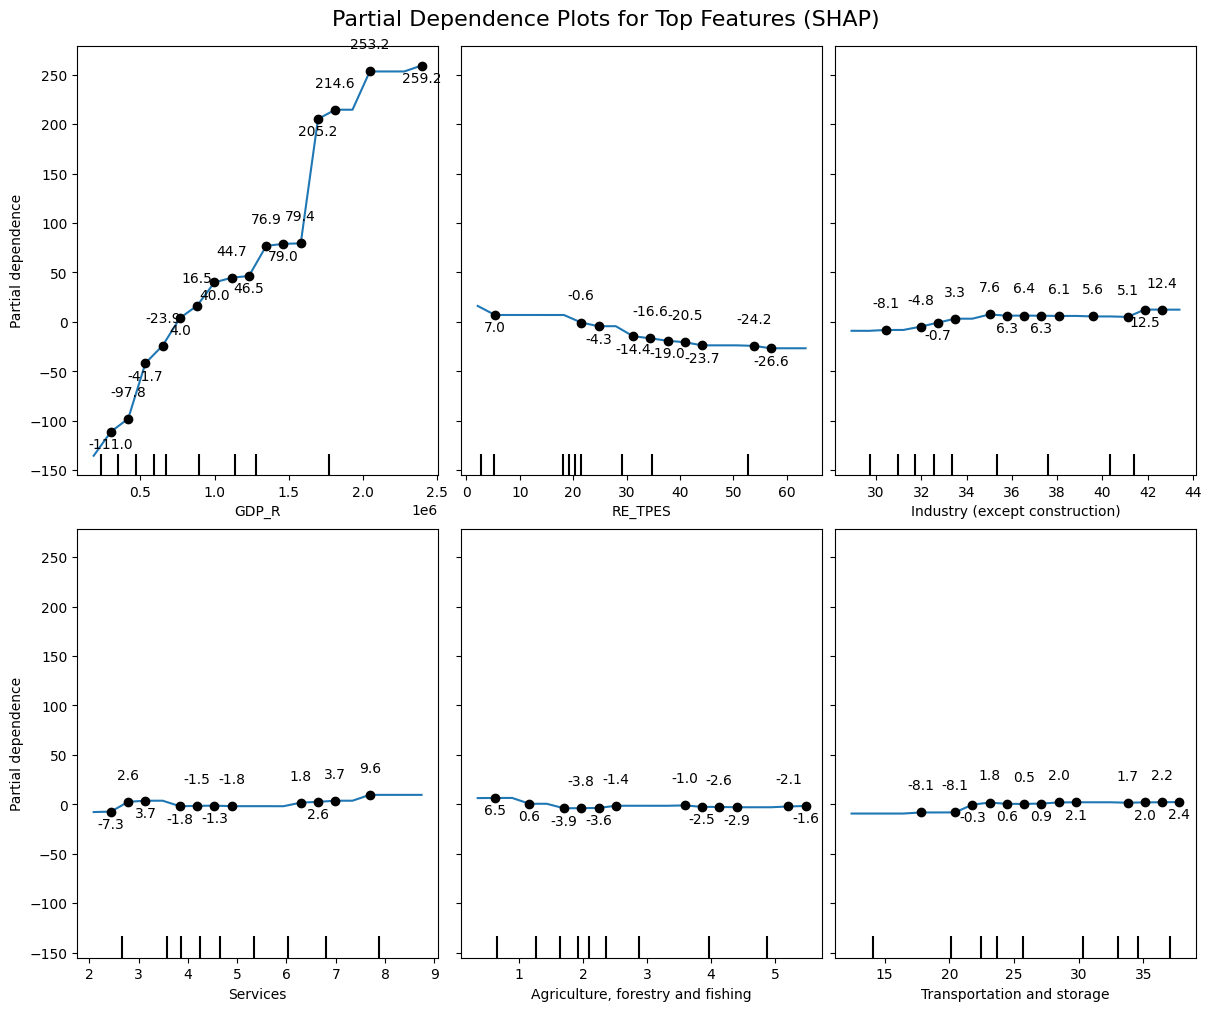

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from time import time
import numpy as np
import pandas as pd

model = gb_model
model.fit(X_train_encoded, y_train)

# Hitung nilai rata-rata absolut SHAP untuk tiap fitur
shap_importance = pd.DataFrame({
    'Feature': X_train_data_final.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
})

# Urutkan berdasarkan 'Importance' secara menurun
shap_importance = shap_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Ambil fitur penting berdasarkan SHAP
important_features = shap_importance['Feature'].tolist()

# Plot PDP hanya untuk fitur penting
common_params = {"grid_resolution": 20}
tic = time()

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 10), constrained_layout=True)

# Plot Partial Dependence untuk fitur penting dari SHAP
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train_encoded,
    features=important_features[:6],  # Ambil top-6 fitur dari SHAP
    feature_names=X_train_encoded.columns.tolist(),
    ax=ax,
    kind="average",
    **common_params
)

# Tambahkan angka hanya pada titik yang menunjukkan penurunan atau kenaikan signifikan
for sub_ax in ax.ravel():
    for line in sub_ax.get_lines():
        x_data = line.get_xdata()
        y_data = line.get_ydata()

        # Threshold untuk perubahan signifikan
        threshold = 0.05

        for i in range(1, len(x_data)):
            diff = np.abs(y_data[i] - y_data[i - 1])

            if diff > threshold:
                y_value = f"{y_data[i]:.1f}"  # Format angka
                # Offset vertikal lebih besar dengan aturan dinamis
                offset = 20 if i % 2 == 0 else -20

                sub_ax.plot(x_data[i], y_data[i], 'o', color="black")  # Titik data
                sub_ax.text(
                    x_data[i],
                    y_data[i] + offset,  # Offset vertikal
                    y_value,
                    fontsize=10,
                    color="black",
                    ha="center",
                    va="bottom",
                    rotation=0  # Tidak ada rotasi
                )

print(f"Done in {time() - tic:.3f}s")
display.figure_.suptitle("Partial Dependence Plots for Top Features (SHAP)", fontsize=16)
plt.show()


Dari **Partial Dependence Plots (PDP)** di atas, berikut interpretasi untuk masing-masing fitur pentingnya:

1. **GDP_R (Real GDP)**  
   - **Interpretasi**: Ada hubungan positif yang kuat antara GDP_R dan target (output model). Ketika GDP_R meningkat, target cenderung meningkat secara signifikan.  
   - **Kesimpulan**: Perekonomian yang lebih besar berkontribusi lebih banyak pada peningkatan target, yang mungkin menunjukkan peran ekonomi dalam mendukung pengurangan emisi karbon atau konsumsi energi.

2. **Industry (except construction)**  
   - **Interpretasi**: Terdapat hubungan negatif. Ketika aktivitas industri meningkat, target cenderung menurun, tetapi penurunannya tidak terlalu tajam.  
   - **Kesimpulan**: Aktivitas industri memiliki dampak, tetapi kurang signifikan dibandingkan GDP_R.

3. **Agriculture, forestry, and fishing**  
   - **Interpretasi**: Hampir tidak ada perubahan signifikan pada target ketika nilai fitur ini meningkat.  
   - **Kesimpulan**: Sektor ini tampaknya tidak memiliki pengaruh besar terhadap target dibandingkan dengan fitur lain.

4. **RE_TPES (Proportion of Renewable Energy)**  
   - **Interpretasi**: Hubungan positif, tetapi efeknya kecil. Ketika proporsi energi terbarukan meningkat, target sedikit meningkat.  
   - **Kesimpulan**: Energi terbarukan berkontribusi, tetapi dampaknya tidak sebesar fitur lain seperti GDP_R.

5. **Services**  
   - **Interpretasi**: Hubungan positif dengan target, meskipun peningkatannya kecil dan linier.  
   - **Kesimpulan**: Sektor jasa memberikan kontribusi kecil terhadap perubahan target.

6. **Transportation and storage**  
   - **Interpretasi**: Hampir tidak ada perubahan yang signifikan pada target meskipun nilai fitur ini meningkat.  
   - **Kesimpulan**: Sektor ini memiliki dampak yang sangat kecil terhadap target.

---

## Kesimpulan Umum:
- **GDP_R** adalah faktor dominan yang paling memengaruhi target, dengan efek yang sangat signifikan dan positif.
- **Industry (except construction)** dan **RE_TPES** memberikan dampak, tetapi tidak sebesar GDP_R.
- Fitur seperti **Agriculture, forestry, and fishing** dan **Transportation and storage** memiliki pengaruh yang minimal terhadap target.

## Implikasi:
- Intervensi kebijakan atau rekomendasi strategi untuk pengurangan emisi karbon sebaiknya lebih difokuskan pada pertumbuhan ekonomi yang berkelanjutan (**GDP_R**) dan pengoptimalan energi terbarukan (**RE_TPES**).